In [41]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


# 1 Import and data review

## 1.1 Installing and importing libraries

In [42]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
from openpyxl.workbook import Workbook

## 1.2 Importing data

In [43]:
# defining path to source folder
path = "/Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/"
# merging all datasets to one
# all files should be renamed to rental_n# beforehand, where # is number of file
file_list = [path + f for f in os.listdir(path) if f.startswith("rental_n")]
csv_list = []
for file in sorted(file_list):
    csv_list.append(
        pd.read_csv(
            file,
            dtype={
                "Велосипед": str,
                "Covered distance (m)": str,
                "Duration (sec.)": str,
                "Departure temperature (°C)": str,
            },
        )
    )
df = pd.concat(csv_list, ignore_index=True)
# export merged csv
# df.to_csv(path + "rental_full.csv", index=False)
# print(f"Merged database exported to {path}rental_full.csv")

/var/folders/r6/9jdwsy656835n306zgn8lj8r0000gn/T/ipykernel_17572/2873055253.py:9: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(


## 1.3 General data check

In [44]:
# general data check
print("Info about dataset:")
df.info()
print("\n First and last rows of dataset")
display(df)

Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315781 entries, 0 to 315780
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Отправление                 315766 non-null  object
 1   Возврат                     315669 non-null  object
 2   Счёт                        315779 non-null  object
 3   Велосипед                   315176 non-null  object
 4   Станция отправления         315762 non-null  object
 5   Станция воврата             315502 non-null  object
 6   Covered distance (m)        315781 non-null  object
 7   Duration (sec.)             315181 non-null  object
 8   Ид.отправления              315781 non-null  object
 9   Sync Id                     315654 non-null  object
 10  Departure temperature (°C)  315781 non-null  object
 11  Manager                     315780 non-null  object
 12  Closing cause               3657 non-null    object
 13  Closed by

,Отправление,Возврат,Счёт,Велосипед,Станция отправления,Станция воврата,Covered distance (m),Duration (sec.),Ид.отправления,Sync Id,Departure temperature (°C),Manager,Closing cause,Closed by,Account origin
0,Sat 2022-04-30 23:59,Sun 2022-05-01 00:29,37675_LOGIN,3416,"042 БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран","018 Школа-лицей №71, ул. Ілияс Омаров, 4",4488,1753,0013A20040C55F4179180F74,d1a8f087-72b9-4eed-ae6e-952207fad881,22,False,NaN,NaN,Third-party system
1,Sat 2022-04-30 23:59,Sun 2022-05-01 00:11,47680_LOGIN,3282,"043 Мечеть «Нұр Астана», пр.Қабанбай батыр 36","154 Астана LRT, пр. Тұран 34",1668,705,0013A20040BEF1AC78ED0D27,d17edc98-cc7a-460e-aa64-acfd82118a63,20,False,NaN,NaN,Third-party system
2,Sat 2022-04-30 23:58,Sun 2022-05-01 00:11,37921_LOGIN,3298,"132 Ресторан ""Туран"", пр.Б.Момышулы 21","135 АЗС ""Номад"", пр.Тәуелсіздік и ул.Күйші Дина",1829,786,0013A20040E8A1F578D0047D,aeab7f08-c0b5-4b49-a890-dccaa31e0f08,23,False,NaN,NaN,Third-party system
3,Sat 2022-04-30 23:58,Sun 2022-05-01 00:15,76660_LOGIN,3790,048 Монумент «Байтерек» ул.Кунаева.,039 Остановка ЖК «Уют» напротив Life Fitness,2248,1007,0013A20040ACE34578CA02E6,f93e880f-0c6f-4f2d-ad08-87fe4bf96f2f,18,False,NaN,NaN,Third-party system
4,Sat 2022-04-30 23:58,Sun 2022-05-01 00:18,18711_LOGIN,3261,"003 Мост ""Караоткель"", пр. Қабанбай батыра","055 ЖК Эдель, напротив отеля Park INN ASTANA, ...",2556,1218,0013A20040C604C878BD0B8E,913e817f-952e-4d78-a49b-1aa8b7e2c54e,20,False,NaN,NaN,Third-party system
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315776,NaN,Sun 2022-07-31 21:46,54023_LOGIN,2997,NaN,"113 ТЦ ""Туркестан"" ул. Қажымұқана 8, автобусна...",2,28,0013A20040C60324A38B115A,NaN,0,False,NaN,NaN,Third-party system
315777,NaN,Sun 2022-07-31 22:10,60362_LOGIN,3267,NaN,"152 ""Ботанический сад"" центральный вход, ул.Тү...",1882,651,0013A200415442EEA6C30A8E,NaN,0,False,NaN,NaN,Third-party system
315778,NaN,Sun 2022-07-31 22:19,75690_LOGIN,3758,NaN,"067 Магазин Коктем, пр.Богенбай батыра 34",2736,1066,0013A20040C2F048A7500E90,NaN,0,False,NaN,NaN,Third-party system
315779,NaN,Sun 2022-07-31 22:39,4089_LOGIN,3496,NaN,"097 Дворец Жастар, пр.Республики",40,72,0013A20040BEF167AF9D10EC,NaN,0,False,NaN,NaN,Third-party system


## 1.4 Column names

To avoid syntax errors, we need to rename the column names according to the `snake_case` principle.

In [45]:
# show column names
print("Current column names:")
df.columns

Current column names:


Index(['Отправление', 'Возврат', 'Счёт', 'Велосипед', 'Станция отправления',
       'Станция воврата', 'Covered distance (m)', 'Duration (sec.)',
       'Ид.отправления', 'Sync Id', 'Departure temperature (°C)', 'Manager',
       'Closing cause', 'Closed by', 'Account origin'],
      dtype='object')

In [46]:
# changing column names
df.rename(
    columns={
        "Отправление": "dep_date",
        "Возврат": "ret_date",
        "Счёт": "user_id",
        "Велосипед": "bike_id",
        "Станция отправления": "dep_station",
        "Станция воврата": "ret_station",
        "Covered distance (m)": "distance",
        "Duration (sec.)": "duration",
        "Ид.отправления": "trip_id",
        "Sync Id": "sync_id",
        "Departure temperature (°C)": "temp",
        "Manager": "manager",
        "Closing cause": "closing_cause",
        "Closed by": "closed_by",
        "Account origin": "account_origin",
    },
    inplace=True,
)
# check
print("New column names:")
df.columns

New column names:


Index(['dep_date', 'ret_date', 'user_id', 'bike_id', 'dep_station',
       'ret_station', 'distance', 'duration', 'trip_id', 'sync_id', 'temp',
       'manager', 'closing_cause', 'closed_by', 'account_origin'],
      dtype='object')

## 1.5 Duplicates
In this database, there should not be identical values, if there are, then they mean system errors during the collection of information. Therefore, it is necessary to remove redundant duplicate objects.

In [47]:
# check for duplicates
print("Number of duplicates: ", end="")
df.duplicated().sum()

Number of duplicates: 

760

In [48]:
# deleting duplicates
df = df.drop_duplicates().reset_index(drop=True)
# re-check
print("Number of left duplicates: ", end="")
df.duplicated().sum()

Number of left duplicates: 

0

## 1.6 Missing values
When checking data, empty values (`NaN`) were noticed. Such empty values will not allow a full-fledged analysis, they will need to be deleted or filled. The first step is to count the number of all blank values in each column and determine their significance. We'll come back to empty values later when we go through each column.

In [49]:
# counting missing values
print("Number of missing values in each column:")
df.isna().sum()

Number of missing values in each column:


dep_date              15
ret_date             112
user_id                2
bike_id              604
dep_station           19
ret_station          269
distance               0
duration               1
trip_id                0
sync_id              127
temp                   0
manager                1
closing_cause     311983
closed_by         314996
account_origin         1
dtype: int64

## 1.7 Conclusions of data review
Next, we need to determine what to do with missing or incorrect data. If, in the case of duplicate values, you can confidently remove redundant ones, since they should not exist in this database, then in the case of missing values, our actions depend on the importance of their values, first they need to be checked.

For example, among the most important items - `Departure stations` have 6 empty values, and `Return stations` - 143. A bike trip is considered completed if it has valid departure and return stations at the same time, otherwise, we attribute them to `failed trips` or delete them for the lack of data.

The next thing we noticed is the values ​​in the `user_id` column. There are typical values ​​like `37675_LOGIN` - ordinary bike share users. In addition to them, there are 2 more empty values - technical support accounts and deleted accounts. User separation also includes the values ​​of the `manager` and `account_origin` columns. The trips generated during the maintenance will not be used in the analysis (deleted), and the empty values ​​should be checked against the usual typical bike trips, for example, by station, distance or trip time.

The columns with departure and return dates contain three values ​​at once - `day of the week`, `date` and `time`. They should be converted to a temporary format so that later we can carry out various operations and analysis with them at different times of the day on weekdays or weekends. Also, for the convenience of filtering, we will separate the columns indicating the `month` and `morning` or `evening peak`.

Distance traveled and travel time will be used for general statistics. In this case, the `distance` column has zero values, the `duration` column has 1 empty value. For empty and null values ​​in these columns, new values ​​can be calculated based on the departure and return dates and the median travel speed. In the future, the calculated data should be compared with the available values. In case of data discrepancy, these values ​​will be replaced by the calculated ones. Erroneous data in the `distance` column should be corrected after the elimination of `failed trips`.

The `closed_by` and `closing_cause` columns will help filter out `failed trips`.

`bike_id` will allow analysis for each individual bike.

The value of `temp` should be checked closely, the data may be erroneous.

The values ​​of the `trip_id` and `sync_id` columns do not carry information useful for analysis and were needed to correctly remove duplicate data.

# 2 Data processing

## 2.1 Users
Let's start by deleting trips generated by technical support.

In [50]:
# show technical support accounts and other non-users
test_users = []
for user in df["user_id"].unique():
    if "_LOGIN" not in str(user):
        test_users.append(user)
print("Non-users:")
display(test_users)

Non-users:


['ASTANA_MAINT_026',
 'ASTANA_MAINT_07_IT-specialist_Login',
 'ASTANA_MAINT_11',
 'ASTANA_MAINT_022',
 'ASTANA_MAINT_5',
 'ASTANA_MAINT_021',
 'Deleted on 2022-05-03',
 'ASTANA_MAINT_07_IT-specialist',
 'ASTANA_MAINT_8',
 'ASTANA_MAINT_24',
 'ASTANA_MAINT_16',
 'ASTANA_MAINT_025',
 'ASTANA_MAINT_10',
 'Для ЛРТ',
 '{{ display.value | kDisplayType:display.type:display.displayStyle }}',
 'Test CTS',
 nan,
 'ASTANA_MAINT_023',
 'ASTANA_MAINT_19',
 'Deleted on 2022-04-11',
 'Miras LRT',
 '2582_RFID',
 'ASTANA_MAINT_13',
 'Deleted on 2017-05-01',
 'ASTANA_MAINT_14',
 '3215_RFID',
 'Almaty_maint_26']

In addition to explicit tech support accounts, there are also nulls, deleted accounts, and RFID accounts. Let's check this data.

In [51]:
# checking missing values
print("Rows with missing values in user_id:")
user_na = df[df["user_id"].isna()]
display(user_na)

Rows with missing values in user_id:


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin
22591,Fri 2022-04-22 17:55,Fri 2022-04-22 17:56,NaN,3397,"054 ""Astana Bike""","054 ""Astana Bike""",114,96,0013A20041463F1197990038,fc411fda-d58e-438a-95f1-cd1c2660651c,12,False,NaN,NaN,Manager
228514,NaN,Tue 2022-06-28 23:52,NaN,7112,NaN,049 ЖК «Нурсая 1»,193,715801,0013A2004149786507630298,NaN,0,NaN,NaN,NaN,NaN


Empty values in the `user_id` column either refer to a service station or have no other data components at all, so they can be removed.

In [52]:
# deleting rows with missing values in user
df = df.dropna(subset=["user_id"]).reset_index(drop=True)

Having dealt with empty values, we consider the data of remote accounts and RFID accounts.

In [53]:
# defining deleted and unknown accounts
deleted_users = []
for user in test_users:
    if "MAINT" not in str(user):
        deleted_users.append(user)
print("Accounts, which do not belong to users or technical support:")
display(deleted_users)

Accounts, which do not belong to users or technical support:


['Deleted on 2022-05-03',
 'Для ЛРТ',
 '{{ display.value | kDisplayType:display.type:display.displayStyle }}',
 'Test CTS',
 nan,
 'Deleted on 2022-04-11',
 'Miras LRT',
 '2582_RFID',
 'Deleted on 2017-05-01',
 '3215_RFID',
 'Almaty_maint_26']

In [54]:
# show trips of unknown accounts
for user in deleted_users:
    deleted_users_df = df.loc[df["user_id"] == user]
    print(f"Trips of {user} account")
    display(deleted_users_df)
    print()

Trips of Deleted on 2022-05-03 account


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin
2325,Sat 2022-04-30 13:02,Sat 2022-04-30 13:14,Deleted on 2022-05-03,3228,"003 Мост ""Караоткель"", пр. Қабанбай батыра","054 ""Astana Bike""",1819,734,0013A20040C60483DEF90D67,828bd166-d3d0-4758-92f9-c800f3fb9f04,32,True,NaN,NaN,Manager
7404,Thu 2022-04-28 20:38,Thu 2022-04-28 20:51,Deleted on 2022-05-03,6933,"018 Школа-лицей №71, ул. Ілияс Омаров, 4","110 ЖК ""Манхэттен"", ул. Мухамедханов",1711,774,0013A20041497319A6CC0ACC,d89beaa1-5686-41d6-a995-c2d52e56121c,21,True,NaN,NaN,Manager
7417,Thu 2022-04-28 20:36,Thu 2022-04-28 20:36,Deleted on 2022-05-03,2399,"018 Школа-лицей №71, ул. Ілияс Омаров, 4","018 Школа-лицей №71, ул. Ілияс Омаров, 4",0,48,0013A2004148B1B6A64E0FED,46efe2c5-cea9-4d8f-aec7-45137b576e1b,22,True,NaN,NaN,Manager
8658,Thu 2022-04-28 16:08,Thu 2022-04-28 16:49,Deleted on 2022-05-03,3022,"033 ЖК «Айсанам», пр.Мәңгілік Ел 19/ул. Керей,...","007 ТРЦ ""KeruenCity"", Қорғалжын шоссе, 1",6375,2454,0013A20040C2092D67AD0B95,1c325655-0834-4c50-a32d-5a8f63385a9e,33,True,NaN,NaN,Manager
10724,Wed 2022-04-27 20:17,Wed 2022-04-27 20:32,Deleted on 2022-05-03,3531,"152 ""Ботанический сад"" центральный вход, ул.Тү...","033 ЖК «Айсанам», пр.Мәңгілік Ел 19/ул. Керей,...",3236,917,0013A20040BEF16250690DD3,c1c47471-609e-46ca-a5f0-627c3bdce605,23,True,NaN,NaN,Manager
10774,Wed 2022-04-27 20:07,Wed 2022-04-27 20:15,Deleted on 2022-05-03,3531,"033 ЖК «Айсанам», пр.Мәңгілік Ел 19/ул. Керей,...","152 ""Ботанический сад"" центральный вход, ул.Тү...",1425,479,0013A20040BEF1624E340DD2,878caa0d-d6d4-41a5-954e-0448ecf5cdc0,22,True,NaN,NaN,Manager
11876,Wed 2022-04-27 15:41,Wed 2022-04-27 15:55,Deleted on 2022-05-03,3480,"097 Дворец Жастар, пр.Республики","097 Дворец Жастар, пр.Республики",1692,833,0013A20040BEF1000FE00DA9,427b91cd-e7e0-4c55-8bc9-8d2b980c98b1,28,True,NaN,NaN,Manager
14944,Tue 2022-04-26 13:41,Tue 2022-04-26 23:38,Deleted on 2022-05-03,7110,004 Банкетный зал «Салтанат Сарайы» центральны...,"037 «Анвар» супермаркет,ул.Алматы, 5",16578,35807,0013A20041497569A2350DBD,0dce5f6c-b753-4312-bb03-2be8d167a67a,27,True,NaN,NaN,Manager
17900,Mon 2022-04-25 10:41,Mon 2022-04-25 11:19,Deleted on 2022-05-03,3575,"033 ЖК «Айсанам», пр.Мәңгілік Ел 19/ул. Керей,...","092 ТД ""Жастар"" ул.Кравцова и ул. Ш.Уалиханова",7173,2264,0013A20040C2F07826790F59,3a774a38-d135-451a-9d3a-eb44ac89a1e8,18,True,NaN,NaN,Manager
22390,Fri 2022-04-22 18:58,Sat 2022-04-23 17:33,Deleted on 2022-05-03,3230,"152 ""Ботанический сад"" центральный вход, ул.Тү...","031 ЖК ""Promenade Expo"" Block D, пр. Мәңгілік ...",3101,1413,0013A20040ACE1E0A68B07A3,33423fe0-8cd0-462e-a863-4c3249d02091,10,True,NaN,NaN,Manager



Trips of Для ЛРТ account


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin
16350,Mon 2022-04-25 20:00,Mon 2022-04-25 20:33,Для ЛРТ,3287,"019 Отель ""Jumbaktas"", ул.Сарайшық, 1","042 БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран",2456,1981,0013A20041667837A99209C7,d27c71f5-aec3-48d1-ad8e-a84b665bbb7c,16,True,NaN,NaN,Manager
27714,Tue 2022-04-19 19:10,Tue 2022-04-19 19:16,Для ЛРТ,7010,"154 Астана LRT, пр. Тұран 34","023 ЖК «Инфинити 2», пр. Қабанбай батыр 42",882,397,0013A2004154426EB4B90C10,230c1be0-43f9-44b4-ade6-656cfe5cd685,18,True,NaN,NaN,Manager
32766,Fri 2022-04-15 19:31,Fri 2022-04-15 19:46,Для ЛРТ,3789,"154 Астана LRT, пр. Тұран 34","042 БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран",0,923,0013A20041667DD173AD06A2,1c9338c6-3376-41ad-98e0-560004d93efe,26,True,NaN,NaN,Manager
33056,Thu 2022-04-14 15:44,Sat 2022-04-16 09:15,Для ЛРТ,3792,"154 Астана LRT, пр. Тұран 34","154 Астана LRT, пр. Тұран 34",453,149471,0013A20040C60470ED020A97,6445125a-8087-4c9d-887c-1d09be7c8f74,27,True,NaN,NaN,Manager
33057,Thu 2022-04-14 15:23,Thu 2022-04-14 15:41,Для ЛРТ,3792,"154 Астана LRT, пр. Тұран 34","154 Астана LRT, пр. Тұран 34",4,1103,0013A20040C60470E7FE0A96,1f4cdb44-fdd2-47ee-9a7c-022137d03199,25,True,NaN,NaN,Manager
33058,Thu 2022-04-14 15:10,Thu 2022-04-14 15:21,Для ЛРТ,3792,"154 Астана LRT, пр. Тұран 34","154 Астана LRT, пр. Тұран 34",4,656,0013A20040C60470E5120A95,f4cb4277-75a5-4a8a-82dd-ded9172a7581,26,True,NaN,NaN,Manager
33059,Wed 2022-04-13 12:14,Thu 2022-04-14 15:08,Для ЛРТ,3792,155 Акимат района «Есиль»,"154 Астана LRT, пр. Тұран 34",829,96820,0013A20040C604706A4F0A94,13a9d778-26b1-45b0-b345-75c0d872be95,19,True,NaN,NaN,Manager
33060,Wed 2022-04-13 12:04,Wed 2022-04-13 12:09,Для ЛРТ,3792,155 Акимат района «Есиль»,155 Акимат района «Есиль»,0,296,0013A20040C6047067E60A93,926feb73-69ad-4476-9aa5-143244246772,20,True,NaN,NaN,Manager
33061,Wed 2022-04-13 12:01,Wed 2022-04-13 12:03,Для ЛРТ,3792,155 Акимат района «Есиль»,155 Акимат района «Есиль»,0,85,0013A20040C6047067450A92,f04631e2-d0a7-4ec4-bd0a-f723e05fccc8,19,True,NaN,NaN,Manager
33062,Wed 2022-04-13 11:56,Wed 2022-04-13 11:57,Для ЛРТ,3792,155 Акимат района «Есиль»,155 Акимат района «Есиль»,2,79,0013A20040C6047066100A91,35f65c71-af72-465d-ac30-d83775e9c6ee,19,True,NaN,NaN,Manager



Trips of {{ display.value | kDisplayType:display.type:display.displayStyle }} account


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin
21600,"{{row.entity.date_dep | moment : ""llll""}}","{{row.entity.date_ret | moment : ""llll""}}",{{ display.value | kDisplayType:display.type:d...,{{ display.value | kDisplayType:display.type:d...,{{ display.value | kDisplayType:display.type:d...,{{ display.value | kDisplayType:display.type:d...,{{ display.value | kDisplayType:display.type:d...,NaN,{{ display.value | kDisplayType:display.type:d...,{{ display.value | kDisplayType:display.type:d...,{{ display.value | kDisplayType:display.type:d...,{{ display.value | kDisplayType:display.type:d...,"{{row.entity.close_cause | kDisplayType:""renta...",{{ display.value | kDisplayType:display.type:d...,"{{row.entity.account.origin | kDisplayType:""ac..."



Trips of Test CTS account


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin
22154,Fri 2022-04-22 20:09,Fri 2022-04-22 20:11,Test CTS,3064,"154 Астана LRT, пр. Тұран 34","154 Астана LRT, пр. Тұран 34",16,121,0013A20040C60402B6FA0DA9,52580ec9-d0de-471e-8582-fe3b03105050,8,False,NaN,NaN,Manager
32540,Sat 2022-04-16 08:31,Sat 2022-04-16 08:35,Test CTS,3620,"154 Астана LRT, пр. Тұран 34","154 Астана LRT, пр. Тұран 34",528,208,0013A20040C2F04B2A910D95,9c6d028d-6e87-474a-8910-3a2edd4a80cd,14,False,NaN,NaN,Manager
33551,Mon 2022-04-11 10:50,Fri 2022-04-15 22:26,Test CTS,3165,"054 ""Astana Bike""",074 пр.Женис и ул.Молдагуловой,204,387344,0013A20040B337ADB38F0CDC,b21bac78-0de8-4292-a4c0-73d98760c030,9,False,NaN,NaN,Manager
33558,Mon 2022-04-11 10:12,Mon 2022-04-11 10:40,Test CTS,3787,"054 ""Astana Bike""","054 ""Astana Bike""",400,1668,0013A20040B1C820AAB006CF,d9fd2fb0-9e08-4c1b-873e-3095b2826dbd,12,False,NaN,NaN,Manager
33560,Mon 2022-04-11 10:09,Mon 2022-04-11 10:10,Test CTS,3787,"054 ""Astana Bike""","054 ""Astana Bike""",0,42,0013A20040B1C820AA1106CD,75310cf4-5d31-4bb5-9023-189876330413,12,False,NaN,NaN,Manager
33561,Mon 2022-04-11 10:06,Mon 2022-04-11 10:06,Test CTS,3787,"054 ""Astana Bike""","054 ""Astana Bike""",2,20,0013A20040B1C820A93D06CC,b2ead3a2-a235-428d-90a1-b77c6d3af02b,12,False,NaN,NaN,Manager



Trips of nan account


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin



Trips of Deleted on 2022-04-11 account


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin
33564,Mon 2022-04-11 09:25,Mon 2022-04-11 09:26,Deleted on 2022-04-11,3787,"054 ""Astana Bike""","054 ""Astana Bike""",0,14,0013A20040B1C8209FC206CB,d2fcc218-7d9f-4d88-bf24-9ca80de57d46,14,True,NaN,NaN,Manager



Trips of Miras LRT account


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin
53765,Wed 2022-05-25 19:09,Wed 2022-05-25 19:10,Miras LRT,3555,"041 Монумент ""Байтерек"", ул.Достык/ул.Түркістан","041 Монумент ""Байтерек"", ул.Достык/ул.Түркістан",4,54,0013A20040C2F0512AA107F9,669a7513-47a2-4739-abf2-f3ab0ec0b558,31,True,NaN,NaN,Manager
53822,Wed 2022-05-25 19:01,Wed 2022-05-25 19:08,Miras LRT,3648,"043 Мечеть «Нұр Астана», пр.Қабанбай батыр 36","041 Монумент ""Байтерек"", ул.Достык/ул.Түркістан",963,436,0013A20040C2F2E628AF05D9,e821a6f3-a23d-40f4-85cd-510830bc24d3,31,True,NaN,NaN,Manager
53903,Wed 2022-05-25 18:49,Wed 2022-05-25 19:01,Miras LRT,6869,"154 Астана LRT, пр. Тұран 34","043 Мечеть «Нұр Астана», пр.Қабанбай батыр 36",1768,709,0013A2004162BD7425CC0D68,22f268e5-1f7e-491f-9cef-c0a8f03aeed0,30,True,NaN,NaN,Manager
55498,Wed 2022-05-25 10:41,Wed 2022-05-25 10:47,Miras LRT,3743,"054 ""Astana Bike""","054 ""Astana Bike""",2,401,0013A2004149726FB3610035,fd169b86-c201-4188-b095-f813fa613f20,26,True,NaN,NaN,Manager
70812,Fri 2022-05-20 14:47,Fri 2022-05-20 14:48,Miras LRT,3452,"054 ""Astana Bike""","054 ""Astana Bike""",0,19,0013A20040C2F29755BC051D,81598afd-0d14-4b53-b14b-422f457c0300,27,True,NaN,NaN,Manager
133901,Thu 2022-06-30 16:40,Thu 2022-06-30 17:35,Miras LRT,3553,049 ЖК «Нурсая 1»,"054 ""Astana Bike""",28,3295,0013A20040B0B39C7D8B07B1,d7c33589-df0c-4222-b377-b2b0ad452e69,21,True,NaN,NaN,Manager
133905,Thu 2022-06-30 16:38,Thu 2022-06-30 16:39,Miras LRT,3553,049 ЖК «Нурсая 1»,049 ЖК «Нурсая 1»,0,43,0013A20040B0B39C7D3007B0,ef8d38ab-ca26-4ead-a2ed-4fe73adb2497,21,True,NaN,NaN,Manager
134815,Thu 2022-06-30 10:31,Thu 2022-06-30 10:34,Miras LRT,7110,155 Акимат района «Есиль»,"154 Астана LRT, пр. Тұран 34",588,168,0013A2004149756927150E94,7c7d7d6f-5b52-40bb-9bbd-0ee635eaf9a8,16,True,NaN,NaN,Manager
134841,Thu 2022-06-30 10:17,Thu 2022-06-30 10:20,Miras LRT,3658,"154 Астана LRT, пр. Тұран 34",155 Акимат района «Есиль»,581,186,0013A20040AF828623C908B0,97b766a9-02d5-40f4-ad6b-42ddaf2ea138,16,True,NaN,NaN,Manager
136850,Wed 2022-06-29 16:32,Wed 2022-06-29 16:32,Miras LRT,3177,"154 Астана LRT, пр. Тұран 34","154 Астана LRT, пр. Тұран 34",0,22,0013A20040B0AC432A220679,87006693-7ce3-4715-80b2-dc2b23c5fe74,19,True,NaN,NaN,Manager



Trips of 2582_RFID account


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin
71538,Fri 2022-05-20 09:16,Fri 2022-05-20 09:17,2582_RFID,3505,"117 НИИ травматологии и ортопедии, пр.Абылай Х...","054 ""Astana Bike""",0,14,0013A20040C57A050823109D,2632fba0-33f4-4995-b194-9bf3f580d737,16,False,NaN,NaN,Third-party system
73890,Thu 2022-05-19 16:12,Fri 2022-05-20 18:18,2582_RFID,3542,"054 ""Astana Bike""","054 ""Astana Bike""",0,0,0013A20040C5C413180206C1,5ad43bda-978a-4e93-a647-a05f7f3699cd,18,False,Automatic,NaN,Third-party system
76526,Wed 2022-05-18 19:52,Fri 2022-05-20 03:11,2582_RFID,NaN,"054 ""Astana Bike""",NaN,0,0,0013A20040C2F021FA300003,fd6b6b99-ae03-4533-8f04-a55847185882,19,False,Automatic,NaN,Third-party system
76532,Wed 2022-05-18 19:51,Wed 2022-05-18 19:52,2582_RFID,NaN,"054 ""Astana Bike""","054 ""Astana Bike""",0,0,0013A20040C2F021F9F80002,9e9c71c3-932c-485e-bec0-f0047f1d7040,19,False,Automatic,NaN,Third-party system
76595,Wed 2022-05-18 19:42,Wed 2022-06-22 16:54,2582_RFID,3363,"054 ""Astana Bike""",NaN,0,0,0013A20040C55F3DF7BB10AC,7eee2e1d-4b0f-4010-85d9-03617bf7689d,18,False,Unpair,NaN,Third-party system
76919,Wed 2022-05-18 18:45,NaN,2582_RFID,3723,"054 ""Astana Bike""",NaN,0,0,0013A20040C604C5EA4D12A1,NaN,17,False,NaN,NaN,Third-party system
77186,Wed 2022-05-18 18:02,NaN,2582_RFID,3371,"054 ""Astana Bike""",NaN,0,0,0013A20040C20935E03F0C45,NaN,17,False,NaN,NaN,Third-party system
77249,Wed 2022-05-18 17:46,Wed 2022-05-18 17:48,2582_RFID,3481,"054 ""Astana Bike""","054 ""Astana Bike""",0,105,0013A20040C57989DCA40A20,69692c3b-058c-4568-b9b9-59e13ed938fd,18,False,NaN,NaN,Third-party system
77343,Wed 2022-05-18 17:23,Wed 2022-05-18 17:24,2582_RFID,1514,"054 ""Astana Bike""","054 ""Astana Bike""",0,84,0013A20040B545DBD72F0B43,980ebf38-86ac-4b13-a667-c96ab5a37f54,17,False,NaN,NaN,Third-party system
77385,Wed 2022-05-18 17:11,Thu 2022-06-23 15:07,2582_RFID,3024,"054 ""Astana Bike""",NaN,0,0,0013A20040B0B2B0D4640E1C,cfb3aaa9-6fda-432a-b325-efc6386a8ae1,20,False,Unpair,NaN,Third-party system



Trips of Deleted on 2017-05-01 account


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin
106006,Tue 2022-05-10 13:34,Tue 2022-05-10 15:02,Deleted on 2017-05-01,3661,"125 №7 Поликлиника, пр.Құдайбердіұлы 25","125 №7 Поликлиника, пр.Құдайбердіұлы 25",25208.33,3025,0002000040820A0A044A0128,e68c7291-72a9-4879-8eb3-65374b16defd,0,False,Automatic,NaN,Third-party system
134706,Thu 2022-06-30 11:41,Thu 2022-06-30 11:41,Deleted on 2017-05-01,NaN,NaN,"054 ""Astana Bike""",30,177348,0013A20040C2F29504140329,54bb8f74-33b0-45eb-906b-79ca436907af,0,False,Automatic,NaN,Third-party system
137047,Wed 2022-06-29 14:55,Wed 2022-06-29 14:57,Deleted on 2017-05-01,3141,"054 ""Astana Bike""","054 ""Astana Bike""",22,444492,0013A20040C2F02EB4DA039F,9db19b3b-4148-4c81-a929-a3c0ac49f8a5,0,False,Automatic,NaN,Third-party system
161750,Tue 2022-06-21 17:46,Tue 2022-06-21 17:46,Deleted on 2017-05-01,NaN,NaN,"054 ""Astana Bike""",0,111829,0013A20040C579EEAFEE062D,1433e46d-5764-4206-837f-9c28be4ec70d,0,False,Automatic,NaN,Third-party system
228512,NaN,Tue 2022-06-28 16:23,Deleted on 2017-05-01,3363,NaN,"054 ""Astana Bike""",49,697487,0013A20040C20660A4030002,NaN,0,False,NaN,NaN,Third-party system



Trips of 3215_RFID account


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin
161488,Tue 2022-06-21 18:59,Tue 2022-06-21 18:59,3215_RFID,NaN,NaN,"054 ""Astana Bike""",22,371038,0013A20040C55EF315AD0767,d956cbfe-7e02-4816-b586-83856fb009d5,0,False,Automatic,NaN,Third-party system
175561,Fri 2022-06-17 11:35,Mon 2022-06-20 17:05,3215_RFID,3772,"054 ""Astana Bike""",NaN,0,0,0013A20040C2F01F12B306AB,42c38c95-63d1-4791-a2a5-1aeeea9ed879,26,False,Unpair,astana_maint,Third-party system
175577,Fri 2022-06-17 11:28,Mon 2022-06-27 09:56,3215_RFID,7117,"054 ""Astana Bike""",NaN,0,0,0013A2004154415E10EA01BD,8f012a17-3bba-49fa-896b-c5a8a7089352,25,False,Unpair,astana_maint,Third-party system
175578,Fri 2022-06-17 11:27,Fri 2022-06-17 11:28,3215_RFID,7117,"054 ""Astana Bike""","054 ""Astana Bike""",0,0,0013A2004154415E10C801BC,43e8708a-8807-4589-9926-3ec40774e151,24,False,Automatic,NaN,Third-party system
228511,Tue 2017-07-18 03:15,Thu 2022-06-16 15:23,3215_RFID,3214,NaN,"054 ""Astana Bike""",0,301,0013A20040C603FBF54B04D9,b8f6bae0-e683-4048-adfc-f3893f67959c,0,False,Unpair,NaN,Third-party system



Trips of Almaty_maint_26 account


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin
188595,Mon 2022-06-13 12:32,Mon 2022-06-13 12:32,Almaty_maint_26,3355,"054 ""Astana Bike""","054 ""Astana Bike""",0,16,0013A20040C2ECC5DA050D91,c33bb750-2199-4555-9da7-1d7f0b6426a7,33,True,NaN,NaN,Manager
188607,Mon 2022-06-13 12:28,Mon 2022-06-13 12:28,Almaty_maint_26,3048,"054 ""Astana Bike""","054 ""Astana Bike""",0,14,0013A20040E89AE1D9080D68,ec0c9d13-7c0e-4e81-aa53-e2ffa01cec44,35,True,NaN,NaN,Manager
188627,Mon 2022-06-13 12:20,Mon 2022-06-13 12:21,Almaty_maint_26,3048,"054 ""Astana Bike""","054 ""Astana Bike""",0,16,0013A20040E89AE1D7380D67,c940c785-94bc-4440-9ebe-0c264d03d531,37,True,NaN,NaN,Manager


Checking this data showed that all deleted, test and other incomprehensible accounts are somehow connected with the technical service station `054 "Astana Bike"`.

Overall analysis requires travel data for regular users, and technical support accounts are subject to deletion.

Then we will check if there are any other technical support accounts left.

In [55]:
# deleting technical support trips
for user in test_users:
    df.drop(df[df["user_id"] == user].index, inplace=True)
df.reset_index(drop=True, inplace=True)

# check columns manager and account_origin
print(df["manager"].unique())
print(df["account_origin"].unique())
print("\n Other technical accounts:")
display(df[df["account_origin"] == "Manager"])

['False' False]
['Third-party system']

 Other technical accounts:


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin


Now the activity of the technical service will not affect the analysis of the use of bicycle sharing.

## 2.2 Departure stations and Return stations

In [56]:
# show stations lists
df["dep_station"] = df["dep_station"].astype(str)
df["ret_station"] = df["ret_station"].astype(str)
print("Departure stations:")
display(sorted(df["dep_station"].unique()))

Departure stations:


['001 Парк "Астана", пр. Тұран',
 '002 Проспект Ұлы Дала, 36',
 '003 Мост "Караоткель", пр. Қабанбай батыра',
 '004 Банкетный зал «Салтанат Сарайы» центральныйвход',
 '005 Столичный цирк, пр.Қабанбай батыр 5',
 '006 "Ailand" Центр семейного отдыха, Қорғалжын шоссе, 2',
 '007 ТРЦ "KeruenCity", Қорғалжын шоссе, 1',
 '008 «Казахский университет технологии и бизнеса»',
 '009 ТЦ "Ягуар", Қорғалжын шоссе, 9',
 '010 Университет КАЗГЮУ им. М.С. Нарикбаева, Қорғалжын шоссе, 8',
 '011 ТРЦ "Сарыарка", пр.Тұран 24',
 '013 Остановка ЖК «Алтын тулип», магнум/Туран 55Д',
 '014 пр.Тұран\xa0и ул.Сығанақ, автобусная остановка ЖК "Зеленый квартал"',
 '015 ЖК "Зеленый Квартал", ул.Сығанақ',
 '016 ЖК «Шыгыс»,ул.Сығанақ',
 '017 ЖК «Кулагер», ул. Сығанақ, 2/21',
 '018 Школа-лицей №71, ул. Ілияс Омаров, 4',
 '019 Отель "Jumbaktas", ул.Сарайшық, 1',
 '020 Ботанический сад, ул. Орынбор 16',
 '021 ТРЦ "Asia Park", пр. Қабанбай батыра 21',
 '022 ЖК "7 Бочек", ул. Сығанақ, 9',
 '023 ЖК «Инфинити 2», пр. Қабанбай б

Comparing our list with the list of stations on the official web-site of Astana bike sharing, we saw that the list contains a service station `054 Astana bike`, which is not available to ordinary users. With the processing of the `user_id` column, the `dep_station` column was also cleared of errors. Let's check `ret_station`.

In [57]:
print("Return stations:")
display(sorted(df["ret_station"].unique()))

Return stations:


['001 Парк "Астана", пр. Тұран',
 '002 Проспект Ұлы Дала, 36',
 '003 Мост "Караоткель", пр. Қабанбай батыра',
 '004 Банкетный зал «Салтанат Сарайы» центральныйвход',
 '005 Столичный цирк, пр.Қабанбай батыр 5',
 '006 "Ailand" Центр семейного отдыха, Қорғалжын шоссе, 2',
 '007 ТРЦ "KeruenCity", Қорғалжын шоссе, 1',
 '008 «Казахский университет технологии и бизнеса»',
 '009 ТЦ "Ягуар", Қорғалжын шоссе, 9',
 '010 Университет КАЗГЮУ им. М.С. Нарикбаева, Қорғалжын шоссе, 8',
 '011 ТРЦ "Сарыарка", пр.Тұран 24',
 '013 Остановка ЖК «Алтын тулип», магнум/Туран 55Д',
 '014 пр.Тұран\xa0и ул.Сығанақ, автобусная остановка ЖК "Зеленый квартал"',
 '015 ЖК "Зеленый Квартал", ул.Сығанақ',
 '016 ЖК «Шыгыс»,ул.Сығанақ',
 '017 ЖК «Кулагер», ул. Сығанақ, 2/21',
 '018 Школа-лицей №71, ул. Ілияс Омаров, 4',
 '019 Отель "Jumbaktas", ул.Сарайшық, 1',
 '020 Ботанический сад, ул. Орынбор 16',
 '021 ТРЦ "Asia Park", пр. Қабанбай батыра 21',
 '022 ЖК "7 Бочек", ул. Сығанақ, 9',
 '023 ЖК «Инфинити 2», пр. Қабанбай б

There are empty values in the return stations column, let's look at them.

In [58]:
print("Rows with missing values in return stations:")
display(df[df["ret_station"] == "nan"])

Rows with missing values in return stations:


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin
13852,Tue 2022-04-26 18:28,Wed 2022-04-27 17:13,69992_LOGIN,3356,053 ЖК «Лазурный»,nan,0,0,0013A20040C55F6AE5871100,9de3cfa5-26f0-4955-934d-56bf156a0f94,21,False,Unpair,NaN,Third-party system
17333,Mon 2022-04-25 12:27,Thu 2022-04-28 16:17,77775_LOGIN,2901,"025 «Назарбаев Университет», пр.Қабанбай батыр...",nan,0,0,0013A20040B0B7483F450632,c45d0360-44b8-497d-9470-9f80ec1672d6,22,False,Unpair,NaN,Third-party system
21058,Sat 2022-04-23 03:47,Mon 2022-04-25 03:11,66591_LOGIN,NaN,"040 ""Дом Министерств"" правое крыло, пр.Мәңгілі...",nan,0,0,0013A20040BEF0F6226F06EE,66d1c4c7-c163-4e6b-87e4-0aed4a6b1466,0,False,Automatic,NaN,Third-party system
22211,Fri 2022-04-22 15:48,Mon 2022-04-25 12:47,43642_LOGIN,3258,"072 Пр.Женис 44, автобусная остановка",nan,0,0,0013A20040B0B8307A04082B,4d906380-d068-4303-ba3d-872f0a9a96ce,13,False,Unpair,NaN,Third-party system
46849,Thu 2022-05-26 22:42,Mon 2022-05-30 15:46,43631_LOGIN,2970,"100 ""Астанателеком"" автобусная остановка, пр. ...",nan,0,0,0013A20040ACE3AEADE10AF6,ada0611d-d985-4dbf-abb6-5c7f6f6b16ed,26,False,Unpair,NaN,Third-party system
47824,Thu 2022-05-26 18:49,Wed 2022-06-01 10:04,79276_LOGIN,2917,"133 Гостиница ""Торгай"", ул. Куйши Дина 15",nan,0,0,0013A20040B0AD2B775B0883,e32d6e28-0dc7-469b-bf46-6acabdd3792a,35,False,Unpair,NaN,Third-party system
52925,Wed 2022-05-25 09:38,Tue 2022-05-31 14:33,61495_LOGIN,2998,"116 ТД ""Адиль"", пр.Абылай Хана 5а, автобусная ...",nan,0,0,0013A20040E8A128A4CD041C,0a7f1ff4-6d9e-4447-a982-bb2d463b5268,32,False,Unpair,NaN,Third-party system
55486,Tue 2022-05-24 16:09,Wed 2022-05-25 17:38,75896_LOGIN,2878,"001 Парк ""Астана"", пр. Тұран",nan,0,0,0013A20041250160AEE1095C,974f78c3-56fa-470e-9dc9-f94ff1effb84,32,False,Unpair,NaN,Third-party system
60118,Sun 2022-05-22 22:36,Wed 2022-05-25 17:34,25450_LOGIN,2923,"153 ЖК ""Олимп палас"", ул.Түркістан 8",nan,0,0,0013A20040C55F18669400A8,a5e543e6-5af2-463c-8b27-f57e6c3a33ab,13,False,Unpair,NaN,Third-party system
66961,Fri 2022-05-20 18:18,Tue 2022-05-24 16:35,68631_LOGIN,3542,"054 ""Astana Bike""",nan,0,0,0013A20040C5C41387250000,38ec8dae-1199-4734-a372-80e88664cc5b,32,False,Unpair,NaN,Third-party system


We see that these are trips of bike sharing users who, for one reason or another, were not returned correctly. Let's leave this data, and later we will put them in the category of `failed trips`.

## 2.3 Departure date and Return date

In [59]:
# changing date formats
df = df.dropna(subset=["dep_date", "ret_date"]).reset_index(drop=True)
df["dep_date"] = pd.to_datetime(df["dep_date"])
df["ret_date"] = pd.to_datetime(df["ret_date"])
# creating additional columns with month, morning (07:00-09:00) and evening (17:00-20:00) trips on weekdays
df["month"] = df["dep_date"].dt.month
time_conditions = [
    (
        (df["dep_date"].dt.hour <= 8)
        & (df["dep_date"].dt.hour >= 7)
        & (df["dep_date"].dt.dayofweek != 5)
        & (df["dep_date"].dt.dayofweek != 6)
    ),
    (
        (df["dep_date"].dt.hour <= 19)
        & (df["dep_date"].dt.hour >= 17)
        & (df["dep_date"].dt.dayofweek != 5)
        & (df["dep_date"].dt.dayofweek != 6)
    ),
]
time_choises = ["morning", "evening"]
df["peak"] = np.select(time_conditions, time_choises)
# check
print("New columns month and peak are added at the end:")
display(df[df["peak"] == "morning"].head())

New columns month and peak are added at the end:


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin,month,peak
6164,2022-04-29 08:59:00,2022-04-29 09:12:00,31076_LOGIN,2856,098 Аллея писателей/ Сембинова 14а,"086 Пр. Богенбай батыра 53, маг. Акжайык",0,781,0013A20040C2F2AB54A802D2,f0086101-2e5c-4da3-8589-6c5b4bb48dc1,17,False,NaN,NaN,Third-party system,4,morning
6165,2022-04-29 08:58:00,2022-04-29 09:33:00,9494_LOGIN,6953,"136 Дворец школьников, пр.Б.Момышулы 5","131 пр.Б.Момышулы 25, №51Школа",1850,2061,0013A2004154423154660E1D,1c253e76-b43a-49d1-b29e-9c7532133d17,20,False,NaN,NaN,Third-party system,4,morning
6166,2022-04-29 08:58:00,2022-04-29 09:09:00,48065_LOGIN,3497,"042 БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран",052 ЖК «Авицена»,1600,625,0013A20040C60477545A013A,eaf757dc-e101-4e8d-8d2d-bc795df71af5,19,False,NaN,NaN,Third-party system,4,morning
6167,2022-04-29 08:58:00,2022-04-29 09:22:00,74633_LOGIN,7073,"150 ЖК ""Созвездие"", пр. Ұлы Дала 21а","040 ""Дом Министерств"" правое крыло, пр.Мәңгілі...",4016,1428,0013A20041667C6454550DBD,2eb99356-ef9a-4ed8-82cb-bb7f1fa6cffc,19,False,NaN,NaN,Third-party system,4,morning
6168,2022-04-29 08:58:00,2022-04-29 09:15:00,60641_LOGIN,6935,"025 «Назарбаев Университет», пр.Қабанбай батыр...","028 ЖК ""Экспо-Плаза"", пр. Қабанбай батыра 60а/18",861,1008,0013A20040B32D99544B0DBF,5a712894-56c4-4720-a9ad-8ffa45156c2d,19,False,NaN,NaN,Third-party system,4,morning


## 2.4 Trip time
If there are empty values in the `duration` column, replace them with `0`.

In [60]:
# replacing missing values in 'duration' to 0
df.fillna({"duration": 0}, inplace=True)

Additionally, here we can calculate the actual trip time from departure to the return of the bike to the station, and then compare the actual time with the available values.

In [61]:
# calculating catual trip time
df["fact_duration"] = df["ret_date"] - df["dep_date"]
print("New column with actual trip time is added to the end of a table:")
display(df.head())  # check

New column with actual trip time is added to the end of a table:


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin,month,peak,fact_duration
0,2022-04-30 23:59:00,2022-05-01 00:29:00,37675_LOGIN,3416,"042 БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран","018 Школа-лицей №71, ул. Ілияс Омаров, 4",4488,1753,0013A20040C55F4179180F74,d1a8f087-72b9-4eed-ae6e-952207fad881,22,False,NaN,NaN,Third-party system,4,0,0 days 00:30:00
1,2022-04-30 23:59:00,2022-05-01 00:11:00,47680_LOGIN,3282,"043 Мечеть «Нұр Астана», пр.Қабанбай батыр 36","154 Астана LRT, пр. Тұран 34",1668,705,0013A20040BEF1AC78ED0D27,d17edc98-cc7a-460e-aa64-acfd82118a63,20,False,NaN,NaN,Third-party system,4,0,0 days 00:12:00
2,2022-04-30 23:58:00,2022-05-01 00:11:00,37921_LOGIN,3298,"132 Ресторан ""Туран"", пр.Б.Момышулы 21","135 АЗС ""Номад"", пр.Тәуелсіздік и ул.Күйші Дина",1829,786,0013A20040E8A1F578D0047D,aeab7f08-c0b5-4b49-a890-dccaa31e0f08,23,False,NaN,NaN,Third-party system,4,0,0 days 00:13:00
3,2022-04-30 23:58:00,2022-05-01 00:15:00,76660_LOGIN,3790,048 Монумент «Байтерек» ул.Кунаева.,039 Остановка ЖК «Уют» напротив Life Fitness,2248,1007,0013A20040ACE34578CA02E6,f93e880f-0c6f-4f2d-ad08-87fe4bf96f2f,18,False,NaN,NaN,Third-party system,4,0,0 days 00:17:00
4,2022-04-30 23:58:00,2022-05-01 00:18:00,18711_LOGIN,3261,"003 Мост ""Караоткель"", пр. Қабанбай батыра","055 ЖК Эдель, напротив отеля Park INN ASTANA, ...",2556,1218,0013A20040C604C878BD0B8E,913e817f-952e-4d78-a49b-1aa8b7e2c54e,20,False,NaN,NaN,Third-party system,4,0,0 days 00:20:00


We see that the `duration` column shows a more accurate travel time than the calculated actual one (seconds are not indicated in the departure and return times, so the calculation was carried out without taking them into account), the difference is small and is approximately 5-20 seconds

For more confidence in the correctness of the data, we will check the row with the largest difference between the values of `duration` and `fact_duration`.

In [62]:
# show rows with the largest difference between columns 'duration' and 'fact_duration'
print(
    "Rows with the largest difference between columns 'duration' and 'fact_duration':"
)
df["duration"] = df["duration"].astype(int)
df["duration_diff"] = abs(
    df["fact_duration"].dt.total_seconds().astype(int) - df["duration"]
)
display(df[df["duration_diff"] == df[df["duration"] != 0]["duration_diff"].max()])
duration_diff_max_index = df[df["duration"] != 0]["duration_diff"].idxmax()
duration_diff_max_date = df.loc[duration_diff_max_index, "dep_date"]
duration_diff_max_fact_duration = df.loc[duration_diff_max_index, "fact_duration"]
duration_diff_max_duration = df.loc[duration_diff_max_index, "duration"]
duration_diff_max_duration_mins = int(duration_diff_max_duration) // 60
print(
    f"""Example: In row {duration_diff_max_index} the bike was rented on {duration_diff_max_date}, and was returned on {duration_diff_max_fact_duration}. 
Meanwhile, the system shows that trip took {duration_diff_max_duration} seconds or about {duration_diff_max_duration_mins} minutes."""
)

Rows with the largest difference between columns 'duration' and 'fact_duration':


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin,month,peak,fact_duration,duration_diff
18932,2022-04-24 14:01:00,2022-05-02 14:45:00,57902_LOGIN,3056,069 Фонтан «Древо жизни»,076 ул.Есенберлина и ул.Бейбитшилик,3185,1626,0013A20040B0AD49938F0549,2e49e9f0-f29b-4e08-b831-8abf1a0d2e01,0,False,Automatic,NaN,Third-party system,4,0,8 days 00:44:00,692214
127818,2022-04-24 14:01:00,2022-05-02 14:45:00,57902_LOGIN,3056,069 Фонтан «Древо жизни»,076 ул.Есенберлина и ул.Бейбитшилик,3185,1626,0013A20040B0AD49938F0549,2e49e9f0-f29b-4e08-b831-8abf1a0d2e01,0,False,Automatic,NaN,Third-party system,4,0,8 days 00:44:00,692214


Example: In row 18932 the bike was rented on 2022-04-24 14:01:00, and was returned on 8 days 00:44:00. 
Meanwhile, the system shows that trip took 1626 seconds or about 27 minutes.


It turns out that the values in the `duration` column are not always accurate.

Let's assume that a single error occurred here while recording the date of departure or return. Let's check how many data have a travel time difference of more than 2 minutes and how much more than 2 hours.

In [63]:
print(
    "Number of rows, where difference is more than 2 minutes: {}".format(
        df[df["duration_diff"] >= 120]["user_id"].count()
    )
)
print(
    "Number of rows, where difference is more than 2 hours: {}".format(
        df[df["duration_diff"] >= 7200]["user_id"].count()
    )
)

Number of rows, where difference is more than 2 minutes: 8649
Number of rows, where difference is more than 2 hours: 3248


Therefore, in analyzes and statistics we will use the actual trip time without deleting the existing values.

## 2.5 Bikes
The performed data processing left empty values in the `bike_id` column.

This column does not have a significant impact on the analysis, but it may still be useful for compiling separate statistics on bicycles. Empty values cannot be left here, they will create errors during the analysis. It is also not recommended to delete them, although there are not many of them, they contain real data.

So we opt to replace empty values, for example with `unknown`.

In [64]:
# replacing missing values in 'bike_id' to 'unknown'
df.fillna({"bike_id": "unknown"}, inplace=True)
df["bike_id"] = df["bike_id"].astype(str)
# check
print("Number of missing values:")
df.isna().sum()

Number of missing values:


dep_date               0
ret_date               0
user_id                0
bike_id                0
dep_station            0
ret_station            0
distance               0
duration               0
trip_id                0
sync_id                0
temp                   0
manager                0
closing_cause     302798
closed_by         305582
account_origin         0
month                  0
peak                   0
fact_duration          0
duration_diff          0
dtype: int64

## 2.6 Other columns
The values of the `trip_id`, `sync_id`, `manager`, `closing_cause`, `closed_by`, `account_origin` columns.

The `trip_id` and `sync_id` columns contain trip identifiers, they helped to correctly identify duplicate values and are no longer needed for analysis.

We dealt with the `manager` and `account_origin` columns during user processing.

It remains to study the columns `closing_cause`, `closed_by`.

In [65]:
# show unique values of closing_cause and closed_by
print("Unique values of column closing_cause: ", end="")
print(df["closing_cause"].unique(), "\n")
print("Unique values of column closed_by: ", end="")
print(df["closed_by"].unique())

Unique values of column closing_cause: [nan 'Automatic' 'Unpair' 'Manual'] 

Unique values of column closed_by: [nan 'astana_ru' 'astana_maint']


In [66]:
print("Rows with Manual in closing_cause: ")
display(df[df["closing_cause"] == "Manual"])

Rows with Manual in closing_cause: 


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin,month,peak,fact_duration,duration_diff
149767,2022-06-23 18:38:00,2022-06-24 08:47:00,78203_LOGIN,unknown,"003 Мост ""Караоткель"", пр. Қабанбай батыра",nan,0,0,0013A20040BEF3485EDF0EBA,f2aafae4-1383-45c5-b9d2-2a981011d7a4,40,False,Manual,astana_maint,Third-party system,6,evening,0 days 14:09:00,50940
165826,2022-06-18 16:24:00,2022-06-20 11:08:00,76256_LOGIN,3257,"045 ""Қазмедиа орталығы"", ул.Динмухамеда Кунаев...","054 ""Astana Bike""",0,0,0013A20040C2F01BA7C30BB0,1a9c46da-b318-46ad-b4fc-6f0d8565a62a,37,False,Manual,astana_maint,Third-party system,6,0,1 days 18:44:00,153840
165984,2022-06-18 15:25:00,2022-06-20 11:18:00,84244_LOGIN,3012,"043 Мечеть «Нұр Астана», пр.Қабанбай батыр 36","054 ""Astana Bike""",0,0,0013A20040BEF1B99A0309E9,834bf3e4-3f7f-464d-9c51-09ef7c5cb6f3,37,False,Manual,astana_maint,Third-party system,6,0,1 days 19:53:00,157980
166386,2022-06-18 12:44:00,2022-06-20 11:16:00,76848_LOGIN,6851,"021 ТРЦ ""Asia Park"", пр. Қабанбай батыра 21","054 ""Astana Bike""",0,0,0013A20040B1C848744E1099,9d95a88b-dd01-4f23-a4cc-568de1d1a598,35,False,Manual,astana_maint,Third-party system,6,0,1 days 22:32:00,167520
166629,2022-06-18 10:39:00,2022-06-20 11:17:00,44389_LOGIN,3283,"154 Астана LRT, пр. Тұран 34","054 ""Astana Bike""",0,0,0013A20040B3304A57170EAF,7deb3611-d149-46e0-a227-c8f9f904f0e0,31,False,Manual,astana_maint,Third-party system,6,0,2 days 00:38:00,175080
166702,2022-06-18 09:45:00,2022-06-20 11:14:00,82361_LOGIN,6935,"033 ЖК «Айсанам», пр.Мәңгілік Ел 19/ул. Керей,...","054 ""Astana Bike""",0,0,0013A20040B32D994A540ED1,d6c5dd47-74f6-49f4-892b-5fbf458948eb,26,False,Manual,astana_maint,Third-party system,6,0,2 days 01:29:00,178140
166785,2022-06-18 08:44:00,2022-06-20 11:14:00,60320_LOGIN,3588,"042 БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран","054 ""Astana Bike""",0,0,0013A20040C2F00A3BFE0ADE,12b5ef1e-448d-4b93-bad6-7be0106361c4,35,False,Manual,astana_maint,Third-party system,6,0,2 days 02:30:00,181800
270673,2022-07-14 00:27:00,2022-07-14 15:51:00,85229_LOGIN,unknown,"001 Парк ""Астана"", пр. Тұран",nan,0,0,0013A20040B0B7C70EA1011A,71ce4947-83e7-4451-bfb3-c38473076bfb,21,False,Manual,astana_maint,Third-party system,7,0,0 days 15:24:00,55440
275929,2022-07-12 08:29:00,2022-07-12 09:34:00,58227_LOGIN,7112,"061 ЖК ""Наз коныр""",073 ул.Московская и пр.Женис,0,0,0013A20041497865DCA102B9,23336298-6aa2-4abb-b4d0-b8f7dc514b02,26,False,Manual,astana_maint,Third-party system,7,morning,0 days 01:05:00,3900


In [67]:
print("Rows with Automatic in closing_cause: ")
display(df[df["closing_cause"] == "Automatic"])

Rows with Automatic in closing_cause: 


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin,month,peak,fact_duration,duration_diff
297,2022-04-30 22:20:00,2022-04-30 23:08:00,61877_LOGIN,2883,"137 ЖК ""Байконур"", пр.Момышулы 9","137 ЖК ""Байконур"", пр.Момышулы 9",18,456,0013A20040BEF10E6B110EBC,c5bacce7-4e60-4780-909f-9d84e5f7a206,0,False,Automatic,NaN,Third-party system,4,0,0 days 00:48:00,2424
301,2022-04-30 22:19:00,2022-04-30 22:56:00,77337_LOGIN,4421,"152 ""Ботанический сад"" центральный вход, ул.Тү...","024 ""Астана Арена"" Стадион, пр. Тұран 48",3559,1357,0013A20040A6F71864C40011,d8d4d2ea-98db-4dc2-a787-0567da494750,0,False,Automatic,NaN,Third-party system,4,0,0 days 00:37:00,863
444,2022-04-30 21:44:00,2022-04-30 22:00:00,61877_LOGIN,7060,"143 Национальный музей РК, пр.Тәуелсіздік 54","137 ЖК ""Байконур"", пр.Момышулы 9",2327,932,0013A20041544228596B0CF2,36f4557c-e992-4bd8-8d95-af6b81de2f66,0,False,Automatic,NaN,Third-party system,4,0,0 days 00:16:00,28
455,2022-04-30 21:42:00,2022-05-01 19:32:00,63788_LOGIN,3143,"146 Best Food, пр.Қошқарбаев 40а/ул.Сарыкол",144 Казахский национальный университет искусст...,1502,612,0013A20040C6042B89651085,a1b5e906-2b84-4f67-88ce-9c177566dc30,0,False,Automatic,NaN,Third-party system,4,0,0 days 21:50:00,77988
641,2022-04-30 20:37:00,2022-04-30 20:59:00,78744_LOGIN,3279,"088 пр.Республики 3, вблизи пешеходного перехода","021 ТРЦ ""Asia Park"", пр. Қабанбай батыра 21",3791,1297,0013A20040CA1E9649A8109D,d9882374-a005-4efb-ac19-0e780330f393,0,False,Automatic,NaN,Third-party system,4,0,0 days 00:22:00,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304861,2022-07-01 11:22:00,2022-07-01 18:35:00,82966_LOGIN,3153,"007 ТРЦ ""KeruenCity"", Қорғалжын шоссе, 1","086 Пр. Богенбай батыра 53, маг. Акжайык",4668,1651,0013A20040C602FCE39B0C98,220b80a7-9446-4c80-81ea-1e165e707a55,0,False,Automatic,NaN,Third-party system,7,0,0 days 07:13:00,24329
305033,2022-07-01 09:45:00,2022-07-01 17:06:00,28014_LOGIN,3319,081 Ул. Шоқана Уәлиханова 23,056 Акимат Сарыаркинского района,2934,1123,0013A200414978C5D0A80BBF,dea65ba5-f7c4-4de9-a736-2620c96ab68b,0,False,Automatic,NaN,Third-party system,7,0,0 days 07:21:00,25337
305240,2022-07-01 08:19:00,2022-07-01 18:34:00,58654_LOGIN,3321,"112 Гостиница ""Шанырак"", пр.Абая 98 а","090 ул.Ташенова 9, сквер напротив дома №9",3003,1367,0013A200414978C1E4570836,3000319d-c34e-4e7b-b549-539c752bdd8e,0,False,Automatic,NaN,Third-party system,7,morning,0 days 10:15:00,35533
305304,2022-07-01 07:46:00,2022-07-01 15:39:00,34044_LOGIN,2910,"047 Отель «Дипломат», ул.Динмухамеда Кунаева, ...","051 Остановка «Арыс» по Нажимиденова, перед мо...",2967,1040,0013A20040BEF358BCA30CE0,c62b41b2-a0b0-4f12-b18a-7880243854ba,0,False,Automatic,NaN,Third-party system,7,morning,0 days 07:53:00,27340


In [68]:
print("Rows with astana_maint and astana_ru in closed_by: ")
display(df[(df["closed_by"] == "astana_maint") | (df["closed_by"] == "astana_ru")])

Rows with astana_maint and astana_ru in closed_by: 


,dep_date,ret_date,user_id,bike_id,dep_station,ret_station,distance,duration,trip_id,sync_id,temp,manager,closing_cause,closed_by,account_origin,month,peak,fact_duration,duration_diff
69277,2022-05-19 21:32:00,2022-05-23 18:05:00,77709_LOGIN,3233,"035 ЖК «Коркем»,пр. Мәңгілік Ел 17/ ул.Алматы",nan,0,0,0013A20040C5799B63200C91,78ccc7cf-a654-4d6a-8573-18b9d40cc3ce,18,False,Unpair,astana_ru,Third-party system,5,0,3 days 20:33:00,333180
149767,2022-06-23 18:38:00,2022-06-24 08:47:00,78203_LOGIN,unknown,"003 Мост ""Караоткель"", пр. Қабанбай батыра",nan,0,0,0013A20040BEF3485EDF0EBA,f2aafae4-1383-45c5-b9d2-2a981011d7a4,40,False,Manual,astana_maint,Third-party system,6,evening,0 days 14:09:00,50940
165826,2022-06-18 16:24:00,2022-06-20 11:08:00,76256_LOGIN,3257,"045 ""Қазмедиа орталығы"", ул.Динмухамеда Кунаев...","054 ""Astana Bike""",0,0,0013A20040C2F01BA7C30BB0,1a9c46da-b318-46ad-b4fc-6f0d8565a62a,37,False,Manual,astana_maint,Third-party system,6,0,1 days 18:44:00,153840
165984,2022-06-18 15:25:00,2022-06-20 11:18:00,84244_LOGIN,3012,"043 Мечеть «Нұр Астана», пр.Қабанбай батыр 36","054 ""Astana Bike""",0,0,0013A20040BEF1B99A0309E9,834bf3e4-3f7f-464d-9c51-09ef7c5cb6f3,37,False,Manual,astana_maint,Third-party system,6,0,1 days 19:53:00,157980
166386,2022-06-18 12:44:00,2022-06-20 11:16:00,76848_LOGIN,6851,"021 ТРЦ ""Asia Park"", пр. Қабанбай батыра 21","054 ""Astana Bike""",0,0,0013A20040B1C848744E1099,9d95a88b-dd01-4f23-a4cc-568de1d1a598,35,False,Manual,astana_maint,Third-party system,6,0,1 days 22:32:00,167520
166629,2022-06-18 10:39:00,2022-06-20 11:17:00,44389_LOGIN,3283,"154 Астана LRT, пр. Тұран 34","054 ""Astana Bike""",0,0,0013A20040B3304A57170EAF,7deb3611-d149-46e0-a227-c8f9f904f0e0,31,False,Manual,astana_maint,Third-party system,6,0,2 days 00:38:00,175080
166702,2022-06-18 09:45:00,2022-06-20 11:14:00,82361_LOGIN,6935,"033 ЖК «Айсанам», пр.Мәңгілік Ел 19/ул. Керей,...","054 ""Astana Bike""",0,0,0013A20040B32D994A540ED1,d6c5dd47-74f6-49f4-892b-5fbf458948eb,26,False,Manual,astana_maint,Third-party system,6,0,2 days 01:29:00,178140
166785,2022-06-18 08:44:00,2022-06-20 11:14:00,60320_LOGIN,3588,"042 БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран","054 ""Astana Bike""",0,0,0013A20040C2F00A3BFE0ADE,12b5ef1e-448d-4b93-bad6-7be0106361c4,35,False,Manual,astana_maint,Third-party system,6,0,2 days 02:30:00,181800
206248,2022-06-06 13:56:00,2022-06-08 15:49:00,81665_LOGIN,2416,"083 ул.Кенесары 32, Конгресс Холл",nan,0,0,0013A20040E89AF0B32F0073,393e11b0-4fd9-45e3-9ada-609495deb728,33,False,Unpair,astana_maint,Third-party system,6,0,2 days 01:53:00,179580
218597,2022-06-01 23:02:00,2022-06-02 16:44:00,61166_LOGIN,3095,052 ЖК «Авицена»,nan,0,0,0013A20040C206D89B9F0D64,eff9661c-0a04-44c2-b6a8-39c68455ce75,16,False,Unpair,astana_maint,Third-party system,6,0,0 days 17:42:00,63720


It turns out that `closing_cause` and `closed_by` are also related and affect only those cases when the bike was accepted by technical support. Later we will define such trips in the category of `failed`, but for now it is enough to leave only one of the columns.

## 2.7 Conclusions of data processing
In this section, we prepared the database for analysis - we cleaned up errors, removed or replaced empty values, removed the activities of the technical support service, checked the reliability of those data that can be calculated, and replaced incorrect ones.

Before displaying the result of the work done, let's sort the data in the table, both columns and rows, split the stations into station ids and station names, and remove the extra columns (`trip_id`, `sync_id`, `manager`, `closing_cause`, `account_origin`, `duration_diff`).

In [69]:
# re-deleting duplicates, which may have occured after processing
df = df.drop_duplicates().reset_index(drop=True)
# sorting
df[["dep_station_id", "dep_station_name"]] = df["dep_station"].str.split(
    " ", n=1, expand=True
)
df[["ret_station_id", "ret_station_name"]] = df["ret_station"].str.split(
    " ", n=1, expand=True
)
df.drop(["dep_station", "ret_station"], axis=1, inplace=True)
df = df.reindex(
    columns=[
        "month",
        "dep_date",
        "ret_date",
        "peak",
        "user_id",
        "bike_id",
        "dep_station_id",
        "dep_station_name",
        "ret_station_id",
        "ret_station_name",
        "distance",
        "fact_duration",
        "duration",
        "temp",
        "closed_by",
    ]
)
df.sort_values(
    by=["month", "dep_date", "ret_date", "dep_station_id", "ret_station_id"],
    inplace=True,
    ignore_index=True,
)
# changing data types
df["duration"] = df["duration"].astype(int)
df["distance"] = df["distance"].astype(float).astype(int)
df["temp"] = df["temp"].astype(int)
# final result
display(df)

,month,dep_date,ret_date,peak,user_id,bike_id,dep_station_id,dep_station_name,ret_station_id,ret_station_name,distance,fact_duration,duration,temp,closed_by
0,4,2022-04-15 08:43:00,2022-04-15 08:44:00,morning,40335_LOGIN,3696,048,Монумент «Байтерек» ул.Кунаева.,048,Монумент «Байтерек» ул.Кунаева.,0,0 days 00:01:00,26,12,NaN
1,4,2022-04-15 08:45:00,2022-04-15 08:49:00,morning,40335_LOGIN,3696,048,Монумент «Байтерек» ул.Кунаева.,048,Монумент «Байтерек» ул.Кунаева.,55,0 days 00:04:00,236,13,NaN
2,4,2022-04-15 08:50:00,2022-04-15 09:28:00,morning,40335_LOGIN,3696,048,Монумент «Байтерек» ул.Кунаева.,048,Монумент «Байтерек» ул.Кунаева.,649,0 days 00:38:00,2298,13,NaN
3,4,2022-04-15 09:46:00,2022-04-15 10:40:00,0,60175_LOGIN,3696,048,Монумент «Байтерек» ул.Кунаева.,154,"Астана LRT, пр. Тұран 34",2918,0 days 00:54:00,1016,18,NaN
4,4,2022-04-15 10:13:00,2022-04-15 10:22:00,0,43538_LOGIN,6879,152,"""Ботанический сад"" центральный вход, ул.Түркістан",029,"ЖК ""EXPO Boulevard"", пр.Ұлы Дала 6/1",1531,0 days 00:09:00,550,21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305589,7,2022-07-31 23:56:00,2022-07-31 23:59:00,0,87205_LOGIN,3374,152,"""Ботанический сад"" центральный вход, ул.Түркістан",152,"""Ботанический сад"" центральный вход, ул.Түркістан",165,0 days 00:03:00,217,21,NaN
305590,7,2022-07-31 23:56:00,2022-08-01 00:12:00,0,84251_LOGIN,3666,052,ЖК «Авицена»,039,Остановка ЖК «Уют» напротив Life Fitness,1733,0 days 00:16:00,938,22,NaN
305591,7,2022-07-31 23:56:00,2022-08-01 00:22:00,0,65825_LOGIN,3403,104,"ул.А.Иманова 21, автобусная остановка",100,"""Астанателеком"" автобусная остановка, пр. Кене...",3693,0 days 00:26:00,1468,23,NaN
305592,7,2022-07-31 23:57:00,2022-08-01 00:06:00,0,24162_LOGIN,6930,078,"ТД ""Колос"", ул.Бейбитшилик 32",072,"Пр.Женис 44, автобусная остановка",1270,0 days 00:09:00,558,20,NaN


Having a clean table with data, it can be uploaded and further analyzed in Excel.

On the other hand, the analysis can be continued here.

In [70]:
# export clean database in .xslx
# df.to_excel(path + "rental_full.xlsx", index=False)
# print(f"Clean database exported to {path}rental_full.xlsx")

# 3 Data analysis
We will do the following analysis:

1. Statistics of registered trips
2. Statistics and analysis of failed trips
3. Statistics and analysis of successful trips, distance traveled and travel time (total, by month, by day)
4. Construction and analysis of the trip matrix (general, by month, by day of the week and time of day)
5. Statistics and analysis by bike sharing stations
6. User statistics
7. Bike stats

## 2.1 Registered trips

In [71]:
# overall registered trips
trips_all = df["user_id"].count()


def trips_all_by_month(month=0):
    if month == 0:
        trips = df["user_id"].count()
        return trips
    elif month in df["month"].unique():
        trips = df[df["month"] == month]["user_id"].count()
        trips_percent = trips / trips_all
        return trips, "{:.2%}".format(trips_percent)
    else:
        return ["No data", ""]


# вывод информации
print(f"Overall registered {trips_all} trips \n Of which:")
for i in range(4, 11):
    print(
        f"\t {i} month \t - \t {trips_all_by_month(i)[0]} ({trips_all_by_month(i)[1]})"
    )

Overall registered 305594 trips 
 Of which:
	 4 month 	 - 	 31990 (10.47%)
	 5 month 	 - 	 95829 (31.36%)
	 6 month 	 - 	 93657 (30.65%)
	 7 month 	 - 	 84118 (27.53%)
	 8 month 	 - 	 No data ()
	 9 month 	 - 	 No data ()
	 10 month 	 - 	 No data ()


## 2.2 Failed trips

### 2.2.1 Defining failed trips
Failed trips are those trips when the user took a rental bike, but failed or changed his mind to ride it, and returned it to the same station within no more than 5 minutes.

This category will also include unfinished trips, when the user took the bike, but for various reasons could not return it on his own. As a result, the bike ended up at the service station, perhaps even a few days after the start of the trip.

All other trips will be considered successfully completed.

To count the number of unsuccessful trips, we need to filter the table according to the above conditions.

In [72]:
# filter according to the aforementioned conditions
# condition 1 - departure and return stations are the same
cond_1 = df["dep_station_id"] == df["ret_station_id"]
# condition 2 - trip time is less than 5 minutes
cond_2 = df["fact_duration"] < "0 days 00:05:00"
# condition 3 - the bike was returned to the technical support station
cond_3 = (
    (df["ret_station_id"] == "054")
    | (df["ret_station_id"] == "nan")
    | (df["dep_station_id"] == "nan")
)
# condition 4 - the trip was ended by technical support account
cond_4 = (df["closed_by"] == "astana_maint") | (df["closed_by"] == "astana_ru")
# table of failed trips
df_failed = df[(cond_1 & cond_2) | cond_3 | cond_4].reset_index(drop=True)
print("Failed trips")
display(df_failed.head())
# exporting failed trips database to .xslx
# df.to_excel(path + "rental_failed.xlsx", index=False)
# print(f"Failed trips is database exported to {path}rental_failed.xlsx")

Failed trips


,month,dep_date,ret_date,peak,user_id,bike_id,dep_station_id,dep_station_name,ret_station_id,ret_station_name,distance,fact_duration,duration,temp,closed_by
0,4,2022-04-15 08:43:00,2022-04-15 08:44:00,morning,40335_LOGIN,3696,048,Монумент «Байтерек» ул.Кунаева.,048,Монумент «Байтерек» ул.Кунаева.,0,0 days 00:01:00,26,12,NaN
1,4,2022-04-15 08:45:00,2022-04-15 08:49:00,morning,40335_LOGIN,3696,048,Монумент «Байтерек» ул.Кунаева.,048,Монумент «Байтерек» ул.Кунаева.,55,0 days 00:04:00,236,13,NaN
2,4,2022-04-15 10:19:00,2022-04-15 10:19:00,0,36583_LOGIN,3032,154,"Астана LRT, пр. Тұран 34",154,"Астана LRT, пр. Тұран 34",0,0 days 00:00:00,14,20,NaN
3,4,2022-04-15 10:23:00,2022-04-15 10:24:00,0,60049_LOGIN,3287,154,"Астана LRT, пр. Тұран 34",154,"Астана LRT, пр. Тұран 34",28,0 days 00:01:00,48,20,NaN
4,4,2022-04-15 11:44:00,2022-04-15 11:45:00,0,42587_LOGIN,3287,154,"Астана LRT, пр. Тұран 34",154,"Астана LRT, пр. Тұран 34",140,0 days 00:01:00,21,24,NaN


### 2.2.2 Statistics of failed trips

In [73]:
# number of failed trips by month
def trips_failed_by_month(month=0):
    if month == 0:
        trips = df_failed["user_id"].count()
        trips_percent = trips / trips_all
        return trips, "{:.2%}".format(trips_percent)
    elif month in df["month"].unique():
        trips = df_failed[df_failed["month"] == month]["user_id"].count()
        trips_percent = trips / trips_all_by_month(month)[0]
        return trips, "{:.2%}".format(trips_percent)
    else:
        return ["No data", ""]


# result
print(
    f"Overall failed {trips_failed_by_month(0)[0]} trips ({trips_failed_by_month(0)[1]}) \n Of which:"
)
for i in range(4, 11):
    print(
        f"\t {i} month \t - \t {trips_failed_by_month(i)[0]} ({trips_failed_by_month(i)[1]})"
    )

Overall failed 26135 trips (8.55%) 
 Of which:
	 4 month 	 - 	 2588 (8.09%)
	 5 month 	 - 	 8115 (8.47%)
	 6 month 	 - 	 8328 (8.89%)
	 7 month 	 - 	 7104 (8.45%)
	 8 month 	 - 	 No data ()
	 9 month 	 - 	 No data ()
	 10 month 	 - 	 No data ()


### 2.2.3 Dependencies
Here we find out which bikes most often fell into the category of failed trips.

In [74]:
# top 15 bikes among in failed trips
df_failed_bikes = (
    df_failed.groupby("bike_id")["bike_id"].count().sort_values(ascending=False)
)
print("Top-15 bikes in failed trips: \n", df_failed_bikes.head(15))

Top-15 bikes in failed trips: 
 bike_id
7115    229
3386    118
3275    114
3502    109
2895    103
3167    101
2922     99
3132     96
3595     95
3605     94
7159     92
3792     90
3019     88
2997     85
3075     84
Name: bike_id, dtype: int64


And we will find out which users do not complete their trips more often than others.

In [75]:
# top 15 users in failed trips
df_failed_users = (
    df_failed.groupby("user_id")["user_id"].count().sort_values(ascending=False)
)
print("Top-15 users in failed trips: \n", df_failed_users.head(15))

Top-15 users in failed trips: 
 user_id
76766_LOGIN    858
76727_LOGIN    420
84173_LOGIN    236
76630_LOGIN    229
76777_LOGIN    135
76635_LOGIN    125
77476_LOGIN    111
64308_LOGIN     97
60049_LOGIN     93
44072_LOGIN     90
37529_LOGIN     82
68008_LOGIN     81
36931_LOGIN     77
75183_LOGIN     72
27546_LOGIN     67
Name: user_id, dtype: int64


The data obtained will allow us to determine which bikes should be given more attention during maintenance, and which users need more information work.

## 2.3 Successful trips
Having defined the failed trips, we can start working on the completed trips.

### 2.3.1 Defining successful trips

In [76]:
# creating new database with successful trips
df2 = pd.concat([df, df_failed], axis=0, ignore_index=True).drop_duplicates(
    keep=False, ignore_index=True
)
df2.drop("closed_by", axis=1, inplace=True)
print("Info about database with successful trips:")
df2.info()

Info about database with successful trips:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279319 entries, 0 to 279318
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   month             279319 non-null  int64          
 1   dep_date          279319 non-null  datetime64[ns] 
 2   ret_date          279319 non-null  datetime64[ns] 
 3   peak              279319 non-null  object         
 4   user_id           279319 non-null  object         
 5   bike_id           279319 non-null  object         
 6   dep_station_id    279319 non-null  object         
 7   dep_station_name  279319 non-null  object         
 8   ret_station_id    279319 non-null  object         
 9   ret_station_name  279319 non-null  object         
 10  distance          279319 non-null  int64          
 11  fact_duration     279319 non-null  timedelta64[ns]
 12  duration          279319 non-null  int64          
 13  t

Now we can fix the zero values in the `distance` column, for this we take the median value of the speed and multiply it by the actual travel time.

To begin with, we will display trips with a zero value of the distance traveled. Then we calculate the median speed. Finally, replace the zero values in the `distance` column with the actual distance travelled.

In [77]:
# check null values
print("Trips with null distance:")
display(df2[df2["distance"] == 0].head())
print()
# calculate the distance travelled
speed_median = df2["distance"].median() / (
    df2["fact_duration"].dt.seconds.median() / 3600
)
print("Median travel time on a bike = {:.2f} km/h".format(speed_median / 1000))
df2.loc[(df2["distance"] == 0), "distance"] = (
    df2.loc[(df2["distance"] == 0), "fact_duration"].dt.seconds * speed_median / 3600
)
print()
# check null values
print("Trips with null distance:")
display(df2[df2["distance"] == 0])

Trips with null distance:


,month,dep_date,ret_date,peak,user_id,bike_id,dep_station_id,dep_station_name,ret_station_id,ret_station_name,distance,fact_duration,duration,temp
52,4,2022-04-15 13:04:00,2022-04-15 13:13:00,0,35137_LOGIN,2864,043,"Мечеть «Нұр Астана», пр.Қабанбай батыр 36",044,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",0,0 days 00:09:00,512,32
59,4,2022-04-15 13:26:00,2022-04-15 14:09:00,0,24371_LOGIN,2864,044,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",044,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",0,0 days 00:43:00,2576,30
110,4,2022-04-15 16:00:00,2022-04-15 16:21:00,0,37033_LOGIN,2864,044,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",042,"БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран",0,0 days 00:21:00,1264,32
179,4,2022-04-15 17:59:00,2022-04-15 18:18:00,evening,51288_LOGIN,2894,151,"ЖК ""Арнау 1"", пр. Ұлы Дала 27",152,"""Ботанический сад"" центральный вход, ул.Түркістан",0,0 days 00:19:00,1128,29
201,4,2022-04-15 18:19:00,2022-04-15 18:34:00,evening,51288_LOGIN,2894,152,"""Ботанический сад"" центральный вход, ул.Түркістан",154,"Астана LRT, пр. Тұран 34",0,0 days 00:15:00,926,28



Median travel time on a bike = 7.68 km/h

Trips with null distance:


,month,dep_date,ret_date,peak,user_id,bike_id,dep_station_id,dep_station_name,ret_station_id,ret_station_name,distance,fact_duration,duration,temp
3456,4,2022-04-18 19:33:00,2022-04-18 19:33:00,evening,76513_LOGIN,6767,131,"пр.Б.Момышулы 25, №51Школа",138,Перекресток Жумабаева-Кошкарбаева,0.0,0 days,14,10
7910,4,2022-04-21 19:30:00,2022-04-21 19:30:00,evening,65017_LOGIN,3194,083,"ул.Кенесары 32, Конгресс Холл",084,"Казпочта, ул.Ауезова и ул.Абая",0.0,0 days,41,12
12266,4,2022-04-24 16:31:00,2022-04-24 16:31:00,0,76933_LOGIN,6877,138,Перекресток Жумабаева-Кошкарбаева,129,"Парка Жеруйык, центральный вход пр.Б.Момышулы",0.0,0 days,13,18
15458,4,2022-04-26 09:17:00,2022-04-26 09:17:00,0,2613_LOGIN,3321,040,"""Дом Министерств"" правое крыло, пр.Мәңгілік Ел...",044,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",0.0,0 days,22,18
50002,5,2022-05-08 22:41:00,2022-05-08 22:41:00,0,61877_LOGIN,7116,135,"АЗС ""Номад"", пр.Тәуелсіздік и ул.Күйші Дина",134,"Пицца Блюз кафе, ул.Қаныш Сәтбаева 11",0.0,0 days,19,12
77211,5,2022-05-18 00:09:00,2022-05-18 00:09:00,0,76576_LOGIN,6912,128,ул.Б.Майлина 31/пр.Жұмабаева,127,"Церковь Успенской Богоматери,ул.Күйші Дина 27/...",0.0,0 days,14,19
105207,5,2022-05-27 17:52:00,2022-05-27 17:52:00,evening,33434_LOGIN,6912,125,"№7 Поликлиника, пр.Құдайбердіұлы 25",119,"""Милана"" цветочный магазин, пр.Абылай Хана 28а",0.0,0 days,16,26
107318,5,2022-05-28 12:18:00,2022-05-28 12:18:00,0,76635_LOGIN,3068,029,"ЖК ""EXPO Boulevard"", пр.Ұлы Дала 6/1",002,"Проспект Ұлы Дала, 36",0.0,0 days,16,17
125073,6,2022-06-03 20:16:00,2022-06-03 20:16:00,0,76766_LOGIN,3077,119,"""Милана"" цветочный магазин, пр.Абылай Хана 28а",087,Пересечение пр. Кудайбердыулы - ул. Манаса,0.0,0 days,17,21
125562,6,2022-06-04 06:03:00,2022-06-04 06:03:00,0,24763_LOGIN,6912,112,"Гостиница ""Шанырак"", пр.Абая 98 а",091,"Парк им. Жамбыла, ул.Ташенова и ул.Таха Хусейна",0.0,0 days,11,14


The check showed that zero values still remained. For these trips, the dates of departure and return are not correctly indicated, respectively, it is impossible to calculate the actual travel time and distance traveled, but judging by the departure and return stations, the trips were made normally. We leave them as is.
There are only 11 rows of such data.

In [78]:
# exporting database with successful trips to .xslx
# df2.to_excel(path + "rental_completed.xlsx", index=False)
# print(f"Database with successful trips is exported to {path}rental_completed.xlsx")

### 2.3.2 Statistics of successful trips

#### 2.3.2.1 General stats

In [79]:
def trips_by_month(month=0, time="0"):
    if time == "morning":
        if month == 0:
            days_count = (
                df2[df2["peak"] == "morning"]["dep_date"].max()
                - df2[df2["peak"] == "morning"]["dep_date"].min()
            ).days  # number of days
            trips = df2[df2["peak"] == "morning"]["user_id"].count()  # overall trips
            trips_avg = trips / days_count  # average trips per day
            mileage = (
                df2[df2["peak"] == "morning"]["distance"].sum() / 1000
            )  # overall distance
            mileage_avg = mileage / trips  # average distance per trip
            time = (
                df2[df2["peak"] == "morning"]["fact_duration"].sum().total_seconds()
                // 3600
            )  # overall trip time
            time_avg = (time * 60) / trips  # average trip time
            return (
                "Statistics of morning trips for whole season:",
                trips,
                trips_avg,
                mileage,
                mileage_avg,
                time,
                time_avg,
            )
        elif month in df2["month"].unique():
            days_count = (
                df2[(df2["month"] == month) & (df2["peak"] == "morning")][
                    "dep_date"
                ].max()
                - df2[(df2["month"] == month) & (df2["peak"] == "morning")][
                    "dep_date"
                ].min()
            ).days  # количество дней
            trips = df2[(df2["month"] == month) & (df2["peak"] == "morning")][
                "user_id"
            ].count()  # overall trips
            trips_avg = trips / days_count  # average trips per day
            mileage = (
                df2[(df2["month"] == month) & (df2["peak"] == "morning")][
                    "distance"
                ].sum()
                / 1000
            )  # overall distance
            mileage_avg = mileage / trips  # average distance per trip
            time = (
                df2[(df2["month"] == month) & (df2["peak"] == "morning")][
                    "fact_duration"
                ]
                .sum()
                .total_seconds()
                // 3600
            )  # overall trip time
            time_avg = (time * 60) / trips  # average trip time
            return (
                f"Statistics of morning trips for {month} month:",
                trips,
                trips_avg,
                mileage,
                mileage_avg,
                time,
                time_avg,
            )
        else:
            return ["No data", "", "", "", "", ""]
    elif time == "evening":
        if month == 0:
            days_count = (
                df2[df2["peak"] == "evening"]["dep_date"].max()
                - df2[df2["peak"] == "evening"]["dep_date"].min()
            ).days  # number of days
            trips = df2[df2["peak"] == "evening"]["user_id"].count()  # overall trips
            trips_avg = trips / days_count  # average trips per day
            mileage = (
                df2[df2["peak"] == "evening"]["distance"].sum() / 1000
            )  # overall distance
            mileage_avg = mileage / trips  # average distance per trip
            time = (
                df2[df2["peak"] == "evening"]["fact_duration"].sum().total_seconds()
                // 3600
            )  # overall trip time
            time_avg = (time * 60) / trips  # average trip time
            return (
                "Statistics of evening trips for whole season:",
                trips,
                trips_avg,
                mileage,
                mileage_avg,
                time,
                time_avg,
            )
        elif month in df2["month"].unique():
            days_count = (
                df2[(df2["month"] == month) & (df2["peak"] == "evening")][
                    "dep_date"
                ].max()
                - df2[(df2["month"] == month) & (df2["peak"] == "evening")][
                    "dep_date"
                ].min()
            ).days  # number of days
            trips = df2[(df2["month"] == month) & (df2["peak"] == "evening")][
                "user_id"
            ].count()  # overall trips
            trips_avg = trips / days_count  # average trips per day
            mileage = (
                df2[(df2["month"] == month) & (df2["peak"] == "evening")][
                    "distance"
                ].sum()
                / 1000
            )  # overall distance
            mileage_avg = mileage / trips  # average distance per trip
            time = (
                df2[(df2["month"] == month) & (df2["peak"] == "evening")][
                    "fact_duration"
                ]
                .sum()
                .total_seconds()
                // 3600
            )  # overall trip time
            time_avg = (time * 60) / trips  # average trip time
            return (
                f"Statistics of evening trips for {month} month:",
                trips,
                trips_avg,
                mileage,
                mileage_avg,
                time,
                time_avg,
            )
        else:
            return ["No data", "", "", "", "", ""]
    else:
        if month == 0:
            days_count = (
                df2["dep_date"].max() - df2["dep_date"].min()
            ).days  # number of days
            trips = df2["user_id"].count()  # overall trips
            trips_avg = trips / days_count  # average trips per day
            mileage = df2["distance"].sum() / 1000  # overall distance
            mileage_avg = mileage / trips  # average distance per trip
            time = (
                df2["fact_duration"].sum().total_seconds() // 3600
            )  # overall trip time
            time_avg = (time * 60) / trips  # Сaverage trip time
            return (
                "Statistics of trips for whole season:",
                trips,
                trips_avg,
                mileage,
                mileage_avg,
                time,
                time_avg,
            )
        elif month in df2["month"].unique():
            days_count = (
                df2[df2["month"] == month]["dep_date"].max()
                - df2[df2["month"] == month]["dep_date"].min()
            ).days
            trips = df2[df2["month"] == month]["user_id"].count()
            trips_avg = trips / days_count
            mileage = df2[df2["month"] == month]["distance"].sum() / 1000
            mileage_avg = mileage / trips
            time = (
                df2[df2["month"] == month]["fact_duration"].sum().total_seconds()
                // 3600
            )
            time_avg = (time * 60) / trips
            return (
                f"Statistics of trips for {month} month:",
                trips,
                trips_avg,
                mileage,
                mileage_avg,
                time,
                time_avg,
            )
        else:
            return ["No data", "", "", "", "", ""]


# result
peak_choises = ["0", "morning", "evening"]
for choise in peak_choises:
    print(
        """{}
  Overall trips \t \t {} 
  Average trips per day \t {:.2f}
  Overall distance \t \t {:.2f} km
  Average distance per trip \t {:.2f} km
  Overall trip time \t \t {} hours
  Average time per trip \t {:.2f} minutes""".format(
            trips_by_month(0, choise)[0],
            trips_by_month(0, choise)[1],
            trips_by_month(0, choise)[2],
            trips_by_month(0, choise)[3],
            trips_by_month(0, choise)[4],
            trips_by_month(0, choise)[5],
            trips_by_month(0, choise)[6],
        )
    )

for i in range(4, 11):
    try:
        for choise in peak_choises:
            print(
                """{}
    Overall trips \t \t {}
    Average trips per day \t {:.2f}
    Overall distance \t \t {:.2f} km
    Average distance per trip \t {:.2f} km
    Overall trip time \t \t {} hours
    Average time per trip \t {:.2f} minutes""".format(
                    trips_by_month(i, choise)[0],
                    trips_by_month(i, choise)[1],
                    trips_by_month(i, choise)[2],
                    trips_by_month(i, choise)[3],
                    trips_by_month(i, choise)[4],
                    trips_by_month(i, choise)[5],
                    trips_by_month(i, choise)[6],
                )
            )
    except:
        print(
            i,
            """month: 
    No data""",
        )

Statistics of trips for whole season:
  Overall trips 	 	 279319 
  Average trips per day 	 2610.46
  Overall distance 	 	 722793.95 km
  Average distance per trip 	 2.59 km
  Overall trip time 	 	 136175.0 hours
  Average time per trip 	 29.25 minutes
Statistics of morning trips for whole season:
  Overall trips 	 	 14807 
  Average trips per day 	 141.02
  Overall distance 	 	 41319.22 km
  Average distance per trip 	 2.79 km
  Overall trip time 	 	 6957.0 hours
  Average time per trip 	 28.19 minutes
Statistics of evening trips for whole season:
  Overall trips 	 	 53159 
  Average trips per day 	 506.28
  Overall distance 	 	 137871.83 km
  Average distance per trip 	 2.59 km
  Overall trip time 	 	 24765.0 hours
  Average time per trip 	 27.95 minutes
Statistics of trips for 4 month:
    Overall trips 	 	 29262
    Average trips per day 	 1950.80
    Overall distance 	 	 74716.90 km
    Average distance per trip 	 2.55 km
    Overall trip time 	 	 17069.0 hours
    Average time pe

#### 2.3.2.2 Trips dynamics

Table for the whole season is exporterd to /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/trips_per_day_all.xlsx
Trips dynamics:
(0.0, 3586.4)


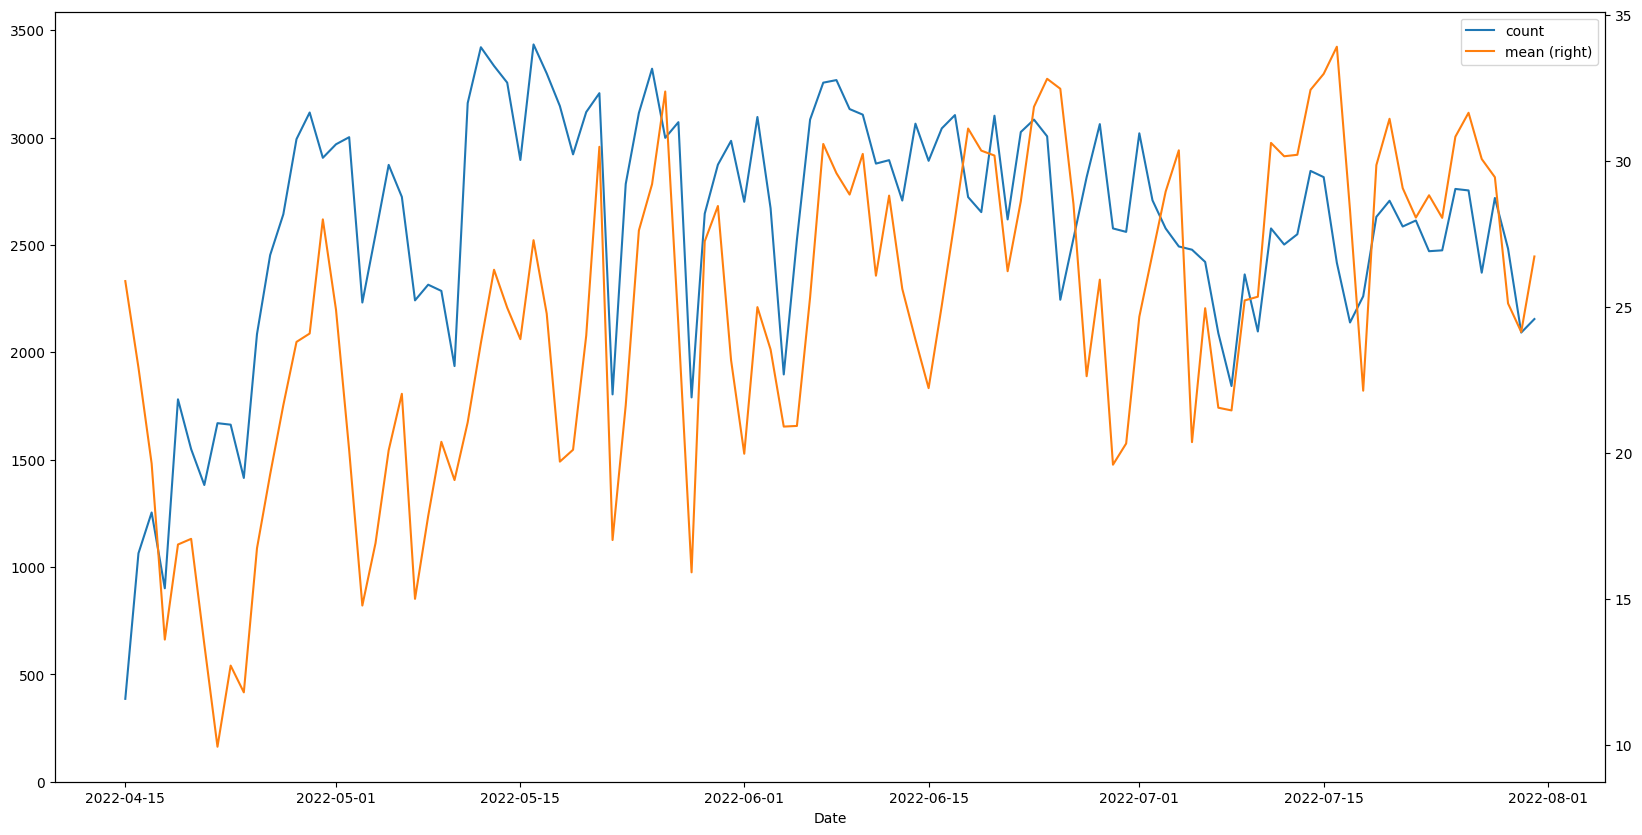

In [80]:
# table with daily trips dunamics
def trips_per_day(month=0):
    if month == 0:
        trips = df2.pivot_table(
            index=df2["dep_date"].dt.date, values="temp", aggfunc={"count", "mean"}
        )
        trips["count"] = trips["count"].astype(int)
        trips.to_excel(path + "trips_per_day_all.xlsx")
        print(
            f"Table for the whole season is exporterd to {path}trips_per_day_all.xlsx"
        )
        return trips.plot(secondary_y="mean", xlabel="Date", figsize=(20, 10)).set_ylim(
            bottom=0
        )
    elif month in df2["month"].unique():
        trips = df2[df2["month"] == month].pivot_table(
            index=df2["dep_date"].dt.date, values="temp", aggfunc={"count", "mean"}
        )
        trips["count"] = trips["count"].astype(int)
        trips.to_excel(path + "trips_per_day_" + str(month) + ".xlsx")
        print(
            f"Table for {month}th month is exported to {path}trips_per_day_{month}.xlsx"
        )
        return trips.plot(secondary_y="mean", xlabel="Date", figsize=(20, 10)).set_ylim(
            bottom=0
        )
    else:
        return "No data"


print("Trips dynamics:", trips_per_day(0), sep="\n")

Table for 4th month is exported to /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/trips_per_day_4.xlsx
4th month - trips dynamics 
 (0.0, 3253.55)


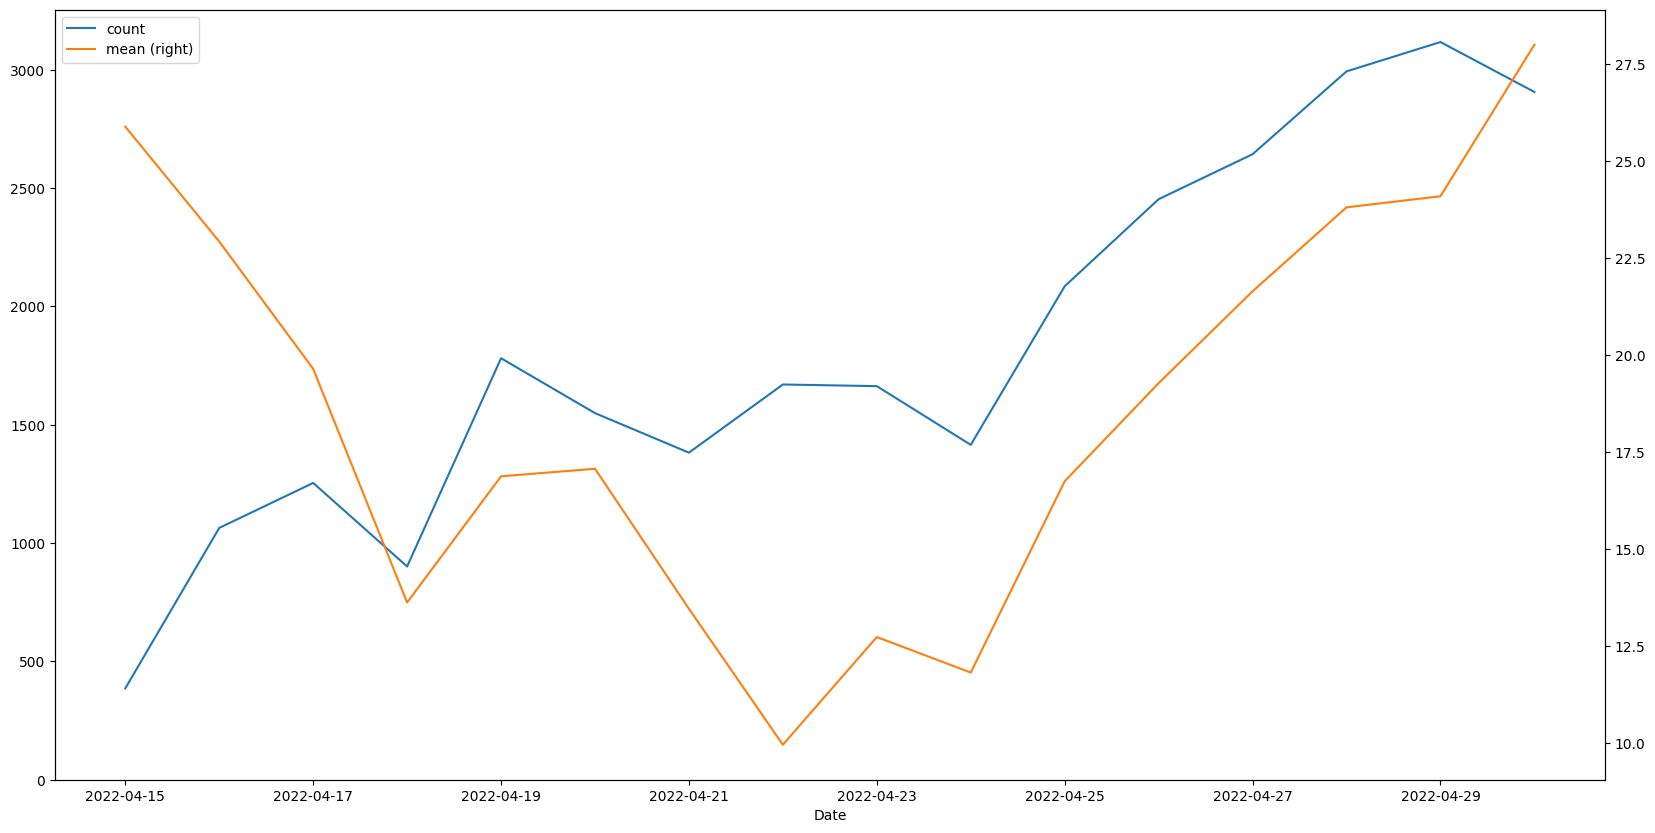

In [81]:
print("4th month - trips dynamics", "\n", trips_per_day(4))

Table for 5th month is exported to /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/trips_per_day_5.xlsx
5th month - trips dynamics 
 (0.0, 3516.2)


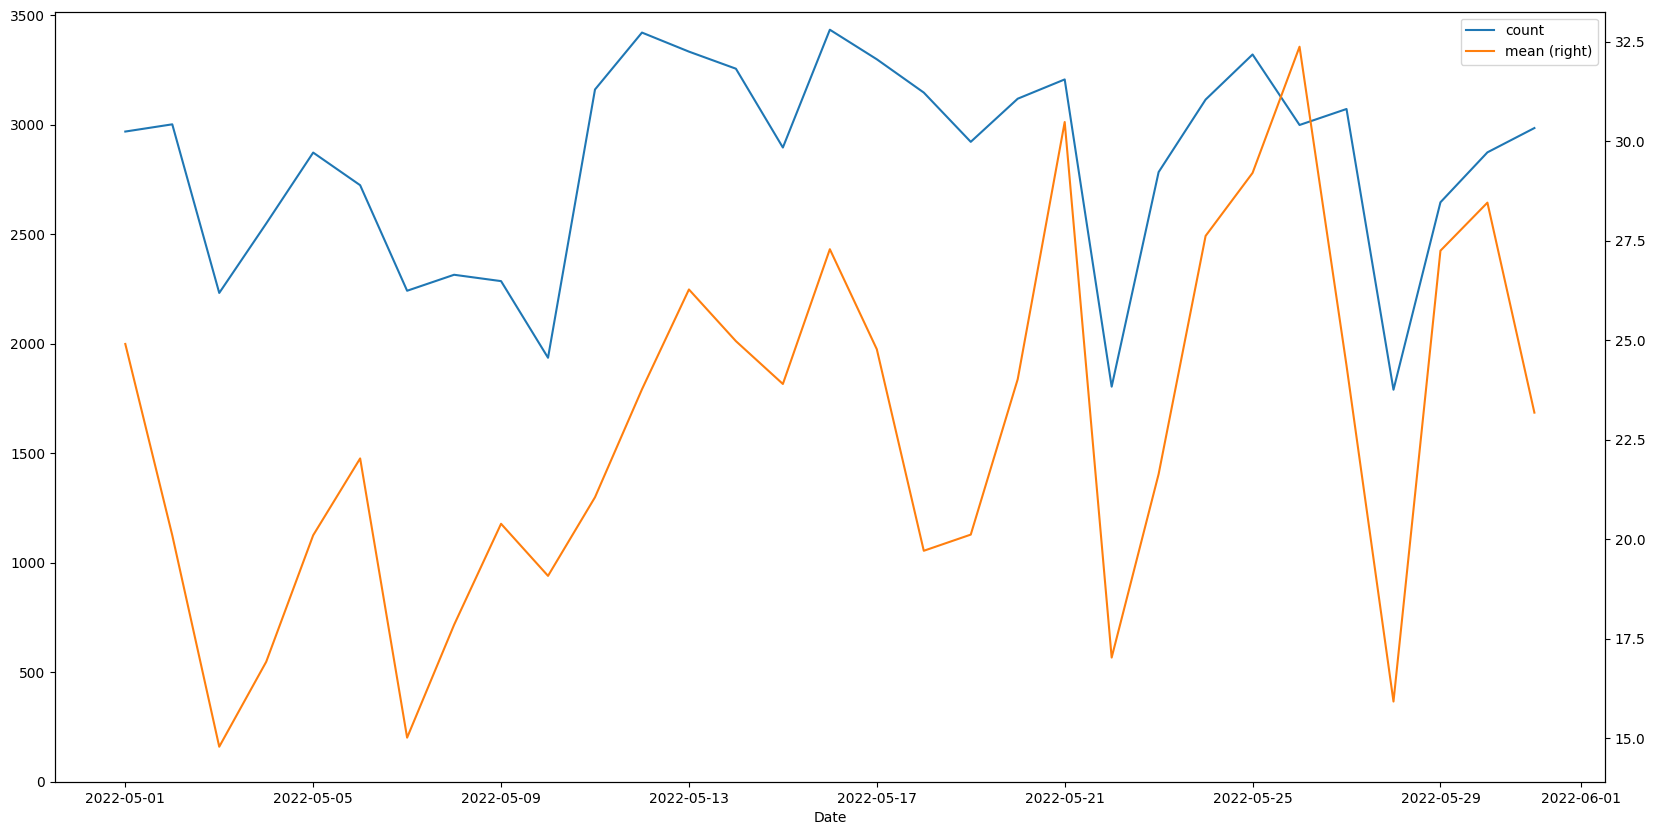

In [82]:
print("5th month - trips dynamics", "\n", trips_per_day(5))

Table for 6th month is exported to /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/trips_per_day_6.xlsx
6th month - trips dynamics 
 (0.0, 3336.55)


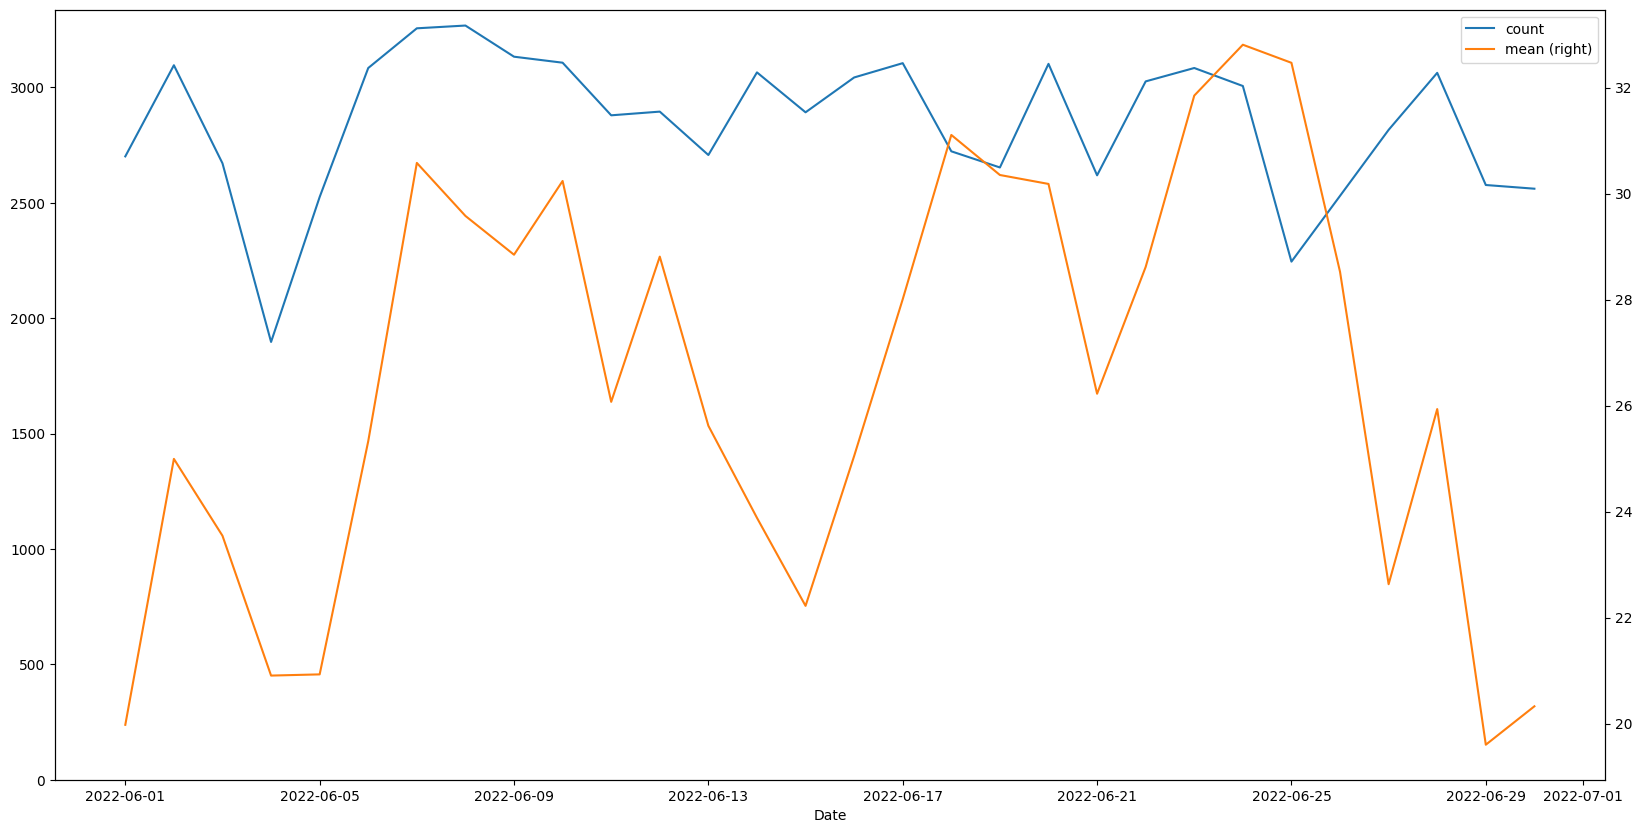

In [83]:
print("6th month - trips dynamics", "\n", trips_per_day(6))

Table for 7th month is exported to /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/trips_per_day_7.xlsx
7th month - trips dynamics 
 (0.0, 3078.85)


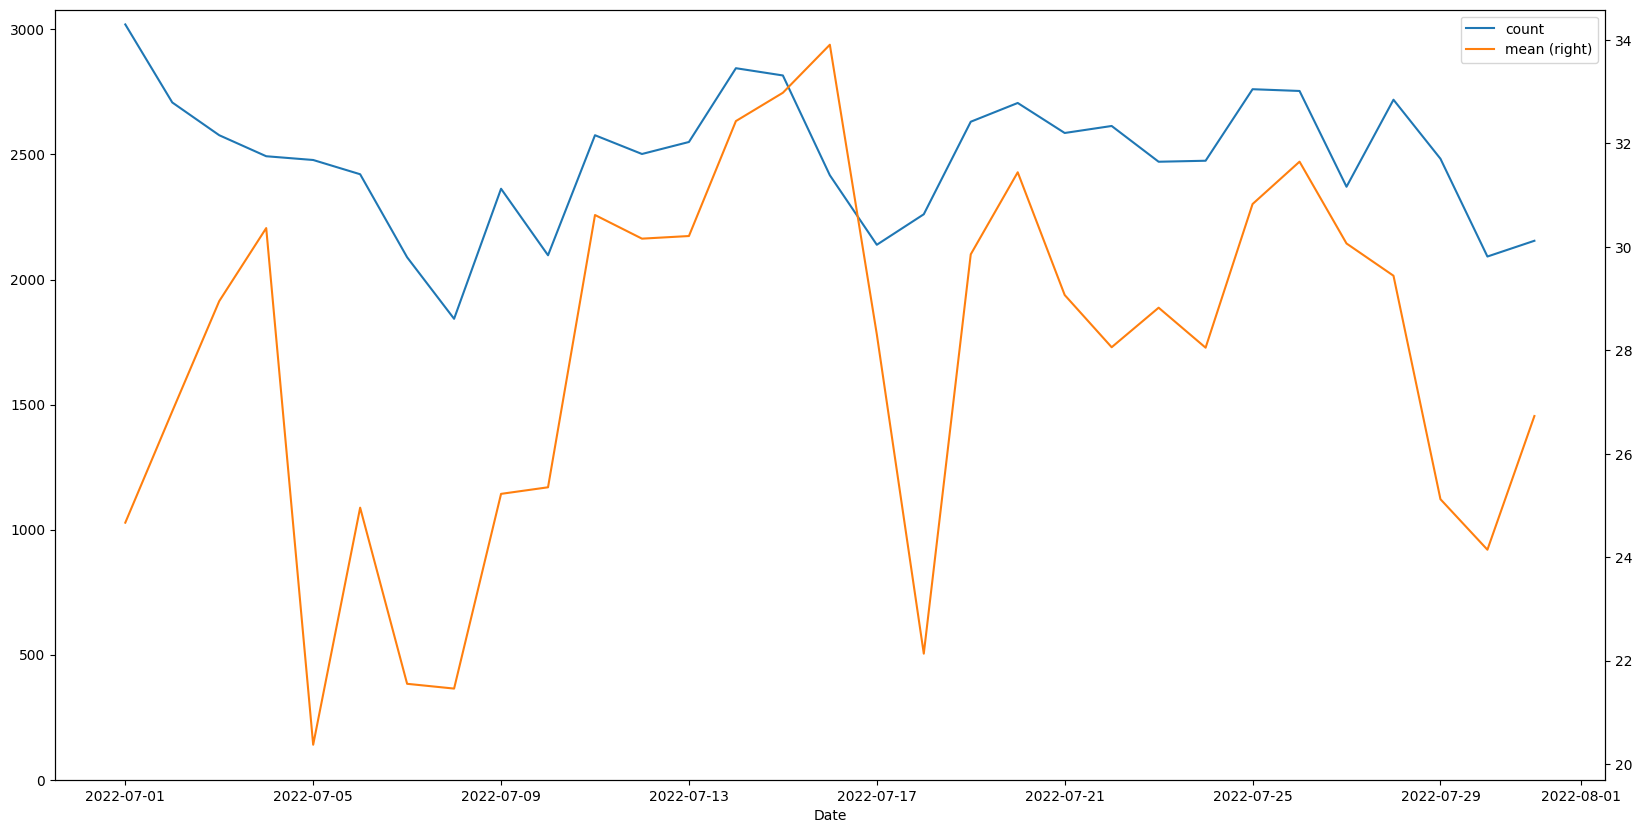

In [84]:
print("7th month - trips dynamics", "\n", trips_per_day(7))

In [85]:
print("8th month - trips dynamics", "\n", trips_per_day(8))

8th month - trips dynamics 
 No data


In [86]:
print("9th month - trips dynamics", "\n", trips_per_day(9))

9th month - trips dynamics 
 No data


In [87]:
print("10th month - trips dynamics", "\n", trips_per_day(10))

10th month - trips dynamics 
 No data


## 2.4 Trips matrix

### 2.4.1 Stations coordinates

Station coordinates are available from the bike sharing management portal, where we got the initial base data.

As we download the .csv file to the root folder, the file must be renamed to `station_coordinates.csv`.

In [88]:
# import coordinates
locations = pd.read_csv(path + "station_coordinates.csv", dtype={"Код": str})
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Код             156 non-null    object
 1   Имя/Название    156 non-null    object
 2   Координаты GPS  156 non-null    object
dtypes: object(3)
memory usage: 3.8+ KB


The file contains `station id`, `station name` and `coordinates`. Coordinates are stored in one cell, they need to be divided into `latitude` and `longitude`. Then we will remove the technical service stations and the file will be ready for uploading to the `FlowmapBlue` service.

In [89]:
# renaming column names
locations.rename(
    columns={
        "Код": "station_id",
        "Имя/Название": "station_name",
        "Координаты GPS": "coordinates",
    },
    inplace=True,
)
# dividing coordinates into separate longitude and latitude columns
locations[["latitude", "longitude"]] = locations["coordinates"].str.split(
    ",", n=1, expand=True
)
locations["latitude"] = locations["latitude"].map(lambda x: x.rstrip("°"))
locations["longitude"] = locations["longitude"].map(lambda x: x.rstrip("°"))
locations.drop(columns=["coordinates"], inplace=True)
# deleting technical services stations
locations.drop(
    locations[
        (locations["station_id"] == "054") | (locations["station_id"] == "199")
    ].index,
    inplace=True,
)
locations.reset_index(drop=True, inplace=True)
locations.info()  # check
# export table to .xlsx
# locations.to_excel(path + "station_coordinates.xlsx", index=False)
# print(f"Station coordinates are exported to {path}station_coordinates.xlsx")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   station_id    154 non-null    object
 1   station_name  154 non-null    object
 2   latitude      154 non-null    object
 3   longitude     154 non-null    object
dtypes: object(4)
memory usage: 4.9+ KB


### 2.4.2 Trips correspondence

Создаем таблицы для загрузки в `flowmap`. Для всей базы данных и для каждого отдельного месяца в корневую папку формируются таблицы общая, утренних поездок и вечерних поездок.

In [90]:
def create_matrix(month=0, time=0):  # функция расчета
    if time == "morning":
        if month == 0:
            df2_pivot = df2[df2["peak"] == "morning"].pivot_table(
                index=["dep_station_id", "ret_station_id"], aggfunc="size"
            )
            with pd.option_context("display.multi_sparse", False):
                df2_pivot.reset_index().to_excel(
                    path + "matrix_all_morning.xlsx", index=False
                )
                print(
                    f"Матрица утренних поездок выгружена в файл {path}matrix_all_morning.xlsx"
                )
                print("Топ 15 наиболее востребованных направлений")
                df2_pivot = df2[df2["peak"] == "morning"].pivot_table(
                    index=[
                        "dep_station_id",
                        "dep_station_name",
                        "ret_station_id",
                        "ret_station_name",
                    ],
                    aggfunc="size",
                )
                display(df2_pivot.sort_values(ascending=False).head(15))
        elif month in df2["month"].unique():
            df2_pivot = df2[
                (df2["month"] == month) & (df2["peak"] == "morning")
            ].pivot_table(index=["dep_station_id", "ret_station_id"], aggfunc="size")
            with pd.option_context("display.multi_sparse", False):
                df2_pivot.reset_index().to_excel(
                    path + "matrix_" + str(month) + "_morning.xlsx", index=False
                )
                print(
                    f"Матрица утренних поездок за {month}-й месяц выгружена в файл {path}matrix_{month}_morning.xlsx"
                )
                print("Топ 15 наиболее востребованных направлений")
                df2_pivot = df2[
                    (df2["month"] == month) & (df2["peak"] == "morning")
                ].pivot_table(
                    index=[
                        "dep_station_id",
                        "dep_station_name",
                        "ret_station_id",
                        "ret_station_name",
                    ],
                    aggfunc="size",
                )
                display(df2_pivot.sort_values(ascending=False).head(15))
        else:
            print("Данные отсутсвуют")
    elif time == "evening":
        if month == 0:
            df2_pivot = df2[df2["peak"] == "evening"].pivot_table(
                index=["dep_station_id", "ret_station_id"], aggfunc="size"
            )
            with pd.option_context("display.multi_sparse", False):
                df2_pivot.reset_index().to_excel(
                    path + "matrix_all_evening.xlsx", index=False
                )
                print(
                    f"Матрица вечерних поездок выгружена в файл {path}matrix_all_evening.xlsx"
                )
                print("Топ 15 наиболее востребованных направлений")
                df2_pivot = df2[df2["peak"] == "evening"].pivot_table(
                    index=[
                        "dep_station_id",
                        "dep_station_name",
                        "ret_station_id",
                        "ret_station_name",
                    ],
                    aggfunc="size",
                )
                display(df2_pivot.sort_values(ascending=False).head(15))
        elif month in df2["month"].unique():
            df2_pivot = df2[
                (df2["month"] == month) & (df2["peak"] == "evening")
            ].pivot_table(index=["dep_station_id", "ret_station_id"], aggfunc="size")
            with pd.option_context("display.multi_sparse", False):
                df2_pivot.reset_index().to_excel(
                    path + "matrix_" + str(month) + "_evening.xlsx", index=False
                )
                print(
                    f"Матрица вечерних поездок за {month}-й месяц выгружена в файл {path}matrix_{month}_evening.xlsx"
                )
                print("Топ 15 наиболее востребованных направлений")
                df2_pivot = df2[
                    (df2["month"] == month) & (df2["peak"] == "evening")
                ].pivot_table(
                    index=[
                        "dep_station_id",
                        "dep_station_name",
                        "ret_station_id",
                        "ret_station_name",
                    ],
                    aggfunc="size",
                )
                display(df2_pivot.sort_values(ascending=False).head(15))
        else:
            print("Данные отсутсвуют")
    else:
        if month == 0:
            df2_pivot = df2.pivot_table(
                index=["dep_station_id", "ret_station_id"], aggfunc="size"
            )
            with pd.option_context("display.multi_sparse", False):
                df2_pivot.reset_index().to_excel(path + "matrix_all.xlsx", index=False)
                print(f"Матрица всех поездок выгружена в файл {path}matrix_all.xlsx")
                print("Топ 15 наиболее востребованных направлений")
                df2_pivot = df2.pivot_table(
                    index=[
                        "dep_station_id",
                        "dep_station_name",
                        "ret_station_id",
                        "ret_station_name",
                    ],
                    aggfunc="size",
                )
                display(df2_pivot.sort_values(ascending=False).head(15))
        elif month in df2["month"].unique():
            df2_pivot = df2[df2["month"] == month].pivot_table(
                index=["dep_station_id", "ret_station_id"], aggfunc="size"
            )
            with pd.option_context("display.multi_sparse", False):
                df2_pivot.reset_index().to_excel(
                    path + "matrix_" + str(month) + ".xlsx", index=False
                )
                print(
                    f"Матрица за {month}-й месяц выгружена в файл {path}matrix_{month}.xlsx"
                )
                print("Топ 15 наиболее востребованных направлений")
                df2_pivot = df2[df2["month"] == month].pivot_table(
                    index=[
                        "dep_station_id",
                        "dep_station_name",
                        "ret_station_id",
                        "ret_station_name",
                    ],
                    aggfunc="size",
                )
                display(df2_pivot.sort_values(ascending=False).head(15))
        else:
            print("Данные отсутсвуют")


# вывод информации
peak_choises = [0, "morning", "evening"]
for choise in peak_choises:
    create_matrix(0, choise)
    print()
for i in range(4, 11):
    print(f"{i}-й месяц:")
    for choise in peak_choises:
        if choise == 0:
            create_matrix(i, choise)
            print()
        else:
            print(choise, "- ", end="")
            create_matrix(i, choise)
            print()

Матрица всех поездок выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/matrix_all.xlsx
Топ 15 наиболее востребованных направлений


dep_station_id  dep_station_name                                                  ret_station_id  ret_station_name                                 
152             "Ботанический сад" центральный вход, ул.Түркістан                 152             "Ботанический сад" центральный вход, ул.Түркістан    979
020             Ботанический сад, ул. Орынбор 16                                  020             Ботанический сад, ул. Орынбор 16                     845
139             Astana Music Hall ресторан, пр.Б.Момышулы 1                       139             Astana Music Hall ресторан, пр.Б.Момышулы 1          588
152             "Ботанический сад" центральный вход, ул.Түркістан                 020             Ботанический сад, ул. Орынбор 16                     549
020             Ботанический сад, ул. Орынбор 16                                  152             "Ботанический сад" центральный вход, ул.Түркістан    540
011             ТРЦ "Сарыарка", пр.Тұран 24                                  


Матрица утренних поездок выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/matrix_all_morning.xlsx
Топ 15 наиболее востребованных направлений


dep_station_id  dep_station_name                                                  ret_station_id  ret_station_name                                                
001             Парк "Астана", пр. Тұран                                          011             ТРЦ "Сарыарка", пр.Тұран 24                                         59
036             Детский сад «Нур-Ай», ул.Алматы, 6                                040             "Дом Министерств" правое крыло, пр.Мәңгілік Ел 8/ул.Достык          55
014             пр.Тұран и ул.Сығанақ, автобусная остановка ЖК "Зеленый квартал"  015             ЖК "Зеленый Квартал", ул.Сығанақ                                    50
037             «Анвар» супермаркет,ул.Алматы, 5                                  035             ЖК «Коркем»,пр. Мәңгілік Ел 17/ ул.Алматы                           50
015             ЖК "Зеленый Квартал", ул.Сығанақ                                  154             Астана LRT, пр. Тұран 34                                       


Матрица вечерних поездок выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/matrix_all_evening.xlsx
Топ 15 наиболее востребованных направлений


dep_station_id  dep_station_name                                                  ret_station_id  ret_station_name                                 
043             Мечеть «Нұр Астана», пр.Қабанбай батыр 36                         043             Мечеть «Нұр Астана», пр.Қабанбай батыр 36            146
011             ТРЦ "Сарыарка", пр.Тұран 24                                       001             Парк "Астана", пр. Тұран                             145
134             Пицца Блюз кафе, ул.Қаныш Сәтбаева 11                             134             Пицца Блюз кафе, ул.Қаныш Сәтбаева 11                117
152             "Ботанический сад" центральный вход, ул.Түркістан                 152             "Ботанический сад" центральный вход, ул.Түркістан    116
011             ТРЦ "Сарыарка", пр.Тұран 24                                       110             ЖК "Манхэттен", ул. Мухамедханов                      99
020             Ботанический сад, ул. Орынбор 16                             


4-й месяц:
Матрица за 4-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/matrix_4.xlsx
Топ 15 наиболее востребованных направлений


dep_station_id  dep_station_name                                     ret_station_id  ret_station_name                                   
152             "Ботанический сад" центральный вход, ул.Түркістан    152             "Ботанический сад" центральный вход, ул.Түркістан      133
044             Бульвар "Нуржол",со стороны БЦ "Изумрудный квартал"  044             Бульвар "Нуржол",со стороны БЦ "Изумрудный квартал"     74
020             Ботанический сад, ул. Орынбор 16                     020             Ботанический сад, ул. Орынбор 16                        59
011             ТРЦ "Сарыарка", пр.Тұран 24                          001             Парк "Астана", пр. Тұран                                56
139             Astana Music Hall ресторан, пр.Б.Момышулы 1          139             Astana Music Hall ресторан, пр.Б.Момышулы 1             55
043             Мечеть «Нұр Астана», пр.Қабанбай батыр 36            043             Мечеть «Нұр Астана», пр.Қабанбай батыр 36               53


morning - Матрица утренних поездок за 4-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/matrix_4_morning.xlsx
Топ 15 наиболее востребованных направлений


dep_station_id  dep_station_name                                          ret_station_id  ret_station_name                                   
153             ЖК "Олимп палас", ул.Түркістан 8                          044             Бульвар "Нуржол",со стороны БЦ "Изумрудный квартал"    9
020             Ботанический сад, ул. Орынбор 16                          047             Отель «Дипломат», ул.Динмухамеда Кунаева, 12/1         9
037             «Анвар» супермаркет,ул.Алматы, 5                          035             ЖК «Коркем»,пр. Мәңгілік Ел 17/ ул.Алматы              8
057             Спорткомплекс «Астана»                                    098             Аллея писателей/ Сембинова 14а                         8
129             Парка Жеруйык, центральный вход пр.Б.Момышулы             129             Парка Жеруйык, центральный вход пр.Б.Момышулы          8
146             Best Food, пр.Қошқарбаев 40а/ул.Сарыкол                   139             Astana Music Hall ресторан, пр.Б.


evening - Матрица вечерних поездок за 4-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/matrix_4_evening.xlsx
Топ 15 наиболее востребованных направлений


dep_station_id  dep_station_name                                     ret_station_id  ret_station_name                                   
043             Мечеть «Нұр Астана», пр.Қабанбай батыр 36            043             Мечеть «Нұр Астана», пр.Қабанбай батыр 36              24
044             Бульвар "Нуржол",со стороны БЦ "Изумрудный квартал"  044             Бульвар "Нуржол",со стороны БЦ "Изумрудный квартал"    24
011             ТРЦ "Сарыарка", пр.Тұран 24                          001             Парк "Астана", пр. Тұран                               16
152             "Ботанический сад" центральный вход, ул.Түркістан    152             "Ботанический сад" центральный вход, ул.Түркістан      15
083             ул.Кенесары 32, Конгресс Холл                        083             ул.Кенесары 32, Конгресс Холл                          14
134             Пицца Блюз кафе, ул.Қаныш Сәтбаева 11                134             Пицца Блюз кафе, ул.Қаныш Сәтбаева 11                  14
111  


5-й месяц:
Матрица за 5-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/matrix_5.xlsx
Топ 15 наиболее востребованных направлений


dep_station_id  dep_station_name                                                  ret_station_id  ret_station_name                                   
152             "Ботанический сад" центральный вход, ул.Түркістан                 152             "Ботанический сад" центральный вход, ул.Түркістан      302
020             Ботанический сад, ул. Орынбор 16                                  020             Ботанический сад, ул. Орынбор 16                       270
152             "Ботанический сад" центральный вход, ул.Түркістан                 020             Ботанический сад, ул. Орынбор 16                       189
139             Astana Music Hall ресторан, пр.Б.Момышулы 1                       139             Astana Music Hall ресторан, пр.Б.Момышулы 1            188
020             Ботанический сад, ул. Орынбор 16                                  152             "Ботанический сад" центральный вход, ул.Түркістан      183
094             пр.Республики Старый Арбат                       


morning - Матрица утренних поездок за 5-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/matrix_5_morning.xlsx
Топ 15 наиболее востребованных направлений


dep_station_id  dep_station_name                                                  ret_station_id  ret_station_name                                          
014             пр.Тұран и ул.Сығанақ, автобусная остановка ЖК "Зеленый квартал"  015             ЖК "Зеленый Квартал", ул.Сығанақ                              25
135             АЗС "Номад", пр.Тәуелсіздік и ул.Күйші Дина                       049             ЖК «Нурсая 1»                                                 25
023             ЖК «Инфинити 2», пр. Қабанбай батыр 42                            047             Отель «Дипломат», ул.Динмухамеда Кунаева, 12/1                20
015             ЖК "Зеленый Квартал", ул.Сығанақ                                  154             Астана LRT, пр. Тұран 34                                      20
125             №7 Поликлиника, пр.Құдайбердіұлы 25                               111             магазин "Домашний" ул.Жубанова 21                             18
098             Аллея писате


evening - Матрица вечерних поездок за 5-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/matrix_5_evening.xlsx
Топ 15 наиболее востребованных направлений


dep_station_id  dep_station_name                                                  ret_station_id  ret_station_name                                   
043             Мечеть «Нұр Астана», пр.Қабанбай батыр 36                         043             Мечеть «Нұр Астана», пр.Қабанбай батыр 36              52
011             ТРЦ "Сарыарка", пр.Тұран 24                                       001             Парк "Астана", пр. Тұран                               51
011             ТРЦ "Сарыарка", пр.Тұран 24                                       110             ЖК "Манхэттен", ул. Мухамедханов                       40
020             Ботанический сад, ул. Орынбор 16                                  020             Ботанический сад, ул. Орынбор 16                       40
152             "Ботанический сад" центральный вход, ул.Түркістан                 152             "Ботанический сад" центральный вход, ул.Түркістан      37
044             Бульвар "Нуржол",со стороны БЦ "Изумрудный квартал"   


6-й месяц:
Матрица за 6-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/matrix_6.xlsx
Топ 15 наиболее востребованных направлений


dep_station_id  dep_station_name                                                  ret_station_id  ret_station_name                                 
152             "Ботанический сад" центральный вход, ул.Түркістан                 152             "Ботанический сад" центральный вход, ул.Түркістан    277
020             Ботанический сад, ул. Орынбор 16                                  020             Ботанический сад, ул. Орынбор 16                     252
139             Astana Music Hall ресторан, пр.Б.Момышулы 1                       139             Astana Music Hall ресторан, пр.Б.Момышулы 1          177
020             Ботанический сад, ул. Орынбор 16                                  152             "Ботанический сад" центральный вход, ул.Түркістан    154
011             ТРЦ "Сарыарка", пр.Тұран 24                                       001             Парк "Астана", пр. Тұран                             151
152             "Ботанический сад" центральный вход, ул.Түркістан            


morning - Матрица утренних поездок за 6-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/matrix_6_morning.xlsx
Топ 15 наиболее востребованных направлений


dep_station_id  dep_station_name                                                  ret_station_id  ret_station_name                                                
001             Парк "Астана", пр. Тұран                                          011             ТРЦ "Сарыарка", пр.Тұран 24                                         29
036             Детский сад «Нур-Ай», ул.Алматы, 6                                040             "Дом Министерств" правое крыло, пр.Мәңгілік Ел 8/ул.Достык          28
015             ЖК "Зеленый Квартал", ул.Сығанақ                                  154             Астана LRT, пр. Тұран 34                                            21
100             "Астанателеком" автобусная остановка, пр. Кенесары 61             101             ЖК "Тараз", пр. Абая 63                                             20
139             Astana Music Hall ресторан, пр.Б.Момышулы 1                       092             ТД "Жастар" ул.Кравцова и ул. Ш.Уалиханова                     


evening - Матрица вечерних поездок за 6-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/matrix_6_evening.xlsx
Топ 15 наиболее востребованных направлений


dep_station_id  dep_station_name                                                  ret_station_id  ret_station_name                                                
152             "Ботанический сад" центральный вход, ул.Түркістан                 152             "Ботанический сад" центральный вход, ул.Түркістан                   41
011             ТРЦ "Сарыарка", пр.Тұран 24                                       001             Парк "Астана", пр. Тұран                                            36
041             Монумент "Байтерек", ул.Достык/ул.Түркістан                       041             Монумент "Байтерек", ул.Достык/ул.Түркістан                         31
139             Astana Music Hall ресторан, пр.Б.Момышулы 1                       139             Astana Music Hall ресторан, пр.Б.Момышулы 1                         29
025             «Назарбаев Университет», пр.Қабанбай батыра 53                    029             ЖК "EXPO Boulevard", пр.Ұлы Дала 6/1                           


7-й месяц:
Матрица за 7-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/matrix_7.xlsx
Топ 15 наиболее востребованных направлений


dep_station_id  dep_station_name                                        ret_station_id  ret_station_name                                      
152             "Ботанический сад" центральный вход, ул.Түркістан       152             "Ботанический сад" центральный вход, ул.Түркістан         267
020             Ботанический сад, ул. Орынбор 16                        020             Ботанический сад, ул. Орынбор 16                          264
134             Пицца Блюз кафе, ул.Қаныш Сәтбаева 11                   134             Пицца Блюз кафе, ул.Қаныш Сәтбаева 11                     214
020             Ботанический сад, ул. Орынбор 16                        152             "Ботанический сад" центральный вход, ул.Түркістан         178
152             "Ботанический сад" центральный вход, ул.Түркістан       020             Ботанический сад, ул. Орынбор 16                          175
139             Astana Music Hall ресторан, пр.Б.Момышулы 1             139             Astana Music Hall р


morning - Матрица утренних поездок за 7-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/matrix_7_morning.xlsx
Топ 15 наиболее востребованных направлений


dep_station_id  dep_station_name                                  ret_station_id  ret_station_name                                                
018             Школа-лицей №71, ул. Ілияс Омаров, 4              014             пр.Тұран и ул.Сығанақ, автобусная остановка ЖК "Зеленый квартал"    27
001             Парк "Астана", пр. Тұран                          011             ТРЦ "Сарыарка", пр.Тұран 24                                         19
036             Детский сад «Нур-Ай», ул.Алматы, 6                040             "Дом Министерств" правое крыло, пр.Мәңгілік Ел 8/ул.Достык          18
037             «Анвар» супермаркет,ул.Алматы, 5                  035             ЖК «Коркем»,пр. Мәңгілік Ел 17/ ул.Алматы                           18
139             Astana Music Hall ресторан, пр.Б.Момышулы 1       045             "Қазмедиа орталығы", ул.Динмухамеда Кунаева, 4                      18
059             пересечение Кенесары-Кумысбековой напротив Small  055             ЖК Эде


evening - Матрица вечерних поездок за 7-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/matrix_7_evening.xlsx
Топ 15 наиболее востребованных направлений


dep_station_id  dep_station_name                                   ret_station_id  ret_station_name                                 
134             Пицца Блюз кафе, ул.Қаныш Сәтбаева 11              134             Пицца Блюз кафе, ул.Қаныш Сәтбаева 11                54
043             Мечеть «Нұр Астана», пр.Қабанбай батыр 36          043             Мечеть «Нұр Астана», пр.Қабанбай батыр 36            42
011             ТРЦ "Сарыарка", пр.Тұран 24                        001             Парк "Астана", пр. Тұран                             42
039             Остановка ЖК «Уют» напротив Life Fitness           152             "Ботанический сад" центральный вход, ул.Түркістан    40
110             ЖК "Манхэттен", ул. Мухамедханов                   011             ТРЦ "Сарыарка", пр.Тұран 24                          35
011             ТРЦ "Сарыарка", пр.Тұран 24                        011             ТРЦ "Сарыарка", пр.Тұран 24                          33
020             Ботанический сад,


8-й месяц:
Данные отсутсвуют

morning - Данные отсутсвуют

evening - Данные отсутсвуют

9-й месяц:
Данные отсутсвуют

morning - Данные отсутсвуют

evening - Данные отсутсвуют

10-й месяц:
Данные отсутсвуют

morning - Данные отсутсвуют

evening - Данные отсутсвуют



## 2.5 Статистика и анализ станций велопроката

Представляется статистика велопрокатных станций (общая, по месяцам, в утренние и вечерние часы пик):
- наиболее востребованные станции
- наименее востребованные станции
- станции с самым большим дисбалансом свободных слотов и велосипедов
- карты загруженности велостанций

In [91]:
# matrix = pd.read_excel(path + 'matrix_all.xlsx') # define matrix
# functions for counting
def count_deps(station_id, source):
    station_deps = source[source["dep_station_id"] == station_id][0].sum()
    return station_deps


def count_rets(station_id, source):
    station_rets = source[source["ret_station_id"] == station_id][0].sum()
    return station_rets


def define_category(row):
    if row <= 0.85:
        return "переполненная"
    elif (row > 0.85) & (row <= 0.96):
        return "полная"
    elif (row > 0.96) & (row <= 1.04):
        return "сбалансированная"
    elif (row > 1.04) & (row <= 1.15):
        return "свободная"
    elif row > 1.15:
        return "пустая"
    else:
        return "не работает"

In [92]:
stations = pd.read_excel(path + "station_coordinates.xlsx")  # define stations
stations.insert(2, "deps", 0)
stations.insert(3, "rets", 0)
stations.insert(4, "total", 0)
stations.insert(5, "space_rate", 0)
stations.insert(6, "category", "не работает")
stations.insert(7, "disbalance", 0)
stations.insert(8, "difference", 0)


def analyze_stations(month=0, time=0):
    if time == "morning":
        if month == 0:
            matrix = pd.read_excel(path + "matrix_all_morning.xlsx")
            stations["deps"] = stations["station_id"].apply(count_deps, source=matrix)
            stations["rets"] = stations["station_id"].apply(count_rets, source=matrix)
            stations["total"] = stations["deps"] + stations["rets"]
            stations["space_rate"] = stations["deps"] / stations["rets"]
            stations["category"] = stations["space_rate"].apply(define_category)
            stations["disbalance"] = 1 - stations["space_rate"]
            stations["difference"] = stations["rets"] - stations["deps"]
            stations.reset_index().to_excel(
                path + "stations_all_morning.xlsx", index=False
            )
            print(
                f"Статистика станций по утрам выгружена в файл {path}stations_all_morning.xlsx"
            )
            try:
                stations["text"] = (
                    stations["station_id"].astype(str)
                    + " "
                    + stations["station_name"]
                    + " - "
                    + stations["total"].astype(str)
                )
            except:
                stations["text"] = (
                    stations["station_id"].astype(str)
                    + " "
                    + stations["station_name"]
                    + " - станция не работает"
                )
            fig = go.Figure(
                data=go.Scattergeo(
                    locationmode="country names",
                    lon=stations["longitude"],
                    lat=stations["latitude"],
                    text=stations["text"],
                    mode="markers",
                    marker=dict(
                        size=8,
                        opacity=0.8,
                        reversescale=False,
                        autocolorscale=False,
                        symbol="square",
                        line=dict(width=1, color="rgba(102, 102, 102)"),
                        colorscale="Blues",
                        cmin=0,
                        color=stations["total"],
                        cmax=stations["total"].max(),
                        colorbar_title="Total trips",
                    ),
                )
            )
            fig.update_geos(fitbounds="locations")
            fig.show()
            stations.drop(["text"], axis=1, inplace=True)
            print("Топ 15 наиболее востребованных станций")
            display(
                stations.sort_values(by="total", ascending=False)
                .reset_index(drop=True)
                .head(15)
            )
            print("Топ 15 наименее востребованных станций")
            display(
                stations.sort_values(by="total", ascending=True)
                .reset_index(drop=True)
                .head(15)
            )
            print()
            stations["text"] = (
                stations["station_id"].astype(str)
                + " "
                + stations["station_name"]
                + " - "
                + stations["category"]
            )
            fig = go.Figure(
                data=go.Scattergeo(
                    locationmode="country names",
                    lon=stations["longitude"],
                    lat=stations["latitude"],
                    text=stations["text"],
                    mode="markers",
                    marker=dict(
                        size=8,
                        opacity=0.8,
                        reversescale=False,
                        autocolorscale=False,
                        symbol="square",
                        line=dict(width=1, color="rgba(102, 102, 102)"),
                        colorscale="rdbu",
                        color=stations["disbalance"],
                        cmax=stations["disbalance"].max(),
                        cmin=stations["disbalance"].min(),
                        colorbar_title="Availability rate",
                    ),
                )
            )
            fig.update_geos(fitbounds="locations")
            fig.show()
            stations.drop(["text"], axis=1, inplace=True)
            print("Топ 15 переполненных станций")
            display(
                stations.sort_values(by="disbalance", ascending=False)
                .reset_index(drop=True)
                .head(15)
            )
            print("Топ 15 пустующих станций")
            display(
                stations.sort_values(by="disbalance", ascending=True)
                .reset_index(drop=True)
                .head(15)
            )
        elif month in df2["month"].unique():
            matrix = pd.read_excel(path + "matrix_" + str(month) + "_morning.xlsx")
            stations["deps"] = stations["station_id"].apply(count_deps, source=matrix)
            stations["rets"] = stations["station_id"].apply(count_rets, source=matrix)
            stations["total"] = stations["deps"] + stations["rets"]
            stations["space_rate"] = stations["deps"] / stations["rets"]
            stations["category"] = stations["space_rate"].apply(define_category)
            stations["disbalance"] = 1 - stations["space_rate"]
            stations["difference"] = stations["rets"] - stations["deps"]
            stations.reset_index().to_excel(
                path + "stations_" + str(month) + "_morning.xlsx", index=False
            )
            print(
                f"Статистика станций по утрам за {month}-й месяц выгружена в файл {path}stations_{month}_morning.xlsx"
            )
            try:
                stations["text"] = (
                    stations["station_id"].astype(str)
                    + " "
                    + stations["station_name"]
                    + " - "
                    + stations["total"].astype(str)
                )
            except:
                stations["text"] = (
                    stations["station_id"].astype(str)
                    + " "
                    + stations["station_name"]
                    + " - станция не работает"
                )
            fig = go.Figure(
                data=go.Scattergeo(
                    locationmode="country names",
                    lon=stations["longitude"],
                    lat=stations["latitude"],
                    text=stations["text"],
                    mode="markers",
                    marker=dict(
                        size=8,
                        opacity=0.8,
                        reversescale=False,
                        autocolorscale=False,
                        symbol="square",
                        line=dict(width=1, color="rgba(102, 102, 102)"),
                        colorscale="Blues",
                        cmin=0,
                        color=stations["total"],
                        cmax=stations["total"].max(),
                        colorbar_title="Total trips",
                    ),
                )
            )
            fig.update_geos(fitbounds="locations")
            fig.show()
            stations.drop(["text"], axis=1, inplace=True)
            print("Топ 15 наиболее востребованных станций")
            display(
                stations.sort_values(by="total", ascending=False)
                .reset_index(drop=True)
                .head(15)
            )
            print("Топ 15 наименее востребованных станций")
            display(
                stations.sort_values(by="total", ascending=True)
                .reset_index(drop=True)
                .head(15)
            )
            print()
            stations["text"] = (
                stations["station_id"].astype(str)
                + " "
                + stations["station_name"]
                + " - "
                + stations["category"]
            )
            fig = go.Figure(
                data=go.Scattergeo(
                    locationmode="country names",
                    lon=stations["longitude"],
                    lat=stations["latitude"],
                    text=stations["text"],
                    mode="markers",
                    marker=dict(
                        size=8,
                        opacity=0.8,
                        reversescale=False,
                        autocolorscale=False,
                        symbol="square",
                        line=dict(width=1, color="rgba(102, 102, 102)"),
                        colorscale="rdbu",
                        color=stations["disbalance"],
                        cmax=stations["disbalance"].max(),
                        cmin=stations["disbalance"].min(),
                        colorbar_title="Availability rate",
                    ),
                )
            )
            fig.update_geos(fitbounds="locations")
            fig.show()
            stations.drop(["text"], axis=1, inplace=True)
            print("Топ 15 переполненных станций")
            display(
                stations.sort_values(by="disbalance", ascending=False)
                .reset_index(drop=True)
                .head(15)
            )
            print("Топ 15 пустующих станций")
            display(
                stations.sort_values(by="disbalance", ascending=True)
                .reset_index(drop=True)
                .head(15)
            )
        else:
            print("Данные отсутсвуют")
    elif time == "evening":
        if month == 0:
            matrix = pd.read_excel(path + "matrix_all_evening.xlsx")
            stations["deps"] = stations["station_id"].apply(count_deps, source=matrix)
            stations["rets"] = stations["station_id"].apply(count_rets, source=matrix)
            stations["total"] = stations["deps"] + stations["rets"]
            stations["space_rate"] = stations["deps"] / stations["rets"]
            stations["category"] = stations["space_rate"].apply(define_category)
            stations["disbalance"] = 1 - stations["space_rate"]
            stations["difference"] = stations["rets"] - stations["deps"]
            stations.reset_index().to_excel(
                path + "stations_all_evening.xlsx", index=False
            )
            print(
                f"Статистика станций по вечерам выгружена в файл {path}stations_all_evening.xlsx"
            )
            try:
                stations["text"] = (
                    stations["station_id"].astype(str)
                    + " "
                    + stations["station_name"]
                    + " - "
                    + stations["total"].astype(str)
                )
            except:
                stations["text"] = (
                    stations["station_id"].astype(str)
                    + " "
                    + stations["station_name"]
                    + " - станция не работает"
                )
            fig = go.Figure(
                data=go.Scattergeo(
                    locationmode="country names",
                    lon=stations["longitude"],
                    lat=stations["latitude"],
                    text=stations["text"],
                    mode="markers",
                    marker=dict(
                        size=8,
                        opacity=0.8,
                        reversescale=False,
                        autocolorscale=False,
                        symbol="square",
                        line=dict(width=1, color="rgba(102, 102, 102)"),
                        colorscale="Blues",
                        cmin=0,
                        color=stations["total"],
                        cmax=stations["total"].max(),
                        colorbar_title="Total trips",
                    ),
                )
            )
            fig.update_geos(fitbounds="locations")
            fig.show()
            stations.drop(["text"], axis=1, inplace=True)
            print("Топ 15 наиболее востребованных станций")
            display(
                stations.sort_values(by="total", ascending=False)
                .reset_index(drop=True)
                .head(15)
            )
            print("Топ 15 наименее востребованных станций")
            display(
                stations.sort_values(by="total", ascending=True)
                .reset_index(drop=True)
                .head(15)
            )
            print()
            stations["text"] = (
                stations["station_id"].astype(str)
                + " "
                + stations["station_name"]
                + " - "
                + stations["category"]
            )
            fig = go.Figure(
                data=go.Scattergeo(
                    locationmode="country names",
                    lon=stations["longitude"],
                    lat=stations["latitude"],
                    text=stations["text"],
                    mode="markers",
                    marker=dict(
                        size=8,
                        opacity=0.8,
                        reversescale=False,
                        autocolorscale=False,
                        symbol="square",
                        line=dict(width=1, color="rgba(102, 102, 102)"),
                        colorscale="rdbu",
                        color=stations["disbalance"],
                        cmax=stations["disbalance"].max(),
                        cmin=stations["disbalance"].min(),
                        colorbar_title="Availability rate",
                    ),
                )
            )
            fig.update_geos(fitbounds="locations")
            fig.show()
            stations.drop(["text"], axis=1, inplace=True)
            print("Топ 15 переполненных станций")
            display(
                stations.sort_values(by="disbalance", ascending=False)
                .reset_index(drop=True)
                .head(15)
            )
            print("Топ 15 пустующих станций")
            display(
                stations.sort_values(by="disbalance", ascending=True)
                .reset_index(drop=True)
                .head(15)
            )
        elif month in df2["month"].unique():
            matrix = pd.read_excel(path + "matrix_" + str(month) + "_evening.xlsx")
            stations["deps"] = stations["station_id"].apply(count_deps, source=matrix)
            stations["rets"] = stations["station_id"].apply(count_rets, source=matrix)
            stations["total"] = stations["deps"] + stations["rets"]
            stations["space_rate"] = stations["deps"] / stations["rets"]
            stations["category"] = stations["space_rate"].apply(define_category)
            stations["disbalance"] = 1 - stations["space_rate"]
            stations["difference"] = stations["rets"] - stations["deps"]
            stations.reset_index().to_excel(
                path + "stations_" + str(month) + "_evening.xlsx", index=False
            )
            print(
                f"Статистика станций по вечерам за {month}-й месяц выгружена в файл {path}stations_{month}_evening.xlsx"
            )
            try:
                stations["text"] = (
                    stations["station_id"].astype(str)
                    + " "
                    + stations["station_name"]
                    + " - "
                    + stations["total"].astype(str)
                )
            except:
                stations["text"] = (
                    stations["station_id"].astype(str)
                    + " "
                    + stations["station_name"]
                    + " - станция не работает"
                )
            fig = go.Figure(
                data=go.Scattergeo(
                    locationmode="country names",
                    lon=stations["longitude"],
                    lat=stations["latitude"],
                    text=stations["text"],
                    mode="markers",
                    marker=dict(
                        size=8,
                        opacity=0.8,
                        reversescale=False,
                        autocolorscale=False,
                        symbol="square",
                        line=dict(width=1, color="rgba(102, 102, 102)"),
                        colorscale="Blues",
                        cmin=0,
                        color=stations["total"],
                        cmax=stations["total"].max(),
                        colorbar_title="Total trips",
                    ),
                )
            )
            fig.update_geos(fitbounds="locations")
            fig.show()
            stations.drop(["text"], axis=1, inplace=True)
            print("Топ 15 наиболее востребованных станций")
            display(
                stations.sort_values(by="total", ascending=False)
                .reset_index(drop=True)
                .head(15)
            )
            print("Топ 15 наименее востребованных станций")
            display(
                stations.sort_values(by="total", ascending=True)
                .reset_index(drop=True)
                .head(15)
            )
            print()
            stations["text"] = (
                stations["station_id"].astype(str)
                + " "
                + stations["station_name"]
                + " - "
                + stations["category"]
            )
            fig = go.Figure(
                data=go.Scattergeo(
                    locationmode="country names",
                    lon=stations["longitude"],
                    lat=stations["latitude"],
                    text=stations["text"],
                    mode="markers",
                    marker=dict(
                        size=8,
                        opacity=0.8,
                        reversescale=False,
                        autocolorscale=False,
                        symbol="square",
                        line=dict(width=1, color="rgba(102, 102, 102)"),
                        colorscale="rdbu",
                        color=stations["disbalance"],
                        cmax=stations["disbalance"].max(),
                        cmin=stations["disbalance"].min(),
                        colorbar_title="Availability rate",
                    ),
                )
            )
            fig.update_geos(fitbounds="locations")
            fig.show()
            stations.drop(["text"], axis=1, inplace=True)
            print("Топ 15 переполненных станций")
            display(
                stations.sort_values(by="disbalance", ascending=False)
                .reset_index(drop=True)
                .head(15)
            )
            print("Топ 15 пустующих станций")
            display(
                stations.sort_values(by="disbalance", ascending=True)
                .reset_index(drop=True)
                .head(15)
            )
        else:
            print("Данные отсутсвуют")
    else:
        if month == 0:
            matrix = pd.read_excel(path + "matrix_all.xlsx")
            stations["deps"] = stations["station_id"].apply(count_deps, source=matrix)
            stations["rets"] = stations["station_id"].apply(count_rets, source=matrix)
            stations["total"] = stations["deps"] + stations["rets"]
            stations["space_rate"] = stations["deps"] / stations["rets"]
            stations["category"] = stations["space_rate"].apply(define_category)
            stations["disbalance"] = 1 - stations["space_rate"]
            stations["difference"] = stations["rets"] - stations["deps"]
            stations.reset_index().to_excel(path + "stations_all.xlsx", index=False)
            print(f"Статистика всех станций выгружена в файл {path}stations_all.xlsx")
            try:
                stations["text"] = (
                    stations["station_id"].astype(str)
                    + " "
                    + stations["station_name"]
                    + " - "
                    + stations["total"].astype(str)
                )
            except:
                stations["text"] = (
                    stations["station_id"].astype(str)
                    + " "
                    + stations["station_name"]
                    + " - станция не работает"
                )
            fig = go.Figure(
                data=go.Scattergeo(
                    locationmode="country names",
                    lon=stations["longitude"],
                    lat=stations["latitude"],
                    text=stations["text"],
                    mode="markers",
                    marker=dict(
                        size=8,
                        opacity=0.8,
                        reversescale=False,
                        autocolorscale=False,
                        symbol="square",
                        line=dict(width=1, color="rgba(102, 102, 102)"),
                        colorscale="Blues",
                        cmin=0,
                        color=stations["total"],
                        cmax=stations["total"].max(),
                        colorbar_title="Total trips",
                    ),
                )
            )
            fig.update_geos(fitbounds="locations")
            fig.show()
            stations.drop(["text"], axis=1, inplace=True)
            print("Топ 15 наиболее востребованных станций")
            display(
                stations.sort_values(by="total", ascending=False)
                .reset_index(drop=True)
                .head(15)
            )
            print("Топ 15 наименее востребованных станций")
            display(
                stations.sort_values(by="total", ascending=True)
                .reset_index(drop=True)
                .head(15)
            )
            stations["text"] = (
                stations["station_id"].astype(str)
                + " "
                + stations["station_name"]
                + " - "
                + stations["category"]
            )
            fig = go.Figure(
                data=go.Scattergeo(
                    locationmode="country names",
                    lon=stations["longitude"],
                    lat=stations["latitude"],
                    text=stations["text"],
                    mode="markers",
                    marker=dict(
                        size=8,
                        opacity=0.8,
                        reversescale=False,
                        autocolorscale=False,
                        symbol="square",
                        line=dict(width=1, color="rgba(102, 102, 102)"),
                        colorscale="rdbu",
                        color=stations["disbalance"],
                        cmax=stations["disbalance"].max(),
                        cmin=stations["disbalance"].min(),
                        colorbar_title="Availability rate",
                    ),
                )
            )
            fig.update_geos(fitbounds="locations")
            fig.show()
            stations.drop(["text"], axis=1, inplace=True)
            print("Топ 15 переполненных станций")
            display(
                stations.sort_values(by="disbalance", ascending=False)
                .reset_index(drop=True)
                .head(15)
            )
            print("Топ 15 пустующих станций")
            display(
                stations.sort_values(by="disbalance", ascending=True)
                .reset_index(drop=True)
                .head(15)
            )
        elif month in df2["month"].unique():
            matrix = pd.read_excel(path + "matrix_" + str(month) + ".xlsx")
            stations["deps"] = stations["station_id"].apply(count_deps, source=matrix)
            stations["rets"] = stations["station_id"].apply(count_rets, source=matrix)
            stations["total"] = stations["deps"] + stations["rets"]
            stations["space_rate"] = stations["deps"] / stations["rets"]
            stations["category"] = stations["space_rate"].apply(define_category)
            stations["disbalance"] = 1 - stations["space_rate"]
            stations["difference"] = stations["rets"] - stations["deps"]
            stations.reset_index().to_excel(
                path + "stations_" + str(month) + ".xlsx", index=False
            )
            print(
                f"Статистика станций за {month}-й месяц выгружена в файл {path}stations_{month}.xlsx"
            )
            try:
                stations["text"] = (
                    stations["station_id"].astype(str)
                    + " "
                    + stations["station_name"]
                    + " - "
                    + stations["total"].astype(str)
                )
            except:
                stations["text"] = (
                    stations["station_id"].astype(str)
                    + " "
                    + stations["station_name"]
                    + " - станция не работает"
                )
            fig = go.Figure(
                data=go.Scattergeo(
                    locationmode="country names",
                    lon=stations["longitude"],
                    lat=stations["latitude"],
                    text=stations["text"],
                    mode="markers",
                    marker=dict(
                        size=8,
                        opacity=0.8,
                        reversescale=False,
                        autocolorscale=False,
                        symbol="square",
                        line=dict(width=1, color="rgba(102, 102, 102)"),
                        colorscale="Blues",
                        cmin=0,
                        color=stations["total"],
                        cmax=stations["total"].max(),
                        colorbar_title="Total trips",
                    ),
                )
            )
            fig.update_geos(fitbounds="locations")
            fig.show()
            stations.drop(["text"], axis=1, inplace=True)
            print("Топ 15 наиболее востребованных станций")
            display(
                stations.sort_values(by="total", ascending=False)
                .reset_index(drop=True)
                .head(15)
            )
            print("Топ 15 наименее востребованных станций")
            display(
                stations.sort_values(by="total", ascending=True)
                .reset_index(drop=True)
                .head(15)
            )
            print()
            stations["text"] = (
                stations["station_id"].astype(str)
                + " "
                + stations["station_name"]
                + " - "
                + stations["category"]
            )
            fig = go.Figure(
                data=go.Scattergeo(
                    locationmode="country names",
                    lon=stations["longitude"],
                    lat=stations["latitude"],
                    text=stations["text"],
                    mode="markers",
                    marker=dict(
                        size=8,
                        opacity=0.8,
                        reversescale=False,
                        autocolorscale=False,
                        symbol="square",
                        line=dict(width=1, color="rgba(102, 102, 102)"),
                        colorscale="rdbu",
                        color=stations["disbalance"],
                        cmax=stations["disbalance"].max(),
                        cmin=stations["disbalance"].min(),
                        colorbar_title="Availability rate",
                    ),
                )
            )
            fig.update_geos(fitbounds="locations")
            fig.show()
            stations.drop(["text"], axis=1, inplace=True)
            print("Топ 15 переполненных станций")
            display(
                stations.sort_values(by="disbalance", ascending=False)
                .reset_index(drop=True)
                .head(15)
            )
            print("Топ 15 пустующих станций")
            display(
                stations.sort_values(by="disbalance", ascending=True)
                .reset_index(drop=True)
                .head(15)
            )
        else:
            print("Данные отсутсвуют")

In [93]:
# вывод информации
peak_choises = [0, "morning", "evening"]
for choise in peak_choises:
    print("За сезон: ")
    analyze_stations(0, choise)
    print()
for i in range(4, 11):
    for choise in peak_choises:
        if choise == 0:
            print(f"{i}-й месяц: ")
            analyze_stations(i, choise)
            print()
        else:
            print(f"{i}-й месяц: {choise} - ")
            analyze_stations(i, choise)
            print()

За сезон: 
Статистика всех станций выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/stations_all.xlsx


Топ 15 наиболее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,11,"ТРЦ ""Сарыарка"", пр.Тұран 24",5337,5229,10566,1.020654,сбалансированная,-0.020654,-108,51.137594,71.409450
1,152,"""Ботанический сад"" центральный вход, ул.Түркістан",5258,5276,10534,0.996588,сбалансированная,0.003412,18,51.105408,71.422928
2,1,"Парк ""Астана"", пр. Тұран",4633,4614,9247,1.004118,сбалансированная,-0.004118,-19,51.153339,71.412800
3,21,"ТРЦ ""Asia Park"", пр. Қабанбай батыра 21",4605,4517,9122,1.019482,сбалансированная,-0.019482,-88,51.127958,71.413206
4,139,"Astana Music Hall ресторан, пр.Б.Момышулы 1",4495,4499,8994,0.999111,сбалансированная,0.000889,4,51.129761,71.457914
5,42,"БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран",4012,3969,7981,1.010834,сбалансированная,-0.010834,-43,51.123941,71.422145
6,20,"Ботанический сад, ул. Орынбор 16",3938,3940,7878,0.999492,сбалансированная,0.000508,2,51.110006,71.418984
7,41,"Монумент ""Байтерек"", ул.Достык/ул.Түркістан",3989,3827,7816,1.042331,свободная,-0.042331,-162,51.125900,71.431039
8,19,"Отель ""Jumbaktas"", ул.Сарайшық, 1",3562,3459,7021,1.029777,сбалансированная,-0.029777,-103,51.136511,71.416642
9,43,"Мечеть «Нұр Астана», пр.Қабанбай батыр 36",3472,3343,6815,1.038588,сбалансированная,-0.038588,-129,51.127464,71.417503


Топ 15 наименее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,109,"ЕНУ, центральный вход головного корпуса, возле...",0,0,0,NaN,не работает,NaN,0,51.159244,71.466697
1,12,"Парк ""Ғашықтар"", пр.Тұран 37",0,0,0,NaN,не работает,NaN,0,51.131889,71.407433
2,26,Остановка «Городская больница №2» ул. Турара Р...,73,73,146,1.000000,сбалансированная,0.000000,0,51.085280,71.410613
3,147,"""Нұрлы жол"" Железнодорожный вокзал",95,109,204,0.871560,полная,0.128440,14,51.114549,71.531630
4,58,ул.Сейфуллина 6,202,213,415,0.948357,полная,0.051643,11,51.168322,71.397850
5,38,"ЦОН района «Есиль», ул.Сауран, 7",258,264,522,0.977273,сбалансированная,0.022727,6,51.119764,71.419139
6,66,"Гос. ""Бахыт"", ул. Тлендиева",251,305,556,0.822951,переполненная,0.177049,54,51.193719,71.324848
7,64,"Парк ""Коктал""",275,296,571,0.929054,полная,0.070946,21,51.176112,71.350758
8,65,"кафе Казгурт, ул. Тлендиева",302,345,647,0.875362,полная,0.124638,43,51.191729,71.333139
9,155,Акимат района «Есиль»,543,473,1016,1.147992,свободная,-0.147992,-70,51.121574,71.409294


Топ 15 переполненных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,66,"Гос. ""Бахыт"", ул. Тлендиева",251,305,556,0.822951,переполненная,0.177049,54,51.193719,71.324848
1,147,"""Нұрлы жол"" Железнодорожный вокзал",95,109,204,0.871560,полная,0.128440,14,51.114549,71.531630
2,65,"кафе Казгурт, ул. Тлендиева",302,345,647,0.875362,полная,0.124638,43,51.191729,71.333139
3,17,"ЖК «Кулагер», ул. Сығанақ, 2/21",1619,1764,3383,0.917800,полная,0.082200,145,51.131544,71.366599
4,62,"Садик ""Бал-бала""",650,708,1358,0.918079,полная,0.081921,58,51.170548,71.376110
5,18,"Школа-лицей №71, ул. Ілияс Омаров, 4",922,1004,1926,0.918327,полная,0.081673,82,51.134536,71.368113
6,10,"Университет КАЗГЮУ им. М.С. Нарикбаева, Қорғал...",1094,1184,2278,0.923986,полная,0.076014,90,51.147778,71.380833
7,64,"Парк ""Коктал""",275,296,571,0.929054,полная,0.070946,21,51.176112,71.350758
8,8,«Казахский университет технологии и бизнеса»,1218,1300,2518,0.936923,полная,0.063077,82,51.145719,71.367514
9,106,сквер ул.Пушкина и ул.Жубанова,981,1041,2022,0.942363,полная,0.057637,60,51.156536,71.457817


Топ 15 пустующих станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,155,Акимат района «Есиль»,543,473,1016,1.147992,свободная,-0.147992,-70,51.121574,71.409294
1,48,Монумент «Байтерек» ул.Кунаева.,1675,1508,3183,1.110743,свободная,-0.110743,-167,51.129194,71.430831
2,45,"""Қазмедиа орталығы"", ул.Динмухамеда Кунаева, 4",2099,1939,4038,1.082517,свободная,-0.082517,-160,51.132739,71.418358
3,3,"Мост ""Караоткель"", пр. Қабанбай батыра",2069,1932,4001,1.070911,свободная,-0.070911,-137,51.150011,71.425194
4,70,пр.Женис д.18 на пересечении с ул.Сейфуллина,830,776,1606,1.069588,свободная,-0.069588,-54,51.163597,71.414397
5,22,"ЖК ""7 Бочек"", ул. Сығанақ, 9",1352,1265,2617,1.068775,свободная,-0.068775,-87,51.126353,71.410261
6,82,"Акимат города, пр.Абая, пр.Бейбитшилик",1274,1193,2467,1.067896,свободная,-0.067896,-81,51.167228,71.420275
7,4,Банкетный зал «Салтанат Сарайы» центральныйвход,2134,2010,4144,1.061692,свободная,-0.061692,-124,51.148836,71.423667
8,50,Дом Министерств центральный вход,2240,2114,4354,1.059603,свободная,-0.059603,-126,51.127061,71.438114
9,49,ЖК «Нурсая 1»,2686,2551,5237,1.052920,свободная,-0.052920,-135,51.129950,71.434272



За сезон: 
Статистика станций по утрам выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/stations_all_morning.xlsx


Топ 15 наиболее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,11,"ТРЦ ""Сарыарка"", пр.Тұран 24",269,414,683,0.649758,переполненная,0.350242,145,51.137594,71.409450
1,1,"Парк ""Астана"", пр. Тұран",283,375,658,0.754667,переполненная,0.245333,92,51.153339,71.412800
2,40,"""Дом Министерств"" правое крыло, пр.Мәңгілік Ел...",97,438,535,0.221461,переполненная,0.778539,341,51.124522,71.437836
3,47,"Отель «Дипломат», ул.Динмухамеда Кунаева, 12/1",97,372,469,0.260753,переполненная,0.739247,275,51.130769,71.429361
4,139,"Astana Music Hall ресторан, пр.Б.Момышулы 1",237,208,445,1.139423,свободная,-0.139423,-29,51.129761,71.457914
5,45,"""Қазмедиа орталығы"", ул.Динмухамеда Кунаева, 4",72,358,430,0.201117,переполненная,0.798883,286,51.132739,71.418358
6,15,"ЖК ""Зеленый Квартал"", ул.Сығанақ",200,223,423,0.896861,полная,0.103139,23,51.129369,71.388907
7,20,"Ботанический сад, ул. Орынбор 16",272,143,415,1.902098,пустая,-0.902098,-129,51.110006,71.418984
8,39,Остановка ЖК «Уют» напротив Life Fitness,215,195,410,1.102564,свободная,-0.102564,-20,51.119991,71.428887
9,60,"ТД «Северный», 188 ул., перекресток ул.Орал",251,148,399,1.695946,пустая,-0.695946,-103,51.171908,71.381381


Топ 15 наименее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,109,"ЕНУ, центральный вход головного корпуса, возле...",0,0,0,NaN,не работает,NaN,0,51.159244,71.466697
1,12,"Парк ""Ғашықтар"", пр.Тұран 37",0,0,0,NaN,не работает,NaN,0,51.131889,71.407433
2,65,"кафе Казгурт, ул. Тлендиева",3,2,5,1.500000,пустая,-0.500000,-1,51.191729,71.333139
3,147,"""Нұрлы жол"" Железнодорожный вокзал",7,3,10,2.333333,пустая,-1.333333,-4,51.114549,71.531630
4,26,Остановка «Городская больница №2» ул. Турара Р...,2,9,11,0.222222,переполненная,0.777778,7,51.085280,71.410613
5,64,"Парк ""Коктал""",7,5,12,1.400000,пустая,-0.400000,-2,51.176112,71.350758
6,66,"Гос. ""Бахыт"", ул. Тлендиева",5,7,12,0.714286,переполненная,0.285714,2,51.193719,71.324848
7,58,ул.Сейфуллина 6,10,10,20,1.000000,сбалансированная,0.000000,0,51.168322,71.397850
8,38,"ЦОН района «Есиль», ул.Сауран, 7",25,8,33,3.125000,пустая,-2.125000,-17,51.119764,71.419139
9,148,"ТЦ ""Рахмет, пр.Тілендиева 15",29,6,35,4.833333,пустая,-3.833333,-23,51.181018,71.374893


Топ 15 переполненных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,27,"Отель ""Hilton Astana"", ул.Сауран, 46",33,201,234,0.164179,переполненная,0.835821,168,51.085989,71.405544
1,48,Монумент «Байтерек» ул.Кунаева.,31,174,205,0.178161,переполненная,0.821839,143,51.129194,71.430831
2,82,"Акимат города, пр.Абая, пр.Бейбитшилик",25,128,153,0.195312,переполненная,0.804688,103,51.167228,71.420275
3,45,"""Қазмедиа орталығы"", ул.Динмухамеда Кунаева, 4",72,358,430,0.201117,переполненная,0.798883,286,51.132739,71.418358
4,49,ЖК «Нурсая 1»,66,310,376,0.212903,переполненная,0.787097,244,51.129950,71.434272
5,41,"Монумент ""Байтерек"", ул.Достык/ул.Түркістан",58,272,330,0.213235,переполненная,0.786765,214,51.125900,71.431039
6,40,"""Дом Министерств"" правое крыло, пр.Мәңгілік Ел...",97,438,535,0.221461,переполненная,0.778539,341,51.124522,71.437836
7,26,Остановка «Городская больница №2» ул. Турара Р...,2,9,11,0.222222,переполненная,0.777778,7,51.085280,71.410613
8,50,Дом Министерств центральный вход,47,210,257,0.223810,переполненная,0.776190,163,51.127061,71.438114
9,84,"Казпочта, ул.Ауезова и ул.Абая",22,94,116,0.234043,переполненная,0.765957,72,51.167878,71.424072


Топ 15 пустующих станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,2,"Проспект Ұлы Дала, 36",278,27,305,10.296296,пустая,-9.296296,-251,51.092030,71.449817
1,123,Иле 30,76,9,85,8.444444,пустая,-7.444444,-67,51.146186,71.526366
2,34,"ЖК ""Гулистан"", ул. Керей, Жәнібек хандар, 11/у...",178,29,207,6.137931,пустая,-5.137931,-149,51.114978,71.420667
3,124,"ЖК ""Аккорд"",пр.Құдайбердіұлы 31,автобусная ост...",98,16,114,6.125000,пустая,-5.125000,-82,51.154051,71.505778
4,150,"ЖК ""Созвездие"", пр. Ұлы Дала 21а",109,19,128,5.736842,пустая,-4.736842,-90,51.094362,71.436642
5,125,"№7 Поликлиника, пр.Құдайбердіұлы 25",167,30,197,5.566667,пустая,-4.566667,-137,51.154836,71.503747
6,67,"Магазин Коктем, пр.Богенбай батыра 34",84,16,100,5.250000,пустая,-4.250000,-68,51.165178,71.407986
7,107,Пересечение пр.Жумабаева - ул. Белекпаева,114,22,136,5.181818,пустая,-4.181818,-92,51.122451,71.499779
8,148,"ТЦ ""Рахмет, пр.Тілендиева 15",29,6,35,4.833333,пустая,-3.833333,-23,51.181018,71.374893
9,16,"ЖК «Шыгыс»,ул.Сығанақ",240,61,301,3.934426,пустая,-2.934426,-179,51.129533,71.382184



За сезон: 
Статистика станций по вечерам выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/stations_all_evening.xlsx


Топ 15 наиболее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,11,"ТРЦ ""Сарыарка"", пр.Тұран 24",1279,1102,2381,1.160617,пустая,-0.160617,-177,51.137594,71.409450
1,21,"ТРЦ ""Asia Park"", пр. Қабанбай батыра 21",895,859,1754,1.041909,свободная,-0.041909,-36,51.127958,71.413206
2,139,"Astana Music Hall ресторан, пр.Б.Момышулы 1",785,897,1682,0.875139,полная,0.124861,112,51.129761,71.457914
3,1,"Парк ""Астана"", пр. Тұран",832,840,1672,0.990476,сбалансированная,0.009524,8,51.153339,71.412800
4,152,"""Ботанический сад"" центральный вход, ул.Түркістан",779,865,1644,0.900578,полная,0.099422,86,51.105408,71.422928
5,41,"Монумент ""Байтерек"", ул.Достык/ул.Түркістан",919,712,1631,1.290730,пустая,-0.290730,-207,51.125900,71.431039
6,42,"БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран",732,712,1444,1.028090,сбалансированная,-0.028090,-20,51.123941,71.422145
7,19,"Отель ""Jumbaktas"", ул.Сарайшық, 1",765,631,1396,1.212361,пустая,-0.212361,-134,51.136511,71.416642
8,43,"Мечеть «Нұр Астана», пр.Қабанбай батыр 36",701,618,1319,1.134304,свободная,-0.134304,-83,51.127464,71.417503
9,39,Остановка ЖК «Уют» напротив Life Fitness,664,645,1309,1.029457,сбалансированная,-0.029457,-19,51.119991,71.428887


Топ 15 наименее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,109,"ЕНУ, центральный вход головного корпуса, возле...",0,0,0,NaN,не работает,NaN,0,51.159244,71.466697
1,12,"Парк ""Ғашықтар"", пр.Тұран 37",0,0,0,NaN,не работает,NaN,0,51.131889,71.407433
2,26,Остановка «Городская больница №2» ул. Турара Р...,13,7,20,1.857143,пустая,-0.857143,-6,51.085280,71.410613
3,147,"""Нұрлы жол"" Железнодорожный вокзал",21,18,39,1.166667,пустая,-0.166667,-3,51.114549,71.531630
4,58,ул.Сейфуллина 6,45,48,93,0.937500,полная,0.062500,3,51.168322,71.397850
5,64,"Парк ""Коктал""",46,51,97,0.901961,полная,0.098039,5,51.176112,71.350758
6,66,"Гос. ""Бахыт"", ул. Тлендиева",40,59,99,0.677966,переполненная,0.322034,19,51.193719,71.324848
7,38,"ЦОН района «Есиль», ул.Сауран, 7",47,60,107,0.783333,переполненная,0.216667,13,51.119764,71.419139
8,65,"кафе Казгурт, ул. Тлендиева",47,68,115,0.691176,переполненная,0.308824,21,51.191729,71.333139
9,155,Акимат района «Есиль»,119,60,179,1.983333,пустая,-0.983333,-59,51.121574,71.409294


Топ 15 переполненных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,2,"Проспект Ұлы Дала, 36",188,422,610,0.445498,переполненная,0.554502,234,51.092030,71.449817
1,123,Иле 30,75,151,226,0.496689,переполненная,0.503311,76,51.146186,71.526366
2,18,"Школа-лицей №71, ул. Ілияс Омаров, 4",134,266,400,0.503759,переполненная,0.496241,132,51.134536,71.368113
3,62,"Садик ""Бал-бала""",104,198,302,0.525253,переполненная,0.474747,94,51.170548,71.376110
4,107,Пересечение пр.Жумабаева - ул. Белекпаева,142,256,398,0.554688,переполненная,0.445312,114,51.122451,71.499779
5,125,"№7 Поликлиника, пр.Құдайбердіұлы 25",196,351,547,0.558405,переполненная,0.441595,155,51.154836,71.503747
6,17,"ЖК «Кулагер», ул. Сығанақ, 2/21",244,436,680,0.559633,переполненная,0.440367,192,51.131544,71.366599
7,146,"Best Food, пр.Қошқарбаев 40а/ул.Сарыкол",224,396,620,0.565657,переполненная,0.434343,172,51.125936,71.487167
8,61,"ЖК ""Наз коныр""",153,256,409,0.597656,переполненная,0.402344,103,51.164653,71.381325
9,124,"ЖК ""Аккорд"",пр.Құдайбердіұлы 31,автобусная ост...",113,186,299,0.607527,переполненная,0.392473,73,51.154051,71.505778


Топ 15 пустующих станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,45,"""Қазмедиа орталығы"", ул.Динмухамеда Кунаева, 4",653,309,962,2.113269,пустая,-1.113269,-344,51.132739,71.418358
1,155,Акимат района «Есиль»,119,60,179,1.983333,пустая,-0.983333,-59,51.121574,71.409294
2,48,Монумент «Байтерек» ул.Кунаева.,481,252,733,1.908730,пустая,-0.908730,-229,51.129194,71.430831
3,26,Остановка «Городская больница №2» ул. Турара Р...,13,7,20,1.857143,пустая,-0.857143,-6,51.085280,71.410613
4,44,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",607,337,944,1.801187,пустая,-0.801187,-270,51.129600,71.422067
5,69,Фонтан «Древо жизни»,294,173,467,1.699422,пустая,-0.699422,-121,51.166528,71.414225
6,82,"Акимат города, пр.Абая, пр.Бейбитшилик",337,203,540,1.660099,пустая,-0.660099,-134,51.167228,71.420275
7,40,"""Дом Министерств"" правое крыло, пр.Мәңгілік Ел...",743,449,1192,1.654788,пустая,-0.654788,-294,51.124522,71.437836
8,47,"Отель «Дипломат», ул.Динмухамеда Кунаева, 12/1",723,448,1171,1.613839,пустая,-0.613839,-275,51.130769,71.429361
9,80,"ТД ""Пуча"" ул.Бейбитшилик 16",353,229,582,1.541485,пустая,-0.541485,-124,51.171086,71.420316



4-й месяц: 
Статистика станций за 4-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/stations_4.xlsx


Топ 15 наиболее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,152,"""Ботанический сад"" центральный вход, ул.Түркістан",531,542,1073,0.979705,сбалансированная,0.020295,11,51.105408,71.422928
1,11,"ТРЦ ""Сарыарка"", пр.Тұран 24",526,524,1050,1.003817,сбалансированная,-0.003817,-2,51.137594,71.409450
2,21,"ТРЦ ""Asia Park"", пр. Қабанбай батыра 21",484,473,957,1.023256,сбалансированная,-0.023256,-11,51.127958,71.413206
3,1,"Парк ""Астана"", пр. Тұран",473,483,956,0.979296,сбалансированная,0.020704,10,51.153339,71.412800
4,41,"Монумент ""Байтерек"", ул.Достык/ул.Түркістан",453,430,883,1.053488,свободная,-0.053488,-23,51.125900,71.431039
5,44,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",442,429,871,1.030303,сбалансированная,-0.030303,-13,51.129600,71.422067
6,139,"Astana Music Hall ресторан, пр.Б.Момышулы 1",401,412,813,0.973301,сбалансированная,0.026699,11,51.129761,71.457914
7,96,Халык Банк ул.Кенесары и пр.Республики 26,400,392,792,1.020408,сбалансированная,-0.020408,-8,51.165856,71.427669
8,92,"ТД ""Жастар"" ул.Кравцова и ул. Ш.Уалиханова",370,365,735,1.013699,сбалансированная,-0.013699,-5,51.158367,71.442061
9,19,"Отель ""Jumbaktas"", ул.Сарайшық, 1",374,356,730,1.050562,свободная,-0.050562,-18,51.136511,71.416642


Топ 15 наименее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,12,"Парк ""Ғашықтар"", пр.Тұран 37",0,0,0,NaN,не работает,NaN,0,51.131889,71.407433
1,109,"ЕНУ, центральный вход головного корпуса, возле...",0,0,0,NaN,не работает,NaN,0,51.159244,71.466697
2,87,Пересечение пр. Кудайбердыулы - ул. Манаса,16,21,37,0.761905,переполненная,0.238095,5,51.159757,71.491390
3,147,"""Нұрлы жол"" Железнодорожный вокзал",25,23,48,1.086957,свободная,-0.086957,-2,51.114549,71.531630
4,124,"ЖК ""Аккорд"",пр.Құдайбердіұлы 31,автобусная ост...",29,34,63,0.852941,полная,0.147059,5,51.154051,71.505778
5,64,"Парк ""Коктал""",31,36,67,0.861111,полная,0.138889,5,51.176112,71.350758
6,26,Остановка «Городская больница №2» ул. Турара Р...,35,37,72,0.945946,полная,0.054054,2,51.085280,71.410613
7,66,"Гос. ""Бахыт"", ул. Тлендиева",40,45,85,0.888889,полная,0.111111,5,51.193719,71.324848
8,65,"кафе Казгурт, ул. Тлендиева",46,48,94,0.958333,полная,0.041667,2,51.191729,71.333139
9,155,Акимат района «Есиль»,63,48,111,1.312500,пустая,-0.312500,-15,51.121574,71.409294


Топ 15 переполненных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,87,Пересечение пр. Кудайбердыулы - ул. Манаса,16,21,37,0.761905,переполненная,0.238095,5,51.159757,71.491390
1,124,"ЖК ""Аккорд"",пр.Құдайбердіұлы 31,автобусная ост...",29,34,63,0.852941,полная,0.147059,5,51.154051,71.505778
2,64,"Парк ""Коктал""",31,36,67,0.861111,полная,0.138889,5,51.176112,71.350758
3,60,"ТД «Северный», 188 ул., перекресток ул.Орал",226,262,488,0.862595,полная,0.137405,36,51.171908,71.381381
4,148,"ТЦ ""Рахмет, пр.Тілендиева 15",97,112,209,0.866071,полная,0.133929,15,51.181018,71.374893
5,18,"Школа-лицей №71, ул. Ілияс Омаров, 4",72,83,155,0.867470,полная,0.132530,11,51.134536,71.368113
6,9,"ТЦ ""Ягуар"", Қорғалжын шоссе, 9",89,101,190,0.881188,полная,0.118812,12,51.148611,71.389722
7,66,"Гос. ""Бахыт"", ул. Тлендиева",40,45,85,0.888889,полная,0.111111,5,51.193719,71.324848
8,150,"ЖК ""Созвездие"", пр. Ұлы Дала 21а",99,111,210,0.891892,полная,0.108108,12,51.094362,71.436642
9,61,"ЖК ""Наз коныр""",102,113,215,0.902655,полная,0.097345,11,51.164653,71.381325


Топ 15 пустующих станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,155,Акимат района «Есиль»,63,48,111,1.312500,пустая,-0.312500,-15,51.121574,71.409294
1,70,пр.Женис д.18 на пересечении с ул.Сейфуллина,89,76,165,1.171053,пустая,-0.171053,-13,51.163597,71.414397
2,50,Дом Министерств центральный вход,260,224,484,1.160714,пустая,-0.160714,-36,51.127061,71.438114
3,85,"Ресторан Тамаша, пр. Богенбай батыра 59",89,77,166,1.155844,пустая,-0.155844,-12,51.178097,71.429772
4,22,"ЖК ""7 Бочек"", ул. Сығанақ, 9",144,126,270,1.142857,свободная,-0.142857,-18,51.126353,71.410261
5,48,Монумент «Байтерек» ул.Кунаева.,160,145,305,1.103448,свободная,-0.103448,-15,51.129194,71.430831
6,105,"СК ""Алатау"", центральный вход",130,119,249,1.092437,свободная,-0.092437,-11,51.153347,71.450131
7,147,"""Нұрлы жол"" Железнодорожный вокзал",25,23,48,1.086957,свободная,-0.086957,-2,51.114549,71.531630
8,78,"ТД ""Колос"", ул.Бейбитшилик 32",108,100,208,1.080000,свободная,-0.080000,-8,51.177097,71.418647
9,115,"ул.Қажымұқана 5, корпус ЕНУ",179,166,345,1.078313,свободная,-0.078313,-13,51.155781,71.471822



4-й месяц: morning - 
Статистика станций по утрам за 4-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/stations_4_morning.xlsx


Топ 15 наиболее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,47,"Отель «Дипломат», ул.Динмухамеда Кунаева, 12/1",18,49,67,0.367347,переполненная,0.632653,31,51.130769,71.429361
1,44,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",11,53,64,0.207547,переполненная,0.792453,42,51.129600,71.422067
2,11,"ТРЦ ""Сарыарка"", пр.Тұран 24",28,27,55,1.037037,сбалансированная,-0.037037,-1,51.137594,71.409450
3,60,"ТД «Северный», 188 ул., перекресток ул.Орал",29,22,51,1.318182,пустая,-0.318182,-7,51.171908,71.381381
4,45,"""Қазмедиа орталығы"", ул.Динмухамеда Кунаева, 4",12,37,49,0.324324,переполненная,0.675676,25,51.132739,71.418358
5,96,Халык Банк ул.Кенесары и пр.Республики 26,19,28,47,0.678571,переполненная,0.321429,9,51.165856,71.427669
6,41,"Монумент ""Байтерек"", ул.Достык/ул.Түркістан",4,43,47,0.093023,переполненная,0.906977,39,51.125900,71.431039
7,15,"ЖК ""Зеленый Квартал"", ул.Сығанақ",28,18,46,1.555556,пустая,-0.555556,-10,51.129369,71.388907
8,110,"ЖК ""Манхэттен"", ул. Мухамедханов",29,14,43,2.071429,пустая,-1.071429,-15,51.140745,71.382897
9,1,"Парк ""Астана"", пр. Тұран",24,19,43,1.263158,пустая,-0.263158,-5,51.153339,71.412800


Топ 15 наименее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,64,"Парк ""Коктал""",0,0,0,NaN,не работает,NaN,0,51.176112,71.350758
1,109,"ЕНУ, центральный вход головного корпуса, возле...",0,0,0,NaN,не работает,NaN,0,51.159244,71.466697
2,12,"Парк ""Ғашықтар"", пр.Тұран 37",0,0,0,NaN,не работает,NaN,0,51.131889,71.407433
3,76,ул.Есенберлина и ул.Бейбитшилик,1,1,2,1.000000,сбалансированная,0.000000,0,51.188597,71.415619
4,87,Пересечение пр. Кудайбердыулы - ул. Манаса,0,2,2,0.000000,переполненная,1.000000,2,51.159757,71.491390
5,148,"ТЦ ""Рахмет, пр.Тілендиева 15",2,1,3,2.000000,пустая,-1.000000,-1,51.181018,71.374893
6,124,"ЖК ""Аккорд"",пр.Құдайбердіұлы 31,автобусная ост...",3,1,4,3.000000,пустая,-2.000000,-2,51.154051,71.505778
7,147,"""Нұрлы жол"" Железнодорожный вокзал",4,0,4,inf,пустая,-inf,-4,51.114549,71.531630
8,89,"мкр. Самал, пр.Респубики 1",2,2,4,1.000000,сбалансированная,0.000000,0,51.156997,71.429561
9,80,"ТД ""Пуча"" ул.Бейбитшилик 16",1,3,4,0.333333,переполненная,0.666667,2,51.171086,71.420316


Топ 15 переполненных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,87,Пересечение пр. Кудайбердыулы - ул. Манаса,0,2,2,0.000000,переполненная,1.000000,2,51.159757,71.491390
1,142,"Музей мира и согласия, пр.Тәуелсіздік 57",0,6,6,0.000000,переполненная,1.000000,6,51.120944,71.467067
2,41,"Монумент ""Байтерек"", ул.Достык/ул.Түркістан",4,43,47,0.093023,переполненная,0.906977,39,51.125900,71.431039
3,77,Медицинский университет пересечении ул.Московс...,2,15,17,0.133333,переполненная,0.866667,13,51.181961,71.416789
4,82,"Акимат города, пр.Абая, пр.Бейбитшилик",2,14,16,0.142857,переполненная,0.857143,12,51.167228,71.420275
5,114,"Корпус МГУ, Қажымұқана 7",3,18,21,0.166667,переполненная,0.833333,15,51.155439,71.469664
6,27,"Отель ""Hilton Astana"", ул.Сауран, 46",2,11,13,0.181818,переполненная,0.818182,9,51.085989,71.405544
7,44,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",11,53,64,0.207547,переполненная,0.792453,42,51.129600,71.422067
8,50,Дом Министерств центральный вход,5,19,24,0.263158,переполненная,0.736842,14,51.127061,71.438114
9,6,"""Ailand"" Центр семейного отдыха, Қорғалжын шос...",3,11,14,0.272727,переполненная,0.727273,8,51.146811,71.418106


Топ 15 пустующих станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,123,Иле 30,10,0,10,inf,пустая,-inf,-10,51.146186,71.526366
1,120,"пр.Абылай Хана 47, сквер",10,0,10,inf,пустая,-inf,-10,51.151092,71.495478
2,147,"""Нұрлы жол"" Железнодорожный вокзал",4,0,4,inf,пустая,-inf,-4,51.114549,71.531630
3,2,"Проспект Ұлы Дала, 36",24,1,25,24.000000,пустая,-23.000000,-23,51.092030,71.449817
4,85,"Ресторан Тамаша, пр. Богенбай батыра 59",15,1,16,15.000000,пустая,-14.000000,-14,51.178097,71.429772
5,125,"№7 Поликлиника, пр.Құдайбердіұлы 25",27,2,29,13.500000,пустая,-12.500000,-25,51.154836,71.503747
6,18,"Школа-лицей №71, ул. Ілияс Омаров, 4",11,1,12,11.000000,пустая,-10.000000,-10,51.134536,71.368113
7,17,"ЖК «Кулагер», ул. Сығанақ, 2/21",18,2,20,9.000000,пустая,-8.000000,-16,51.131544,71.366599
8,28,"ЖК ""Экспо-Плаза"", пр. Қабанбай батыра 60а/18",14,2,16,7.000000,пустая,-6.000000,-12,51.093336,71.409511
9,29,"ЖК ""EXPO Boulevard"", пр.Ұлы Дала 6/1",14,2,16,7.000000,пустая,-6.000000,-12,51.097517,71.410936



4-й месяц: evening - 
Статистика станций по вечерам за 4-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/stations_4_evening.xlsx


Топ 15 наиболее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,11,"ТРЦ ""Сарыарка"", пр.Тұран 24",110,111,221,0.990991,сбалансированная,0.009009,1,51.137594,71.409450
1,1,"Парк ""Астана"", пр. Тұран",102,110,212,0.927273,полная,0.072727,8,51.153339,71.412800
2,44,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",137,72,209,1.902778,пустая,-0.902778,-65,51.129600,71.422067
3,21,"ТРЦ ""Asia Park"", пр. Қабанбай батыра 21",99,107,206,0.925234,полная,0.074766,8,51.127958,71.413206
4,41,"Монумент ""Байтерек"", ул.Достык/ул.Түркістан",101,83,184,1.216867,пустая,-0.216867,-18,51.125900,71.431039
5,152,"""Ботанический сад"" центральный вход, ул.Түркістан",78,99,177,0.787879,переполненная,0.212121,21,51.105408,71.422928
6,43,"Мечеть «Нұр Астана», пр.Қабанбай батыр 36",85,78,163,1.089744,свободная,-0.089744,-7,51.127464,71.417503
7,83,"ул.Кенесары 32, Конгресс Холл",77,85,162,0.905882,полная,0.094118,8,51.164633,71.421706
8,96,Халык Банк ул.Кенесары и пр.Республики 26,72,74,146,0.972973,сбалансированная,0.027027,2,51.165856,71.427669
9,92,"ТД ""Жастар"" ул.Кравцова и ул. Ш.Уалиханова",66,78,144,0.846154,переполненная,0.153846,12,51.158367,71.442061


Топ 15 наименее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,87,Пересечение пр. Кудайбердыулы - ул. Манаса,0,0,0,NaN,не работает,NaN,0,51.159757,71.491390
1,12,"Парк ""Ғашықтар"", пр.Тұран 37",0,0,0,NaN,не работает,NaN,0,51.131889,71.407433
2,109,"ЕНУ, центральный вход головного корпуса, возле...",0,0,0,NaN,не работает,NaN,0,51.159244,71.466697
3,124,"ЖК ""Аккорд"",пр.Құдайбердіұлы 31,автобусная ост...",0,6,6,0.000000,переполненная,1.000000,6,51.154051,71.505778
4,147,"""Нұрлы жол"" Железнодорожный вокзал",5,3,8,1.666667,пустая,-0.666667,-2,51.114549,71.531630
5,26,Остановка «Городская больница №2» ул. Турара Р...,9,2,11,4.500000,пустая,-3.500000,-7,51.085280,71.410613
6,64,"Парк ""Коктал""",7,8,15,0.875000,полная,0.125000,1,51.176112,71.350758
7,155,Акимат района «Есиль»,10,9,19,1.111111,свободная,-0.111111,-1,51.121574,71.409294
8,112,"Гостиница ""Шанырак"", пр.Абая 98 а",12,9,21,1.333333,пустая,-0.333333,-3,51.163956,71.470333
9,18,"Школа-лицей №71, ул. Ілияс Омаров, 4",4,17,21,0.235294,переполненная,0.764706,13,51.134536,71.368113


Топ 15 переполненных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,124,"ЖК ""Аккорд"",пр.Құдайбердіұлы 31,автобусная ост...",0,6,6,0.000000,переполненная,1.000000,6,51.154051,71.505778
1,18,"Школа-лицей №71, ул. Ілияс Омаров, 4",4,17,21,0.235294,переполненная,0.764706,13,51.134536,71.368113
2,125,"№7 Поликлиника, пр.Құдайбердіұлы 25",20,66,86,0.303030,переполненная,0.696970,46,51.154836,71.503747
3,123,Иле 30,6,18,24,0.333333,переполненная,0.666667,12,51.146186,71.526366
4,36,"Детский сад «Нур-Ай», ул.Алматы, 6",12,34,46,0.352941,переполненная,0.647059,22,51.116756,71.421603
5,150,"ЖК ""Созвездие"", пр. Ұлы Дала 21а",12,30,42,0.400000,переполненная,0.600000,18,51.094362,71.436642
6,148,"ТЦ ""Рахмет, пр.Тілендиева 15",17,35,52,0.485714,переполненная,0.514286,18,51.181018,71.374893
7,2,"Проспект Ұлы Дала, 36",16,32,48,0.500000,переполненная,0.500000,16,51.092030,71.449817
8,151,"ЖК ""Арнау 1"", пр. Ұлы Дала 27",18,35,53,0.514286,переполненная,0.485714,17,51.093557,71.442735
9,17,"ЖК «Кулагер», ул. Сығанақ, 2/21",23,43,66,0.534884,переполненная,0.465116,20,51.131544,71.366599


Топ 15 пустующих станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,26,Остановка «Городская больница №2» ул. Турара Р...,9,2,11,4.500000,пустая,-3.500000,-7,51.085280,71.410613
1,48,Монумент «Байтерек» ул.Кунаева.,43,19,62,2.263158,пустая,-1.263158,-24,51.129194,71.430831
2,114,"Корпус МГУ, Қажымұқана 7",62,32,94,1.937500,пустая,-0.937500,-30,51.155439,71.469664
3,44,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",137,72,209,1.902778,пустая,-0.902778,-65,51.129600,71.422067
4,115,"ул.Қажымұқана 5, корпус ЕНУ",39,21,60,1.857143,пустая,-0.857143,-18,51.155781,71.471822
5,50,Дом Министерств центральный вход,69,38,107,1.815789,пустая,-0.815789,-31,51.127061,71.438114
6,82,"Акимат города, пр.Абая, пр.Бейбитшилик",45,26,71,1.730769,пустая,-0.730769,-19,51.167228,71.420275
7,117,"НИИ травматологии и ортопедии, пр.Абылай Хана 15",24,14,38,1.714286,пустая,-0.714286,-10,51.157694,71.478078
8,47,"Отель «Дипломат», ул.Динмухамеда Кунаева, 12/1",69,41,110,1.682927,пустая,-0.682927,-28,51.130769,71.429361
9,147,"""Нұрлы жол"" Железнодорожный вокзал",5,3,8,1.666667,пустая,-0.666667,-2,51.114549,71.531630



5-й месяц: 
Статистика станций за 5-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/stations_5.xlsx


Топ 15 наиболее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,152,"""Ботанический сад"" центральный вход, ул.Түркістан",1587,1597,3184,0.993738,сбалансированная,0.006262,10,51.105408,71.422928
1,1,"Парк ""Астана"", пр. Тұран",1593,1573,3166,1.012715,сбалансированная,-0.012715,-20,51.153339,71.412800
2,11,"ТРЦ ""Сарыарка"", пр.Тұран 24",1599,1557,3156,1.026975,сбалансированная,-0.026975,-42,51.137594,71.409450
3,21,"ТРЦ ""Asia Park"", пр. Қабанбай батыра 21",1460,1435,2895,1.017422,сбалансированная,-0.017422,-25,51.127958,71.413206
4,139,"Astana Music Hall ресторан, пр.Б.Момышулы 1",1261,1275,2536,0.989020,сбалансированная,0.010980,14,51.129761,71.457914
5,20,"Ботанический сад, ул. Орынбор 16",1243,1243,2486,1.000000,сбалансированная,0.000000,0,51.110006,71.418984
6,41,"Монумент ""Байтерек"", ул.Достык/ул.Түркістан",1246,1197,2443,1.040936,свободная,-0.040936,-49,51.125900,71.431039
7,42,"БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран",1153,1143,2296,1.008749,сбалансированная,-0.008749,-10,51.123941,71.422145
8,19,"Отель ""Jumbaktas"", ул.Сарайшық, 1",1151,1132,2283,1.016784,сбалансированная,-0.016784,-19,51.136511,71.416642
9,44,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",1144,1123,2267,1.018700,сбалансированная,-0.018700,-21,51.129600,71.422067


Топ 15 наименее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,109,"ЕНУ, центральный вход головного корпуса, возле...",0,0,0,NaN,не работает,NaN,0,51.159244,71.466697
1,12,"Парк ""Ғашықтар"", пр.Тұран 37",0,0,0,NaN,не работает,NaN,0,51.131889,71.407433
2,26,Остановка «Городская больница №2» ул. Турара Р...,38,36,74,1.055556,свободная,-0.055556,-2,51.085280,71.410613
3,147,"""Нұрлы жол"" Железнодорожный вокзал",33,42,75,0.785714,переполненная,0.214286,9,51.114549,71.531630
4,64,"Парк ""Коктал""",70,80,150,0.875000,полная,0.125000,10,51.176112,71.350758
5,58,ул.Сейфуллина 6,79,77,156,1.025974,сбалансированная,-0.025974,-2,51.168322,71.397850
6,65,"кафе Казгурт, ул. Тлендиева",125,149,274,0.838926,переполненная,0.161074,24,51.191729,71.333139
7,66,"Гос. ""Бахыт"", ул. Тлендиева",130,147,277,0.884354,полная,0.115646,17,51.193719,71.324848
8,155,Акимат района «Есиль»,164,138,302,1.188406,пустая,-0.188406,-26,51.121574,71.409294
9,38,"ЦОН района «Есиль», ул.Сауран, 7",150,153,303,0.980392,сбалансированная,0.019608,3,51.119764,71.419139


Топ 15 переполненных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,147,"""Нұрлы жол"" Железнодорожный вокзал",33,42,75,0.785714,переполненная,0.214286,9,51.114549,71.531630
1,65,"кафе Казгурт, ул. Тлендиева",125,149,274,0.838926,переполненная,0.161074,24,51.191729,71.333139
2,64,"Парк ""Коктал""",70,80,150,0.875000,полная,0.125000,10,51.176112,71.350758
3,66,"Гос. ""Бахыт"", ул. Тлендиева",130,147,277,0.884354,полная,0.115646,17,51.193719,71.324848
4,8,«Казахский университет технологии и бизнеса»,374,420,794,0.890476,полная,0.109524,46,51.145719,71.367514
5,61,"ЖК ""Наз коныр""",357,392,749,0.910714,полная,0.089286,35,51.164653,71.381325
6,142,"Музей мира и согласия, пр.Тәуелсіздік 57",265,290,555,0.913793,полная,0.086207,25,51.120944,71.467067
7,74,пр.Женис и ул.Молдагуловой,532,582,1114,0.914089,полная,0.085911,50,51.186933,71.408372
8,17,"ЖК «Кулагер», ул. Сығанақ, 2/21",462,505,967,0.914851,полная,0.085149,43,51.131544,71.366599
9,10,"Университет КАЗГЮУ им. М.С. Нарикбаева, Қорғал...",389,424,813,0.917453,полная,0.082547,35,51.147778,71.380833


Топ 15 пустующих станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,155,Акимат района «Есиль»,164,138,302,1.188406,пустая,-0.188406,-26,51.121574,71.409294
1,82,"Акимат города, пр.Абая, пр.Бейбитшилик",371,336,707,1.104167,свободная,-0.104167,-35,51.167228,71.420275
2,45,"""Қазмедиа орталығы"", ул.Динмухамеда Кунаева, 4",634,575,1209,1.102609,свободная,-0.102609,-59,51.132739,71.418358
3,48,Монумент «Байтерек» ул.Кунаева.,574,525,1099,1.093333,свободная,-0.093333,-49,51.129194,71.430831
4,22,"ЖК ""7 Бочек"", ул. Сығанақ, 9",385,353,738,1.090652,свободная,-0.090652,-32,51.126353,71.410261
5,6,"""Ailand"" Центр семейного отдыха, Қорғалжын шос...",371,341,712,1.087977,свободная,-0.087977,-30,51.146811,71.418106
6,70,пр.Женис д.18 на пересечении с ул.Сейфуллина,237,219,456,1.082192,свободная,-0.082192,-18,51.163597,71.414397
7,4,Банкетный зал «Салтанат Сарайы» центральныйвход,701,649,1350,1.080123,свободная,-0.080123,-52,51.148836,71.423667
8,3,"Мост ""Караоткель"", пр. Қабанбай батыра",676,629,1305,1.074722,свободная,-0.074722,-47,51.150011,71.425194
9,26,Остановка «Городская больница №2» ул. Турара Р...,38,36,74,1.055556,свободная,-0.055556,-2,51.085280,71.410613



5-й месяц: morning - 
Статистика станций по утрам за 5-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/stations_5_morning.xlsx


Топ 15 наиболее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,1,"Парк ""Астана"", пр. Тұран",77,107,184,0.719626,переполненная,0.280374,30,51.153339,71.412800
1,40,"""Дом Министерств"" правое крыло, пр.Мәңгілік Ел...",31,139,170,0.223022,переполненная,0.776978,108,51.124522,71.437836
2,49,ЖК «Нурсая 1»,33,114,147,0.289474,переполненная,0.710526,81,51.129950,71.434272
3,15,"ЖК ""Зеленый Квартал"", ул.Сығанақ",60,85,145,0.705882,переполненная,0.294118,25,51.129369,71.388907
4,47,"Отель «Дипломат», ул.Динмухамеда Кунаева, 12/1",31,110,141,0.281818,переполненная,0.718182,79,51.130769,71.429361
5,44,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",36,103,139,0.349515,переполненная,0.650485,67,51.129600,71.422067
6,11,"ТРЦ ""Сарыарка"", пр.Тұран 24",52,81,133,0.641975,переполненная,0.358025,29,51.137594,71.409450
7,60,"ТД «Северный», 188 ул., перекресток ул.Орал",72,55,127,1.309091,пустая,-0.309091,-17,51.171908,71.381381
8,39,Остановка ЖК «Уют» напротив Life Fitness,59,66,125,0.893939,полная,0.106061,7,51.119991,71.428887
9,45,"""Қазмедиа орталығы"", ул.Динмухамеда Кунаева, 4",24,93,117,0.258065,переполненная,0.741935,69,51.132739,71.418358


Топ 15 наименее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,66,"Гос. ""Бахыт"", ул. Тлендиева",0,0,0,NaN,не работает,NaN,0,51.193719,71.324848
1,109,"ЕНУ, центральный вход головного корпуса, возле...",0,0,0,NaN,не работает,NaN,0,51.159244,71.466697
2,12,"Парк ""Ғашықтар"", пр.Тұран 37",0,0,0,NaN,не работает,NaN,0,51.131889,71.407433
3,65,"кафе Казгурт, ул. Тлендиева",0,1,1,0.000000,переполненная,1.000000,1,51.191729,71.333139
4,26,Остановка «Городская больница №2» ул. Турара Р...,0,2,2,0.000000,переполненная,1.000000,2,51.085280,71.410613
5,147,"""Нұрлы жол"" Железнодорожный вокзал",1,1,2,1.000000,сбалансированная,0.000000,0,51.114549,71.531630
6,64,"Парк ""Коктал""",1,1,2,1.000000,сбалансированная,0.000000,0,51.176112,71.350758
7,120,"пр.Абылай Хана 47, сквер",6,3,9,2.000000,пустая,-1.000000,-3,51.151092,71.495478
8,58,ул.Сейфуллина 6,5,8,13,0.625000,переполненная,0.375000,3,51.168322,71.397850
9,121,"ЖК ""Жас канат"", пр.Абылай Хана 51",9,7,16,1.285714,пустая,-0.285714,-2,51.150175,71.497914


Топ 15 переполненных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,65,"кафе Казгурт, ул. Тлендиева",0,1,1,0.000000,переполненная,1.000000,1,51.191729,71.333139
1,26,Остановка «Городская больница №2» ул. Турара Р...,0,2,2,0.000000,переполненная,1.000000,2,51.085280,71.410613
2,80,"ТД ""Пуча"" ул.Бейбитшилик 16",1,23,24,0.043478,переполненная,0.956522,22,51.171086,71.420316
3,27,"Отель ""Hilton Astana"", ул.Сауран, 46",5,67,72,0.074627,переполненная,0.925373,62,51.085989,71.405544
4,84,"Казпочта, ул.Ауезова и ул.Абая",3,34,37,0.088235,переполненная,0.911765,31,51.167878,71.424072
5,48,Монумент «Байтерек» ул.Кунаева.,6,61,67,0.098361,переполненная,0.901639,55,51.129194,71.430831
6,82,"Акимат города, пр.Абая, пр.Бейбитшилик",5,40,45,0.125000,переполненная,0.875000,35,51.167228,71.420275
7,6,"""Ailand"" Центр семейного отдыха, Қорғалжын шос...",3,14,17,0.214286,переполненная,0.785714,11,51.146811,71.418106
8,40,"""Дом Министерств"" правое крыло, пр.Мәңгілік Ел...",31,139,170,0.223022,переполненная,0.776978,108,51.124522,71.437836
9,41,"Монумент ""Байтерек"", ул.Достык/ул.Түркістан",18,80,98,0.225000,переполненная,0.775000,62,51.125900,71.431039


Топ 15 пустующих станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,123,Иле 30,25,2,27,12.500000,пустая,-11.500000,-23,51.146186,71.526366
1,2,"Проспект Ұлы Дала, 36",68,7,75,9.714286,пустая,-8.714286,-61,51.092030,71.449817
2,17,"ЖК «Кулагер», ул. Сығанақ, 2/21",61,8,69,7.625000,пустая,-6.625000,-53,51.131544,71.366599
3,124,"ЖК ""Аккорд"",пр.Құдайбердіұлы 31,автобусная ост...",38,5,43,7.600000,пустая,-6.600000,-33,51.154051,71.505778
4,125,"№7 Поликлиника, пр.Құдайбердіұлы 25",66,10,76,6.600000,пустая,-5.600000,-56,51.154836,71.503747
5,150,"ЖК ""Созвездие"", пр. Ұлы Дала 21а",45,7,52,6.428571,пустая,-5.428571,-38,51.094362,71.436642
6,34,"ЖК ""Гулистан"", ул. Керей, Жәнібек хандар, 11/у...",49,9,58,5.444444,пустая,-4.444444,-40,51.114978,71.420667
7,37,"«Анвар» супермаркет,ул.Алматы, 5",54,10,64,5.400000,пустая,-4.400000,-44,51.117811,71.418381
8,148,"ТЦ ""Рахмет, пр.Тілендиева 15",16,3,19,5.333333,пустая,-4.333333,-13,51.181018,71.374893
9,67,"Магазин Коктем, пр.Богенбай батыра 34",29,6,35,4.833333,пустая,-3.833333,-23,51.165178,71.407986



5-й месяц: evening - 
Статистика станций по вечерам за 5-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/stations_5_evening.xlsx


Топ 15 наиболее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,11,"ТРЦ ""Сарыарка"", пр.Тұран 24",412,360,772,1.144444,свободная,-0.144444,-52,51.137594,71.409450
1,1,"Парк ""Астана"", пр. Тұран",303,279,582,1.086022,свободная,-0.086022,-24,51.153339,71.412800
2,21,"ТРЦ ""Asia Park"", пр. Қабанбай батыра 21",281,274,555,1.025547,сбалансированная,-0.025547,-7,51.127958,71.413206
3,139,"Astana Music Hall ресторан, пр.Б.Момышулы 1",260,274,534,0.948905,полная,0.051095,14,51.129761,71.457914
4,152,"""Ботанический сад"" центральный вход, ул.Түркістан",250,281,531,0.889680,полная,0.110320,31,51.105408,71.422928
5,41,"Монумент ""Байтерек"", ул.Достык/ул.Түркістан",292,227,519,1.286344,пустая,-0.286344,-65,51.125900,71.431039
6,44,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",318,193,511,1.647668,пустая,-0.647668,-125,51.129600,71.422067
7,19,"Отель ""Jumbaktas"", ул.Сарайшық, 1",239,214,453,1.116822,свободная,-0.116822,-25,51.136511,71.416642
8,42,"БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран",221,218,439,1.013761,сбалансированная,-0.013761,-3,51.123941,71.422145
9,20,"Ботанический сад, ул. Орынбор 16",193,219,412,0.881279,полная,0.118721,26,51.110006,71.418984


Топ 15 наименее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,109,"ЕНУ, центральный вход головного корпуса, возле...",0,0,0,NaN,не работает,NaN,0,51.159244,71.466697
1,12,"Парк ""Ғашықтар"", пр.Тұран 37",0,0,0,NaN,не работает,NaN,0,51.131889,71.407433
2,26,Остановка «Городская больница №2» ул. Турара Р...,4,5,9,0.800000,переполненная,0.200000,1,51.085280,71.410613
3,147,"""Нұрлы жол"" Железнодорожный вокзал",12,7,19,1.714286,пустая,-0.714286,-5,51.114549,71.531630
4,64,"Парк ""Коктал""",18,16,34,1.125000,свободная,-0.125000,-2,51.176112,71.350758
5,66,"Гос. ""Бахыт"", ул. Тлендиева",19,23,42,0.826087,переполненная,0.173913,4,51.193719,71.324848
6,65,"кафе Казгурт, ул. Тлендиева",16,28,44,0.571429,переполненная,0.428571,12,51.191729,71.333139
7,58,ул.Сейфуллина 6,22,22,44,1.000000,сбалансированная,0.000000,0,51.168322,71.397850
8,155,Акимат района «Есиль»,33,14,47,2.357143,пустая,-1.357143,-19,51.121574,71.409294
9,38,"ЦОН района «Есиль», ул.Сауран, 7",25,31,56,0.806452,переполненная,0.193548,6,51.119764,71.419139


Топ 15 переполненных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,2,"Проспект Ұлы Дала, 36",52,124,176,0.419355,переполненная,0.580645,72,51.092030,71.449817
1,150,"ЖК ""Созвездие"", пр. Ұлы Дала 21а",44,92,136,0.478261,переполненная,0.521739,48,51.094362,71.436642
2,18,"Школа-лицей №71, ул. Ілияс Омаров, 4",33,67,100,0.492537,переполненная,0.507463,34,51.134536,71.368113
3,62,"Садик ""Бал-бала""",38,77,115,0.493506,переполненная,0.506494,39,51.170548,71.376110
4,146,"Best Food, пр.Қошқарбаев 40а/ул.Сарыкол",63,116,179,0.543103,переполненная,0.456897,53,51.125936,71.487167
5,125,"№7 Поликлиника, пр.Құдайбердіұлы 25",76,138,214,0.550725,переполненная,0.449275,62,51.154836,71.503747
6,59,пересечение Кенесары-Кумысбековой напротив Small,43,78,121,0.551282,переполненная,0.448718,35,51.162363,71.400832
7,65,"кафе Казгурт, ул. Тлендиева",16,28,44,0.571429,переполненная,0.428571,12,51.191729,71.333139
8,123,Иле 30,32,56,88,0.571429,переполненная,0.428571,24,51.146186,71.526366
9,17,"ЖК «Кулагер», ул. Сығанақ, 2/21",86,150,236,0.573333,переполненная,0.426667,64,51.131544,71.366599


Топ 15 пустующих станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,155,Акимат района «Есиль»,33,14,47,2.357143,пустая,-1.357143,-19,51.121574,71.409294
1,82,"Акимат города, пр.Абая, пр.Бейбитшилик",108,56,164,1.928571,пустая,-0.928571,-52,51.167228,71.420275
2,45,"""Қазмедиа орталығы"", ул.Динмухамеда Кунаева, 4",190,102,292,1.862745,пустая,-0.862745,-88,51.132739,71.418358
3,147,"""Нұрлы жол"" Железнодорожный вокзал",12,7,19,1.714286,пустая,-0.714286,-5,51.114549,71.531630
4,40,"""Дом Министерств"" правое крыло, пр.Мәңгілік Ел...",238,142,380,1.676056,пустая,-0.676056,-96,51.124522,71.437836
5,47,"Отель «Дипломат», ул.Динмухамеда Кунаева, 12/1",216,129,345,1.674419,пустая,-0.674419,-87,51.130769,71.429361
6,48,Монумент «Байтерек» ул.Кунаева.,175,105,280,1.666667,пустая,-0.666667,-70,51.129194,71.430831
7,44,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",318,193,511,1.647668,пустая,-0.647668,-125,51.129600,71.422067
8,69,Фонтан «Древо жизни»,93,60,153,1.550000,пустая,-0.550000,-33,51.166528,71.414225
9,80,"ТД ""Пуча"" ул.Бейбитшилик 16",147,95,242,1.547368,пустая,-0.547368,-52,51.171086,71.420316



6-й месяц: 
Статистика станций за 6-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/stations_6.xlsx


Топ 15 наиболее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,11,"ТРЦ ""Сарыарка"", пр.Тұран 24",1629,1593,3222,1.022599,сбалансированная,-0.022599,-36,51.137594,71.409450
1,152,"""Ботанический сад"" центральный вход, ул.Түркістан",1538,1526,3064,1.007864,сбалансированная,-0.007864,-12,51.105408,71.422928
2,139,"Astana Music Hall ресторан, пр.Б.Момышулы 1",1431,1421,2852,1.007037,сбалансированная,-0.007037,-10,51.129761,71.457914
3,1,"Парк ""Астана"", пр. Тұран",1410,1406,2816,1.002845,сбалансированная,-0.002845,-4,51.153339,71.412800
4,21,"ТРЦ ""Asia Park"", пр. Қабанбай батыра 21",1405,1390,2795,1.010791,сбалансированная,-0.010791,-15,51.127958,71.413206
5,42,"БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран",1307,1306,2613,1.000766,сбалансированная,-0.000766,-1,51.123941,71.422145
6,20,"Ботанический сад, ул. Орынбор 16",1208,1210,2418,0.998347,сбалансированная,0.001653,2,51.110006,71.418984
7,41,"Монумент ""Байтерек"", ул.Достык/ул.Түркістан",1148,1122,2270,1.023173,сбалансированная,-0.023173,-26,51.125900,71.431039
8,39,Остановка ЖК «Уют» напротив Life Fitness,1062,1056,2118,1.005682,сбалансированная,-0.005682,-6,51.119991,71.428887
9,43,"Мечеть «Нұр Астана», пр.Қабанбай батыр 36",1070,1041,2111,1.027858,сбалансированная,-0.027858,-29,51.127464,71.417503


Топ 15 наименее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,58,ул.Сейфуллина 6,0,0,0,NaN,не работает,NaN,0,51.168322,71.397850
1,38,"ЦОН района «Есиль», ул.Сауран, 7",0,0,0,NaN,не работает,NaN,0,51.119764,71.419139
2,147,"""Нұрлы жол"" Железнодорожный вокзал",0,0,0,NaN,не работает,NaN,0,51.114549,71.531630
3,26,Остановка «Городская больница №2» ул. Турара Р...,0,0,0,NaN,не работает,NaN,0,51.085280,71.410613
4,109,"ЕНУ, центральный вход головного корпуса, возле...",0,0,0,NaN,не работает,NaN,0,51.159244,71.466697
5,12,"Парк ""Ғашықтар"", пр.Тұран 37",0,0,0,NaN,не работает,NaN,0,51.131889,71.407433
6,66,"Гос. ""Бахыт"", ул. Тлендиева",51,68,119,0.750000,переполненная,0.250000,17,51.193719,71.324848
7,65,"кафе Казгурт, ул. Тлендиева",70,83,153,0.843373,переполненная,0.156627,13,51.191729,71.333139
8,64,"Парк ""Коктал""",113,121,234,0.933884,полная,0.066116,8,51.176112,71.350758
9,155,Акимат района «Есиль»,163,150,313,1.086667,свободная,-0.086667,-13,51.121574,71.409294


Топ 15 переполненных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,66,"Гос. ""Бахыт"", ул. Тлендиева",51,68,119,0.750000,переполненная,0.250000,17,51.193719,71.324848
1,65,"кафе Казгурт, ул. Тлендиева",70,83,153,0.843373,переполненная,0.156627,13,51.191729,71.333139
2,62,"Садик ""Бал-бала""",197,229,426,0.860262,полная,0.139738,32,51.170548,71.376110
3,18,"Школа-лицей №71, ул. Ілияс Омаров, 4",301,328,629,0.917683,полная,0.082317,27,51.134536,71.368113
4,9,"ТЦ ""Ягуар"", Қорғалжын шоссе, 9",258,277,535,0.931408,полная,0.068592,19,51.148611,71.389722
5,64,"Парк ""Коктал""",113,121,234,0.933884,полная,0.066116,8,51.176112,71.350758
6,10,"Университет КАЗГЮУ им. М.С. Нарикбаева, Қорғал...",354,379,733,0.934037,полная,0.065963,25,51.147778,71.380833
7,17,"ЖК «Кулагер», ул. Сығанақ, 2/21",529,565,1094,0.936283,полная,0.063717,36,51.131544,71.366599
8,136,"Дворец школьников, пр.Б.Момышулы 5",693,738,1431,0.939024,полная,0.060976,45,51.136667,71.465614
9,130,"пр.Жұмабаева и пр.Б.Момышулы, автобусная остан...",476,505,981,0.942574,полная,0.057426,29,51.142547,71.486375


Топ 15 пустующих станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,45,"""Қазмедиа орталығы"", ул.Динмухамеда Кунаева, 4",675,617,1292,1.094003,свободная,-0.094003,-58,51.132739,71.418358
1,48,Монумент «Байтерек» ул.Кунаева.,502,461,963,1.088937,свободная,-0.088937,-41,51.129194,71.430831
2,155,Акимат района «Есиль»,163,150,313,1.086667,свободная,-0.086667,-13,51.121574,71.409294
3,5,"Столичный цирк, пр.Қабанбай батыр 5",472,438,910,1.077626,свободная,-0.077626,-34,51.146625,71.421117
4,49,ЖК «Нурсая 1»,869,811,1680,1.071517,свободная,-0.071517,-58,51.129950,71.434272
5,4,Банкетный зал «Салтанат Сарайы» центральныйвход,640,598,1238,1.070234,свободная,-0.070234,-42,51.148836,71.423667
6,3,"Мост ""Караоткель"", пр. Қабанбай батыра",619,579,1198,1.069085,свободная,-0.069085,-40,51.150011,71.425194
7,52,ЖК «Авицена»,680,637,1317,1.067504,свободная,-0.067504,-43,51.134289,71.429606
8,40,"""Дом Министерств"" правое крыло, пр.Мәңгілік Ел...",823,771,1594,1.067445,свободная,-0.067445,-52,51.124522,71.437836
9,69,Фонтан «Древо жизни»,335,314,649,1.066879,свободная,-0.066879,-21,51.166528,71.414225



6-й месяц: morning - 
Статистика станций по утрам за 6-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/stations_6_morning.xlsx


Топ 15 наиболее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,11,"ТРЦ ""Сарыарка"", пр.Тұран 24",110,148,258,0.743243,переполненная,0.256757,38,51.137594,71.409450
1,1,"Парк ""Астана"", пр. Тұран",109,140,249,0.778571,переполненная,0.221429,31,51.153339,71.412800
2,139,"Astana Music Hall ресторан, пр.Б.Момышулы 1",98,79,177,1.240506,пустая,-0.240506,-19,51.129761,71.457914
3,20,"Ботанический сад, ул. Орынбор 16",106,61,167,1.737705,пустая,-0.737705,-45,51.110006,71.418984
4,40,"""Дом Министерств"" правое крыло, пр.Мәңгілік Ел...",28,137,165,0.204380,переполненная,0.795620,109,51.124522,71.437836
5,15,"ЖК ""Зеленый Квартал"", ул.Сығанақ",79,86,165,0.918605,полная,0.081395,7,51.129369,71.388907
6,45,"""Қазмедиа орталығы"", ул.Динмухамеда Кунаева, 4",28,130,158,0.215385,переполненная,0.784615,102,51.132739,71.418358
7,47,"Отель «Дипломат», ул.Динмухамеда Кунаева, 12/1",30,119,149,0.252101,переполненная,0.747899,89,51.130769,71.429361
8,14,"пр.Тұран и ул.Сығанақ, автобусная остановка ЖК...",67,79,146,0.848101,переполненная,0.151899,12,51.127689,71.401782
9,39,Остановка ЖК «Уют» напротив Life Fitness,77,63,140,1.222222,пустая,-0.222222,-14,51.119991,71.428887


Топ 15 наименее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,38,"ЦОН района «Есиль», ул.Сауран, 7",0,0,0,NaN,не работает,NaN,0,51.119764,71.419139
1,65,"кафе Казгурт, ул. Тлендиева",0,0,0,NaN,не работает,NaN,0,51.191729,71.333139
2,147,"""Нұрлы жол"" Железнодорожный вокзал",0,0,0,NaN,не работает,NaN,0,51.114549,71.531630
3,58,ул.Сейфуллина 6,0,0,0,NaN,не работает,NaN,0,51.168322,71.397850
4,26,Остановка «Городская больница №2» ул. Турара Р...,0,0,0,NaN,не работает,NaN,0,51.085280,71.410613
5,109,"ЕНУ, центральный вход головного корпуса, возле...",0,0,0,NaN,не работает,NaN,0,51.159244,71.466697
6,12,"Парк ""Ғашықтар"", пр.Тұран 37",0,0,0,NaN,не работает,NaN,0,51.131889,71.407433
7,66,"Гос. ""Бахыт"", ул. Тлендиева",0,1,1,0.000000,переполненная,1.000000,1,51.193719,71.324848
8,64,"Парк ""Коктал""",3,1,4,3.000000,пустая,-2.000000,-2,51.176112,71.350758
9,148,"ТЦ ""Рахмет, пр.Тілендиева 15",6,1,7,6.000000,пустая,-5.000000,-5,51.181018,71.374893


Топ 15 переполненных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,66,"Гос. ""Бахыт"", ул. Тлендиева",0,1,1,0.000000,переполненная,1.000000,1,51.193719,71.324848
1,41,"Монумент ""Байтерек"", ул.Достык/ул.Түркістан",14,92,106,0.152174,переполненная,0.847826,78,51.125900,71.431039
2,155,Акимат района «Есиль»,6,39,45,0.153846,переполненная,0.846154,33,51.121574,71.409294
3,49,ЖК «Нурсая 1»,19,115,134,0.165217,переполненная,0.834783,96,51.129950,71.434272
4,46,"Парк ""Жетысу"" по ул. Сарайшык",5,29,34,0.172414,переполненная,0.827586,24,51.132986,71.437539
5,53,ЖК «Лазурный»,16,90,106,0.177778,переполненная,0.822222,74,51.135608,71.422569
6,50,Дом Министерств центральный вход,14,73,87,0.191781,переполненная,0.808219,59,51.127061,71.438114
7,40,"""Дом Министерств"" правое крыло, пр.Мәңгілік Ел...",28,137,165,0.204380,переполненная,0.795620,109,51.124522,71.437836
8,27,"Отель ""Hilton Astana"", ул.Сауран, 46",12,56,68,0.214286,переполненная,0.785714,44,51.085989,71.405544
9,45,"""Қазмедиа орталығы"", ул.Динмухамеда Кунаева, 4",28,130,158,0.215385,переполненная,0.784615,102,51.132739,71.418358


Топ 15 пустующих станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,34,"ЖК ""Гулистан"", ул. Керей, Жәнібек хандар, 11/у...",70,5,75,14.000000,пустая,-13.000000,-65,51.114978,71.420667
1,2,"Проспект Ұлы Дала, 36",124,9,133,13.777778,пустая,-12.777778,-115,51.092030,71.449817
2,67,"Магазин Коктем, пр.Богенбай батыра 34",28,3,31,9.333333,пустая,-8.333333,-25,51.165178,71.407986
3,150,"ЖК ""Созвездие"", пр. Ұлы Дала 21а",43,6,49,7.166667,пустая,-6.166667,-37,51.094362,71.436642
4,148,"ТЦ ""Рахмет, пр.Тілендиева 15",6,1,7,6.000000,пустая,-5.000000,-5,51.181018,71.374893
5,123,Иле 30,28,5,33,5.600000,пустая,-4.600000,-23,51.146186,71.526366
6,151,"ЖК ""Арнау 1"", пр. Ұлы Дала 27",50,9,59,5.555556,пустая,-4.555556,-41,51.093557,71.442735
7,16,"ЖК «Шыгыс»,ул.Сығанақ",83,15,98,5.533333,пустая,-4.533333,-68,51.129533,71.382184
8,107,Пересечение пр.Жумабаева - ул. Белекпаева,48,10,58,4.800000,пустая,-3.800000,-38,51.122451,71.499779
9,76,ул.Есенберлина и ул.Бейбитшилик,28,6,34,4.666667,пустая,-3.666667,-22,51.188597,71.415619



6-й месяц: evening - 
Статистика станций по вечерам за 6-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/stations_6_evening.xlsx


Топ 15 наиболее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,11,"ТРЦ ""Сарыарка"", пр.Тұран 24",354,302,656,1.172185,пустая,-0.172185,-52,51.137594,71.409450
1,139,"Astana Music Hall ресторан, пр.Б.Момышулы 1",263,323,586,0.814241,переполненная,0.185759,60,51.129761,71.457914
2,21,"ТРЦ ""Asia Park"", пр. Қабанбай батыра 21",275,253,528,1.086957,свободная,-0.086957,-22,51.127958,71.413206
3,152,"""Ботанический сад"" центральный вход, ул.Түркістан",236,258,494,0.914729,полная,0.085271,22,51.105408,71.422928
4,41,"Монумент ""Байтерек"", ул.Достык/ул.Түркістан",264,217,481,1.216590,пустая,-0.216590,-47,51.125900,71.431039
5,42,"БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран",246,231,477,1.064935,свободная,-0.064935,-15,51.123941,71.422145
6,1,"Парк ""Астана"", пр. Тұран",229,242,471,0.946281,полная,0.053719,13,51.153339,71.412800
7,19,"Отель ""Jumbaktas"", ул.Сарайшық, 1",239,181,420,1.320442,пустая,-0.320442,-58,51.136511,71.416642
8,39,Остановка ЖК «Уют» напротив Life Fitness,209,209,418,1.000000,сбалансированная,0.000000,0,51.119991,71.428887
9,14,"пр.Тұран и ул.Сығанақ, автобусная остановка ЖК...",196,217,413,0.903226,полная,0.096774,21,51.127689,71.401782


Топ 15 наименее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,109,"ЕНУ, центральный вход головного корпуса, возле...",0,0,0,NaN,не работает,NaN,0,51.159244,71.466697
1,38,"ЦОН района «Есиль», ул.Сауран, 7",0,0,0,NaN,не работает,NaN,0,51.119764,71.419139
2,26,Остановка «Городская больница №2» ул. Турара Р...,0,0,0,NaN,не работает,NaN,0,51.085280,71.410613
3,12,"Парк ""Ғашықтар"", пр.Тұран 37",0,0,0,NaN,не работает,NaN,0,51.131889,71.407433
4,58,ул.Сейфуллина 6,0,0,0,NaN,не работает,NaN,0,51.168322,71.397850
5,147,"""Нұрлы жол"" Железнодорожный вокзал",0,0,0,NaN,не работает,NaN,0,51.114549,71.531630
6,66,"Гос. ""Бахыт"", ул. Тлендиева",2,17,19,0.117647,переполненная,0.882353,15,51.193719,71.324848
7,65,"кафе Казгурт, ул. Тлендиева",8,15,23,0.533333,переполненная,0.466667,7,51.191729,71.333139
8,64,"Парк ""Коктал""",14,20,34,0.700000,переполненная,0.300000,6,51.176112,71.350758
9,76,ул.Есенберлина и ул.Бейбитшилик,14,25,39,0.560000,переполненная,0.440000,11,51.188597,71.415619


Топ 15 переполненных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,66,"Гос. ""Бахыт"", ул. Тлендиева",2,17,19,0.117647,переполненная,0.882353,15,51.193719,71.324848
1,62,"Садик ""Бал-бала""",24,68,92,0.352941,переполненная,0.647059,44,51.170548,71.376110
2,2,"Проспект Ұлы Дала, 36",69,162,231,0.425926,переполненная,0.574074,93,51.092030,71.449817
3,123,Иле 30,19,44,63,0.431818,переполненная,0.568182,25,51.146186,71.526366
4,125,"№7 Поликлиника, пр.Құдайбердіұлы 25",49,93,142,0.526882,переполненная,0.473118,44,51.154836,71.503747
5,65,"кафе Казгурт, ул. Тлендиева",8,15,23,0.533333,переполненная,0.466667,7,51.191729,71.333139
6,146,"Best Food, пр.Қошқарбаев 40а/ул.Сарыкол",62,116,178,0.534483,переполненная,0.465517,54,51.125936,71.487167
7,16,"ЖК «Шыгыс»,ул.Сығанақ",61,113,174,0.539823,переполненная,0.460177,52,51.129533,71.382184
8,61,"ЖК ""Наз коныр""",37,68,105,0.544118,переполненная,0.455882,31,51.164653,71.381325
9,34,"ЖК ""Гулистан"", ул. Керей, Жәнібек хандар, 11/у...",51,92,143,0.554348,переполненная,0.445652,41,51.114978,71.420667


Топ 15 пустующих станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,45,"""Қазмедиа орталығы"", ул.Динмухамеда Кунаева, 4",226,98,324,2.306122,пустая,-1.306122,-128,51.132739,71.418358
1,44,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",152,72,224,2.111111,пустая,-1.111111,-80,51.129600,71.422067
2,48,Монумент «Байтерек» ул.Кунаева.,146,73,219,2.000000,пустая,-1.000000,-73,51.129194,71.430831
3,49,ЖК «Нурсая 1»,223,119,342,1.873950,пустая,-0.873950,-104,51.129950,71.434272
4,69,Фонтан «Древо жизни»,60,33,93,1.818182,пустая,-0.818182,-27,51.166528,71.414225
5,155,Акимат района «Есиль»,42,24,66,1.750000,пустая,-0.750000,-18,51.121574,71.409294
6,86,"Пр. Богенбай батыра 53, маг. Акжайык",127,74,201,1.716216,пустая,-0.716216,-53,51.177700,71.425631
7,40,"""Дом Министерств"" правое крыло, пр.Мәңгілік Ел...",211,129,340,1.635659,пустая,-0.635659,-82,51.124522,71.437836
8,47,"Отель «Дипломат», ул.Динмухамеда Кунаева, 12/1",227,145,372,1.565517,пустая,-0.565517,-82,51.130769,71.429361
9,80,"ТД ""Пуча"" ул.Бейбитшилик 16",104,68,172,1.529412,пустая,-0.529412,-36,51.171086,71.420316



7-й месяц: 
Статистика станций за 7-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/stations_7.xlsx


Топ 15 наиболее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,152,"""Ботанический сад"" центральный вход, ул.Түркістан",1602,1611,3213,0.994413,сбалансированная,0.005587,9,51.105408,71.422928
1,11,"ТРЦ ""Сарыарка"", пр.Тұран 24",1583,1555,3138,1.018006,сбалансированная,-0.018006,-28,51.137594,71.409450
2,139,"Astana Music Hall ресторан, пр.Б.Момышулы 1",1402,1391,2793,1.007908,сбалансированная,-0.007908,-11,51.129761,71.457914
3,21,"ТРЦ ""Asia Park"", пр. Қабанбай батыра 21",1256,1219,2475,1.030353,сбалансированная,-0.030353,-37,51.127958,71.413206
4,42,"БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран",1207,1195,2402,1.010042,сбалансированная,-0.010042,-12,51.123941,71.422145
5,20,"Ботанический сад, ул. Орынбор 16",1152,1164,2316,0.989691,сбалансированная,0.010309,12,51.110006,71.418984
6,1,"Парк ""Астана"", пр. Тұран",1157,1152,2309,1.004340,сбалансированная,-0.004340,-5,51.153339,71.412800
7,41,"Монумент ""Байтерек"", ул.Достык/ул.Түркістан",1142,1078,2220,1.059369,свободная,-0.059369,-64,51.125900,71.431039
8,134,"Пицца Блюз кафе, ул.Қаныш Сәтбаева 11",1095,1106,2201,0.990054,сбалансированная,0.009946,11,51.148342,71.470444
9,39,Остановка ЖК «Уют» напротив Life Fitness,1004,1010,2014,0.994059,сбалансированная,0.005941,6,51.119991,71.428887


Топ 15 наименее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,44,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",0,0,0,NaN,не работает,NaN,0,51.129600,71.422067
1,38,"ЦОН района «Есиль», ул.Сауран, 7",0,0,0,NaN,не работает,NaN,0,51.119764,71.419139
2,26,Остановка «Городская больница №2» ул. Турара Р...,0,0,0,NaN,не работает,NaN,0,51.085280,71.410613
3,109,"ЕНУ, центральный вход головного корпуса, возле...",0,0,0,NaN,не работает,NaN,0,51.159244,71.466697
4,58,ул.Сейфуллина 6,0,0,0,NaN,не работает,NaN,0,51.168322,71.397850
5,12,"Парк ""Ғашықтар"", пр.Тұран 37",0,0,0,NaN,не работает,NaN,0,51.131889,71.407433
6,85,"Ресторан Тамаша, пр. Богенбай батыра 59",19,23,42,0.826087,переполненная,0.173913,4,51.178097,71.429772
7,66,"Гос. ""Бахыт"", ул. Тлендиева",30,45,75,0.666667,переполненная,0.333333,15,51.193719,71.324848
8,147,"""Нұрлы жол"" Железнодорожный вокзал",37,44,81,0.840909,переполненная,0.159091,7,51.114549,71.531630
9,118,"кафе ""Караван"", пр.Абылай хана 19",58,52,110,1.115385,свободная,-0.115385,-6,51.156897,71.480189


Топ 15 переполненных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,66,"Гос. ""Бахыт"", ул. Тлендиева",30,45,75,0.666667,переполненная,0.333333,15,51.193719,71.324848
1,85,"Ресторан Тамаша, пр. Богенбай батыра 59",19,23,42,0.826087,переполненная,0.173913,4,51.178097,71.429772
2,147,"""Нұрлы жол"" Железнодорожный вокзал",37,44,81,0.840909,переполненная,0.159091,7,51.114549,71.531630
3,17,"ЖК «Кулагер», ул. Сығанақ, 2/21",471,529,1000,0.890359,полная,0.109641,58,51.131544,71.366599
4,18,"Школа-лицей №71, ул. Ілияс Омаров, 4",294,321,615,0.915888,полная,0.084112,27,51.134536,71.368113
5,10,"Университет КАЗГЮУ им. М.С. Нарикбаева, Қорғал...",252,272,524,0.926471,полная,0.073529,20,51.147778,71.380833
6,15,"ЖК ""Зеленый Квартал"", ул.Сығанақ",605,650,1255,0.930769,полная,0.069231,45,51.129369,71.388907
7,16,"ЖК «Шыгыс»,ул.Сығанақ",560,599,1159,0.934891,полная,0.065109,39,51.129533,71.382184
8,102,"ул. Ш.Уалиханова 3, автобусная остановка",103,110,213,0.936364,полная,0.063636,7,51.166664,71.439558
9,65,"кафе Казгурт, ул. Тлендиева",61,65,126,0.938462,полная,0.061538,4,51.191729,71.333139


Топ 15 пустующих станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,48,Монумент «Байтерек» ул.Кунаева.,439,377,816,1.164456,пустая,-0.164456,-62,51.129194,71.430831
1,155,Акимат района «Есиль»,153,137,290,1.116788,свободная,-0.116788,-16,51.121574,71.409294
2,118,"кафе ""Караван"", пр.Абылай хана 19",58,52,110,1.115385,свободная,-0.115385,-6,51.156897,71.480189
3,70,пр.Женис д.18 на пересечении с ул.Сейфуллина,246,223,469,1.103139,свободная,-0.103139,-23,51.163597,71.414397
4,50,Дом Министерств центральный вход,629,583,1212,1.078902,свободная,-0.078902,-46,51.127061,71.438114
5,28,"ЖК ""Экспо-Плаза"", пр. Қабанбай батыра 60а/18",439,409,848,1.073350,свободная,-0.073350,-30,51.093336,71.409511
6,82,"Акимат города, пр.Абая, пр.Бейбитшилик",366,341,707,1.073314,свободная,-0.073314,-25,51.167228,71.420275
7,3,"Мост ""Караоткель"", пр. Қабанбай батыра",548,512,1060,1.070312,свободная,-0.070312,-36,51.150011,71.425194
8,45,"""Қазмедиа орталығы"", ул.Динмухамеда Кунаева, 4",585,549,1134,1.065574,свободная,-0.065574,-36,51.132739,71.418358
9,22,"ЖК ""7 Бочек"", ул. Сығанақ, 9",375,352,727,1.065341,свободная,-0.065341,-23,51.126353,71.410261



7-й месяц: morning - 
Статистика станций по утрам за 7-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/stations_7_morning.xlsx


Топ 15 наиболее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,11,"ТРЦ ""Сарыарка"", пр.Тұран 24",79,158,237,0.500000,переполненная,0.500000,79,51.137594,71.409450
1,1,"Парк ""Астана"", пр. Тұран",73,109,182,0.669725,переполненная,0.330275,36,51.153339,71.412800
2,40,"""Дом Министерств"" правое крыло, пр.Мәңгілік Ел...",28,132,160,0.212121,переполненная,0.787879,104,51.124522,71.437836
3,139,"Astana Music Hall ресторан, пр.Б.Момышулы 1",79,62,141,1.274194,пустая,-0.274194,-17,51.129761,71.457914
4,13,"Остановка ЖК «Алтын тулип», магнум/Туран 55Д",83,41,124,2.024390,пустая,-1.024390,-42,51.114102,71.399643
5,152,"""Ботанический сад"" центральный вход, ул.Түркістан",65,49,114,1.326531,пустая,-0.326531,-16,51.105408,71.422928
6,47,"Отель «Дипломат», ул.Динмухамеда Кунаева, 12/1",18,94,112,0.191489,переполненная,0.808511,76,51.130769,71.429361
7,39,Остановка ЖК «Уют» напротив Life Fitness,57,54,111,1.055556,свободная,-0.055556,-3,51.119991,71.428887
8,35,"ЖК «Коркем»,пр. Мәңгілік Ел 17/ ул.Алматы",63,48,111,1.312500,пустая,-0.312500,-15,51.115278,71.433611
9,21,"ТРЦ ""Asia Park"", пр. Қабанбай батыра 21",56,51,107,1.098039,свободная,-0.098039,-5,51.127958,71.413206


Топ 15 наименее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,58,ул.Сейфуллина 6,0,0,0,NaN,не работает,NaN,0,51.168322,71.397850
1,85,"Ресторан Тамаша, пр. Богенбай батыра 59",0,0,0,NaN,не работает,NaN,0,51.178097,71.429772
2,44,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",0,0,0,NaN,не работает,NaN,0,51.129600,71.422067
3,38,"ЦОН района «Есиль», ул.Сауран, 7",0,0,0,NaN,не работает,NaN,0,51.119764,71.419139
4,26,Остановка «Городская больница №2» ул. Турара Р...,0,0,0,NaN,не работает,NaN,0,51.085280,71.410613
5,12,"Парк ""Ғашықтар"", пр.Тұран 37",0,0,0,NaN,не работает,NaN,0,51.131889,71.407433
6,65,"кафе Казгурт, ул. Тлендиева",0,0,0,NaN,не работает,NaN,0,51.191729,71.333139
7,109,"ЕНУ, центральный вход головного корпуса, возле...",0,0,0,NaN,не работает,NaN,0,51.159244,71.466697
8,66,"Гос. ""Бахыт"", ул. Тлендиева",0,1,1,0.00,переполненная,1.00,1,51.193719,71.324848
9,147,"""Нұрлы жол"" Железнодорожный вокзал",2,2,4,1.00,сбалансированная,0.00,0,51.114549,71.531630


Топ 15 переполненных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,66,"Гос. ""Бахыт"", ул. Тлендиева",0,1,1,0.000000,переполненная,1.000000,1,51.193719,71.324848
1,45,"""Қазмедиа орталығы"", ул.Динмухамеда Кунаева, 4",8,98,106,0.081633,переполненная,0.918367,90,51.132739,71.418358
2,48,Монумент «Байтерек» ул.Кунаева.,6,48,54,0.125000,переполненная,0.875000,42,51.129194,71.430831
3,49,ЖК «Нурсая 1»,8,63,71,0.126984,переполненная,0.873016,55,51.129950,71.434272
4,130,"пр.Жұмабаева и пр.Б.Момышулы, автобусная остан...",4,23,27,0.173913,переполненная,0.826087,19,51.142547,71.486375
5,9,"ТЦ ""Ягуар"", Қорғалжын шоссе, 9",3,17,20,0.176471,переполненная,0.823529,14,51.148611,71.389722
6,82,"Акимат города, пр.Абая, пр.Бейбитшилик",5,28,33,0.178571,переполненная,0.821429,23,51.167228,71.420275
7,155,Акимат района «Есиль»,5,28,33,0.178571,переполненная,0.821429,23,51.121574,71.409294
8,47,"Отель «Дипломат», ул.Динмухамеда Кунаева, 12/1",18,94,112,0.191489,переполненная,0.808511,76,51.130769,71.429361
9,69,Фонтан «Древо жизни»,11,56,67,0.196429,переполненная,0.803571,45,51.166528,71.414225


Топ 15 пустующих станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,124,"ЖК ""Аккорд"",пр.Құдайбердіұлы 31,автобусная ост...",20,0,20,inf,пустая,-inf,-20,51.154051,71.505778
1,150,"ЖК ""Созвездие"", пр. Ұлы Дала 21а",15,2,17,7.500000,пустая,-6.500000,-13,51.094362,71.436642
2,125,"№7 Поликлиника, пр.Құдайбердіұлы 25",29,4,33,7.250000,пустая,-6.250000,-25,51.154836,71.503747
3,145,"Әзірет Сұлтан мешіті, пр.Тәуелсіздік 48",50,7,57,7.142857,пустая,-6.142857,-43,51.124556,71.475281
4,34,"ЖК ""Гулистан"", ул. Керей, Жәнібек хандар, 11/у...",42,6,48,7.000000,пустая,-6.000000,-36,51.114978,71.420667
5,107,Пересечение пр.Жумабаева - ул. Белекпаева,34,5,39,6.800000,пустая,-5.800000,-29,51.122451,71.499779
6,123,Иле 30,13,2,15,6.500000,пустая,-5.500000,-11,51.146186,71.526366
7,2,"Проспект Ұлы Дала, 36",62,10,72,6.200000,пустая,-5.200000,-52,51.092030,71.449817
8,121,"ЖК ""Жас канат"", пр.Абылай Хана 51",6,1,7,6.000000,пустая,-5.000000,-5,51.150175,71.497914
9,16,"ЖК «Шыгыс»,ул.Сығанақ",69,12,81,5.750000,пустая,-4.750000,-57,51.129533,71.382184



7-й месяц: evening - 
Статистика станций по вечерам за 7-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/stations_7_evening.xlsx


Топ 15 наиболее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,11,"ТРЦ ""Сарыарка"", пр.Тұран 24",403,329,732,1.224924,пустая,-0.224924,-74,51.137594,71.409450
1,21,"ТРЦ ""Asia Park"", пр. Қабанбай батыра 21",240,225,465,1.066667,свободная,-0.066667,-15,51.127958,71.413206
2,134,"Пицца Блюз кафе, ул.Қаныш Сәтбаева 11",235,228,463,1.030702,сбалансированная,-0.030702,-7,51.148342,71.470444
3,41,"Монумент ""Байтерек"", ул.Достык/ул.Түркістан",262,185,447,1.416216,пустая,-0.416216,-77,51.125900,71.431039
4,152,"""Ботанический сад"" центральный вход, ул.Түркістан",215,227,442,0.947137,полная,0.052863,12,51.105408,71.422928
5,139,"Astana Music Hall ресторан, пр.Б.Момышулы 1",197,236,433,0.834746,переполненная,0.165254,39,51.129761,71.457914
6,42,"БЦ ""Номад"",ул.Сығанақ, 10/2/ ул.Сауран",205,208,413,0.985577,сбалансированная,0.014423,3,51.123941,71.422145
7,1,"Парк ""Астана"", пр. Тұран",198,209,407,0.947368,полная,0.052632,11,51.153339,71.412800
8,19,"Отель ""Jumbaktas"", ул.Сарайшық, 1",216,174,390,1.241379,пустая,-0.241379,-42,51.136511,71.416642
9,20,"Ботанический сад, ул. Орынбор 16",160,205,365,0.780488,переполненная,0.219512,45,51.110006,71.418984


Топ 15 наименее востребованных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,44,"Бульвар ""Нуржол"",со стороны БЦ ""Изумрудный ква...",0,0,0,NaN,не работает,NaN,0,51.129600,71.422067
1,38,"ЦОН района «Есиль», ул.Сауран, 7",0,0,0,NaN,не работает,NaN,0,51.119764,71.419139
2,85,"Ресторан Тамаша, пр. Богенбай батыра 59",0,0,0,NaN,не работает,NaN,0,51.178097,71.429772
3,26,Остановка «Городская больница №2» ул. Турара Р...,0,0,0,NaN,не работает,NaN,0,51.085280,71.410613
4,109,"ЕНУ, центральный вход головного корпуса, возле...",0,0,0,NaN,не работает,NaN,0,51.159244,71.466697
5,58,ул.Сейфуллина 6,0,0,0,NaN,не работает,NaN,0,51.168322,71.397850
6,12,"Парк ""Ғашықтар"", пр.Тұран 37",0,0,0,NaN,не работает,NaN,0,51.131889,71.407433
7,65,"кафе Казгурт, ул. Тлендиева",4,6,10,0.666667,переполненная,0.333333,2,51.191729,71.333139
8,147,"""Нұрлы жол"" Железнодорожный вокзал",4,8,12,0.500000,переполненная,0.500000,4,51.114549,71.531630
9,64,"Парк ""Коктал""",7,7,14,1.000000,сбалансированная,0.000000,0,51.176112,71.350758


Топ 15 переполненных станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,18,"Школа-лицей №71, ул. Ілияс Омаров, 4",39,92,131,0.423913,переполненная,0.576087,53,51.134536,71.368113
1,107,Пересечение пр.Жумабаева - ул. Белекпаева,39,88,127,0.443182,переполненная,0.556818,49,51.122451,71.499779
2,2,"Проспект Ұлы Дала, 36",51,104,155,0.490385,переполненная,0.509615,53,51.092030,71.449817
3,17,"ЖК «Кулагер», ул. Сығанақ, 2/21",57,114,171,0.500000,переполненная,0.500000,57,51.131544,71.366599
4,147,"""Нұрлы жол"" Железнодорожный вокзал",4,8,12,0.500000,переполненная,0.500000,4,51.114549,71.531630
5,123,Иле 30,18,33,51,0.545455,переполненная,0.454545,15,51.146186,71.526366
6,126,"Дом Студентов, пр.Жұмабаева 16",44,79,123,0.556962,переполненная,0.443038,35,51.151911,71.481114
7,89,"мкр. Самал, пр.Респубики 1",57,98,155,0.581633,переполненная,0.418367,41,51.156997,71.429561
8,146,"Best Food, пр.Қошқарбаев 40а/ул.Сарыкол",76,127,203,0.598425,переполненная,0.401575,51,51.125936,71.487167
9,145,"Әзірет Сұлтан мешіті, пр.Тәуелсіздік 48",73,119,192,0.613445,переполненная,0.386555,46,51.124556,71.475281


Топ 15 пустующих станций


,station_id,station_name,deps,rets,total,space_rate,category,disbalance,difference,latitude,longitude
0,155,Акимат района «Есиль»,34,13,47,2.615385,пустая,-1.615385,-21,51.121574,71.409294
1,45,"""Қазмедиа орталығы"", ул.Динмухамеда Кунаева, 4",176,69,245,2.550725,пустая,-1.550725,-107,51.132739,71.418358
2,48,Монумент «Байтерек» ул.Кунаева.,117,55,172,2.127273,пустая,-1.127273,-62,51.129194,71.430831
3,69,Фонтан «Древо жизни»,109,59,168,1.847458,пустая,-0.847458,-50,51.166528,71.414225
4,40,"""Дом Министерств"" правое крыло, пр.Мәңгілік Ел...",217,118,335,1.838983,пустая,-0.838983,-99,51.124522,71.437836
5,86,"Пр. Богенбай батыра 53, маг. Акжайык",126,73,199,1.726027,пустая,-0.726027,-53,51.177700,71.425631
6,82,"Акимат города, пр.Абая, пр.Бейбитшилик",82,49,131,1.673469,пустая,-0.673469,-33,51.167228,71.420275
7,9,"ТЦ ""Ягуар"", Қорғалжын шоссе, 9",73,45,118,1.622222,пустая,-0.622222,-28,51.148611,71.389722
8,47,"Отель «Дипломат», ул.Динмухамеда Кунаева, 12/1",211,133,344,1.586466,пустая,-0.586466,-78,51.130769,71.429361
9,80,"ТД ""Пуча"" ул.Бейбитшилик 16",78,50,128,1.560000,пустая,-0.560000,-28,51.171086,71.420316



8-й месяц: 
Данные отсутсвуют

8-й месяц: morning - 
Данные отсутсвуют

8-й месяц: evening - 
Данные отсутсвуют

9-й месяц: 
Данные отсутсвуют

9-й месяц: morning - 
Данные отсутсвуют

9-й месяц: evening - 
Данные отсутсвуют

10-й месяц: 
Данные отсутсвуют

10-й месяц: morning - 
Данные отсутсвуют

10-й месяц: evening - 
Данные отсутсвуют



## 2.6 Статистика пользователей

Выведем отдельную статистику каждого пользователя по пользованию велошерингом.

In [94]:
def analyze_users(month=0):
    if month == 0:
        users_df = (
            df2.pivot_table(
                index=["user_id"],
                aggfunc={"dep_date": "size", "distance": "sum", "fact_duration": "sum"},
            )
            .sort_values(by="dep_date", ascending=False)
            .reset_index()
        )
        users_df.rename(columns={"dep_date": "total_count"}, inplace=True)
        users_df["distance"] = users_df["distance"] / 1000
        users_df["distance_avg"] = users_df["distance"] / users_df["total_count"]
        users_df["duration_avg"] = (
            users_df["fact_duration"] / users_df["total_count"]
        ).dt.seconds / 60
        users_df.to_excel(path + "users_all.xlsx", index=False)
        print(f"Статистика пользователей выгружена в файл {path}users_all.xlsx")
        print("Топ 5 активных пользователей")
        display(users_df.head(5))
    elif month in df2["month"].unique():
        users_df = (
            df2[df2["month"] == month]
            .pivot_table(
                index=["user_id"],
                aggfunc={"dep_date": "size", "distance": "sum", "fact_duration": "sum"},
            )
            .sort_values(by="dep_date", ascending=False)
            .reset_index()
        )
        users_df.rename(columns={"dep_date": "total_count"}, inplace=True)
        users_df["distance"] = users_df["distance"] / 1000
        users_df["distance_avg"] = users_df["distance"] / users_df["total_count"]
        users_df["duration_avg"] = (
            users_df["fact_duration"] / users_df["total_count"]
        ).dt.seconds / 60
        users_df.to_excel(path + "users_" + str(month) + ".xlsx", index=False)
        print(
            f"Статистика пользователей за {month}-й месяц выгружена в файл {path}users_{month}.xlsx"
        )
        print("Топ 5 активных пользователей")
        display(users_df.head(5))
    else:
        print("Данные отсутсвуют")

In [95]:
# вывод информации
analyze_users(0)
print()
for i in range(4, 11):
    print(f"{i}-й месяц:")
    analyze_users(i)
    print()

Статистика пользователей выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/users_all.xlsx
Топ 5 активных пользователей


,user_id,total_count,distance,fact_duration,distance_avg,duration_avg
0,60049_LOGIN,2011,5427.482059,41 days 10:35:00,2.698897,29.666667
1,44679_LOGIN,1759,4349.355176,25 days 08:20:00,2.472629,20.750000
2,60461_LOGIN,1607,3540.609118,25 days 20:58:00,2.203242,23.183333
3,70211_LOGIN,1504,3823.181294,27 days 23:56:00,2.542009,26.800000
4,36583_LOGIN,1373,3177.526353,21 days 18:33:00,2.314295,22.833333



4-й месяц:
Статистика пользователей за 4-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/users_4.xlsx
Топ 5 активных пользователей


,user_id,total_count,distance,fact_duration,distance_avg,duration_avg
0,60049_LOGIN,371,940.212882,6 days 01:00:00,2.534267,23.450000
1,60461_LOGIN,328,640.103353,5 days 16:04:00,1.951535,24.883333
2,76500_LOGIN,300,526.628765,4 days 17:07:00,1.755429,22.616667
3,36583_LOGIN,267,621.682824,4 days 07:17:00,2.328400,23.200000
4,70211_LOGIN,241,472.938588,4 days 13:05:00,1.962401,27.150000



5-й месяц:
Статистика пользователей за 5-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/users_5.xlsx
Топ 5 активных пользователей


,user_id,total_count,distance,fact_duration,distance_avg,duration_avg
0,60049_LOGIN,591,1681.340588,12 days 12:01:00,2.844908,30.450000
1,60461_LOGIN,566,1323.348706,8 days 16:22:00,2.338072,22.083333
2,39765_LOGIN,534,1528.977000,7 days 14:03:00,2.863253,20.450000
3,36583_LOGIN,532,1305.502353,8 days 07:52:00,2.453952,22.533333
4,70211_LOGIN,515,1209.699471,8 days 18:06:00,2.348931,24.466667



6-й месяц:
Статистика пользователей за 6-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/users_6.xlsx
Топ 5 активных пользователей


,user_id,total_count,distance,fact_duration,distance_avg,duration_avg
0,44679_LOGIN,807,1955.020000,11 days 06:33:00,2.422577,20.100000
1,60049_LOGIN,631,1734.065235,14 days 13:33:00,2.748122,33.233333
2,70211_LOGIN,454,1176.181235,8 days 09:19:00,2.590708,26.600000
3,60461_LOGIN,398,861.564529,6 days 00:21:00,2.164735,21.750000
4,83796_LOGIN,391,695.840000,5 days 02:30:00,1.779642,18.783333



7-й месяц:
Статистика пользователей за 7-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/users_7.xlsx
Топ 5 активных пользователей


,user_id,total_count,distance,fact_duration,distance_avg,duration_avg
0,74685_LOGIN,694,1284.283000,9 days 01:37:00,1.850552,18.800000
1,44679_LOGIN,609,1473.793412,9 days 03:04:00,2.420022,21.566667
2,62155_LOGIN,588,1686.250529,11 days 10:16:00,2.867773,27.983333
3,83155_LOGIN,583,1340.173000,9 days 14:22:00,2.298753,23.700000
4,60049_LOGIN,418,1071.863353,8 days 08:01:00,2.564266,28.700000



8-й месяц:
Данные отсутсвуют

9-й месяц:
Данные отсутсвуют

10-й месяц:
Данные отсутсвуют



## 2.7 Статистика велосипедов

Выведем отдельную статистику каждого велосипеда.

In [96]:
def analyze_bikes(month=0):
    if month == 0:
        bikes_df = (
            df2.pivot_table(
                index=["bike_id"],
                aggfunc={"dep_date": "size", "distance": "sum", "fact_duration": "sum"},
            )
            .sort_values(by="dep_date", ascending=False)
            .reset_index()
        )
        bikes_df.rename(columns={"dep_date": "total_count"}, inplace=True)
        bikes_df["distance"] = bikes_df["distance"] / 1000
        bikes_df["distance_avg"] = bikes_df["distance"] / bikes_df["total_count"]
        bikes_df["duration_avg"] = (
            bikes_df["fact_duration"] / bikes_df["total_count"]
        ).dt.seconds / 60
        bikes_df.to_excel(path + "bikes_all.xlsx", index=False)
        print(f"Статистика всех велосипедов выгружена в файл {path}bikes_all.xlsx")
        print("Топ 5 наиболее используемых велосипедов")
        display(bikes_df.head(5))
        print()
    elif month in df2["month"].unique():
        bikes_df = (
            df2[df2["month"] == month]
            .pivot_table(
                index=["bike_id"],
                aggfunc={"dep_date": "size", "distance": "sum", "fact_duration": "sum"},
            )
            .sort_values(by="dep_date", ascending=False)
            .reset_index()
        )
        bikes_df.rename(columns={"dep_date": "total_count"}, inplace=True)
        bikes_df["distance"] = bikes_df["distance"] / 1000
        bikes_df["distance_avg"] = bikes_df["distance"] / bikes_df["total_count"]
        bikes_df["duration_avg"] = (
            bikes_df["fact_duration"] / bikes_df["total_count"]
        ).dt.seconds / 60
        bikes_df.to_excel(path + "bikes_" + str(month) + ".xlsx", index=False)
        print(
            f"Статистика велосипедов за {month}-й месяц выгружена в файл {path}bikes_{month}.xlsx"
        )
        print("Топ 5 наиболее используемых велосипедов")
        display(bikes_df.head(5))
        print()
    else:
        print("Данные отсутсвуют")

In [97]:
# вывод информации
analyze_bikes(0)
print()
for i in range(4, 11):
    print(f"{i}-й месяц:")
    analyze_bikes(i)
    print()

Статистика всех велосипедов выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/bikes_all.xlsx
Топ 5 наиболее используемых велосипедов


,bike_id,total_count,distance,fact_duration,distance_avg,duration_avg
0,7023,641,1656.517000,11 days 13:15:00,2.584270,25.950000
1,7143,641,1708.063000,11 days 00:57:00,2.664685,24.800000
2,3700,637,1715.092000,9 days 22:40:00,2.692452,22.466667
3,2916,614,1615.161000,10 days 04:21:00,2.630555,23.866667
4,3673,612,1837.156059,12 days 03:36:00,3.001889,28.583333




4-й месяц:
Статистика велосипедов за 4-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/bikes_4.xlsx
Топ 5 наиболее используемых велосипедов


,bike_id,total_count,distance,fact_duration,distance_avg,duration_avg
0,7193,103,213.127000,1 days 06:17:00,2.069194,17.633333
1,3789,98,233.368588,1 days 05:44:00,2.381312,18.200000
2,3700,93,245.350000,1 days 06:31:00,2.638172,19.683333
3,7141,93,250.997000,2 days 08:00:00,2.698892,36.116667
4,2940,88,246.923000,3 days 04:45:00,2.805943,52.316667




5-й месяц:
Статистика велосипедов за 5-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/bikes_5.xlsx
Топ 5 наиболее используемых велосипедов


,bike_id,total_count,distance,fact_duration,distance_avg,duration_avg
0,3186,239,679.150000,3 days 15:33:00,2.841632,21.966667
1,3047,213,545.846000,3 days 03:30:00,2.562657,21.266667
2,3308,208,531.298588,3 days 09:05:00,2.554320,23.383333
3,7067,206,736.543353,4 days 03:11:00,3.575453,28.883333
4,6882,205,527.819000,2 days 18:48:00,2.574727,19.550000




6-й месяц:
Статистика велосипедов за 6-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/bikes_6.xlsx
Топ 5 наиболее используемых велосипедов


,bike_id,total_count,distance,fact_duration,distance_avg,duration_avg
0,3264,301,704.837,4 days 09:12:00,2.341651,20.966667
1,3474,270,746.962,3 days 19:48:00,2.766526,20.400000
2,2916,248,637.800,3 days 13:49:00,2.571774,20.750000
3,6911,232,635.734,3 days 14:38:00,2.740233,22.400000
4,3622,230,605.867,3 days 16:50:00,2.634204,23.166667




7-й месяц:
Статистика велосипедов за 7-й месяц выгружена в файл /Users/asyl/Desktop/DS/GitHub/astana_bikeshare_2022/bikes_7.xlsx
Топ 5 наиболее используемых велосипедов


,bike_id,total_count,distance,fact_duration,distance_avg,duration_avg
0,3673,234,599.983000,4 days 06:52:00,2.564030,26.366667
1,6893,209,557.928000,2 days 23:28:00,2.669512,20.516667
2,7059,206,613.610000,3 days 20:11:00,2.978689,26.833333
3,3530,203,494.663000,3 days 15:01:00,2.436764,25.716667
4,7129,202,568.321588,2 days 21:15:00,2.813473,20.566667




8-й месяц:
Данные отсутсвуют

9-й месяц:
Данные отсутсвуют

10-й месяц:
Данные отсутсвуют

